In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

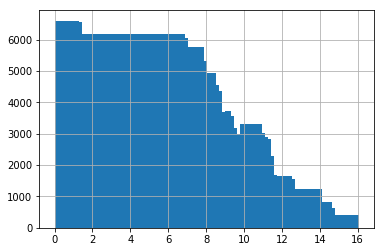

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


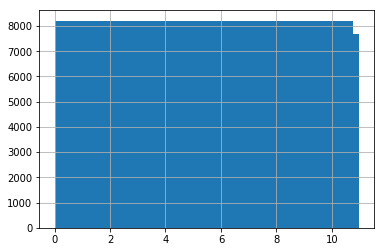

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
w={k:v/np.mean(config.quake_weights.values()) for k,v in config.quake_weights.items()}
wdf=qdf['index'].map(lambda u: w[u])
wdf.head()

index
quake_03_0200_105000    1.081939
quake_06_0120_099000    1.475855
quake_07_0296_013500    0.829115
quake_03_0090_034500    1.081939
quake_08_0137_055500    0.507157
Name: index, dtype: float64

In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx]
    Wtr,Wte=wdf[tridx],wdf[teidx]
    Xtr,ytr,Xte,yte, Wtr, Wte=[u.values for u in [Xtr,ytr,Xte,yte, Wtr,Wte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, sample_weight=Wtr,
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae', eval_sample_weight=[Wtr,None],
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [32]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [33]:
best_mae=1e10

In [34]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    weights=[]
    for qno in quakes:
        weights.append(config.quake_weights[qno])
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    weights=np.array(weights)
    scores=np.array(scores)
    r=np.sum(weights*scores)/np.sum(weights)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [35]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
}

In [36]:
def objective(args):
    print args
    return lgbcv(**args)



In [37]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 97.78387859063392, 'reg_alpha': 0.01206143055242905, 'colsample_bytree': 0.43224869813870226, 'min_sum_hessian_in_leaf': 0.9486525662287386, 'learning_rate': 0.001173159936866572, 'subsample': 0.5341196776648702, 'reg_lambda': 0.8750484637056014, 'min_data_in_leaf': 43.797422737475166, 'max_depth': 5.106588413971263}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.92901	valid_1's l1: 2.04036   
[200]	training's l1: 1.39361	valid_1's l1: 1.54951   
[300]	training's l1: 1.1827	valid_1's l1: 1.39458    
[400]	training's l1: 1.0926	valid_1's l1: 1.3433     
[500]	training's l1: 1.03784	valid_1's l1: 1.30895   
[600]	tra

(18018,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.91179	valid_1's l1: 1.9634    
[200]	training's l1: 1.37811	valid_1's l1: 1.61639   
[300]	training's l1: 1.17874	valid_1's l1: 1.51063   
[400]	training's l1: 1.08873	valid_1's l1: 1.47123   
[500]	training's l1: 1.03142	valid_1's l1: 1.44999   
[600]	training's l1: 0.994373	valid_1's l1: 1.43729  
[700]	training's l1: 0.968046	valid_1's l1: 1.42808  
[800]	training's l1: 0.947023	valid_1's l1: 1.42261  
[900]	training's l1: 0.929372	valid_1's l1: 1.41809  
[1000]	training's l1: 0.914436	valid_1's l1: 1.41272 
[1100]	training's l1: 0.900356	valid_1's l1: 1.40947 
[1200]	training's l1: 0.887942	valid_1's l1: 1.40608 
[1300]	training's l1: 0.87696	valid_1's l1: 1.40254  
[1400]	training's l1: 0.866617	valid_1's l1: 1.40088 
[1500]	training's l1: 0.857151	valid_1's l1: 1.39862 
[1600]	training's l1: 0.846677	valid_1's l1: 1.3987  
Early stopping, bes

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.96989	valid_1's l1: 1.95752   
[200]	training's l1: 1.44511	valid_1's l1: 1.40961   
[300]	training's l1: 1.22242	valid_1's l1: 1.16793   
[400]	training's l1: 1.12964	valid_1's l1: 1.07703   
[500]	training's l1: 1.07039	valid_1's l1: 1.03361   
[600]	training's l1: 1.03017	valid_1's l1: 1.0164    
[700]	training's l1: 1.00152	valid_1's l1: 1.00976   
[800]	training's l1: 0.979569	valid_1's l1: 1.00679  
[900]	training's l1: 0.961386	valid_1's l1: 1.00518  
[1000]	training's l1: 0.946075	valid_1's l1: 1.0051  
[1100]	training's l1: 0.93241	valid_1's l1: 1.00487  
Early stopping, best iteration is:                   
[1095]	training's l1: 0.933073	valid_1's l1: 1.00464
quake                                                
11                                                   
(1.0046401542171641, 1095)                           
valid quake                                          
12                  

[700]	training's l1: 0.947556	valid_1's l1: 1.23372                          
[800]	training's l1: 0.929639	valid_1's l1: 1.22512                          
[900]	training's l1: 0.913748	valid_1's l1: 1.21982                          
[1000]	training's l1: 0.899713	valid_1's l1: 1.21717                         
[1100]	training's l1: 0.885513	valid_1's l1: 1.21566                         
[1200]	training's l1: 0.870363	valid_1's l1: 1.21381                         
[1300]	training's l1: 0.85328	valid_1's l1: 1.21453                          
Early stopping, best iteration is:                                           
[1202]	training's l1: 0.870046	valid_1's l1: 1.21366
quake                                                                        
1                                                                            
(1.2136634537831743, 1202)                                                   
valid quake                                                                  
2          

valid quake                                                                  
6                                                                            
(391376, 450)                                                                
(391376,)                                                                    
(18018, 450)                                                                 
(18018,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.70779	valid_1's l1: 1.81381                           
[200]	training's l1: 1.22945	valid_1's l1: 1.52586                           
[300]	training's l1: 1.09558	valid_1's l1: 1.45581                           
[400]	training's l1: 1.02521	valid_1's l1: 1.42936                           
[500]	training's l1: 0.984583	valid_1's l1: 1.41488                          
[600]	training's l1: 0.955513	valid_1's l1: 1.40456             

valid quake                                                                  
10                                                                           
(380166, 450)                                                                
(380166,)                                                                    
(29228, 450)                                                                 
(29228,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.76431	valid_1's l1: 1.74335                           
[200]	training's l1: 1.26901	valid_1's l1: 1.21994                           
[300]	training's l1: 1.13035	valid_1's l1: 1.0922                            
[400]	training's l1: 1.05771	valid_1's l1: 1.05087                           
[500]	training's l1: 1.01404	valid_1's l1: 1.03248                           
[600]	training's l1: 0.983766	valid_1's l1: 1.02317             

Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.73625	valid_1's l1: 1.95976                           
[200]	training's l1: 1.22558	valid_1's l1: 1.5812                            
[300]	training's l1: 1.08883	valid_1's l1: 1.48898                           
[400]	training's l1: 1.02199	valid_1's l1: 1.44721                           
[500]	training's l1: 0.981241	valid_1's l1: 1.43154                          
[600]	training's l1: 0.952452	valid_1's l1: 1.43065                          
Early stopping, best iteration is:                                           
[551]	training's l1: 0.965729	valid_1's l1: 1.42986
quake                                                                        
14                                                                           
(1.4298613058709413, 551)                                                    
valid quake                                                                  
15          

5                                                                            
(388820, 450)                                                                
(388820,)                                                                    
(20574, 450)                                                                 
(20574,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.956795	valid_1's l1: 1.43467                          
[200]	training's l1: 0.745977	valid_1's l1: 1.3635                           
[300]	training's l1: 0.630727	valid_1's l1: 1.35989                          
Early stopping, best iteration is:                                           
[277]	training's l1: 0.653706	valid_1's l1: 1.35579
quake                                                                        
5                                                                            
(1.355789576

quake                                                                        
11                                                                           
(1.03583501373607, 214)                                                      
valid quake                                                                  
12                                                                           
(386834, 450)                                                                
(386834,)                                                                    
(22560, 450)                                                                 
(22560,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.94853	valid_1's l1: 1.08968                           
[200]	training's l1: 0.735187	valid_1's l1: 1.00368                          
[300]	training's l1: 0.615017	valid_1's l1: 0.984952            

quake                                                                        
2                                                                            
(1.3247272464393303, 706)                                                    
valid quake                                                                  
3                                                                            
(386763, 450)                                                                
(386763,)                                                                    
(22631, 450)                                                                 
(22631,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.29794	valid_1's l1: 1.12688                           
[200]	training's l1: 1.09163	valid_1's l1: 0.939476                          
[300]	training's l1: 1.02676	valid_1's l1: 0.877019             

[200]	training's l1: 1.07428	valid_1's l1: 1.45095                           
[300]	training's l1: 1.00942	valid_1's l1: 1.38817                           
[400]	training's l1: 0.975083	valid_1's l1: 1.36226                          
[500]	training's l1: 0.951333	valid_1's l1: 1.34742                          
[600]	training's l1: 0.93247	valid_1's l1: 1.33931                           
[700]	training's l1: 0.912187	valid_1's l1: 1.341                            
Early stopping, best iteration is:                                           
[647]	training's l1: 0.923897	valid_1's l1: 1.33737
quake                                                                        
8                                                                            
(1.3373735186893674, 647)                                                    
valid quake                                                                  
9                                                                            
(384759, 450

(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.25793	valid_1's l1: 1.59454                           
[200]	training's l1: 1.05194	valid_1's l1: 1.45369                           
[300]	training's l1: 0.985581	valid_1's l1: 1.4352                           
[400]	training's l1: 0.951024	valid_1's l1: 1.43475                          
Early stopping, best iteration is:                                           
[340]	training's l1: 0.969878	valid_1's l1: 1.43263
quake                                                                        
14                                                                           
(1.432626364595699, 340)                                                     
valid quake 

[400]	training's l1: 1.14188	valid_1's l1: 0.962237                          
[500]	training's l1: 1.10135	valid_1's l1: 0.914022                          
[600]	training's l1: 1.07574	valid_1's l1: 0.888369                          
[700]	training's l1: 1.0572	valid_1's l1: 0.873618                           
[800]	training's l1: 1.04411	valid_1's l1: 0.863299                          
[900]	training's l1: 1.03394	valid_1's l1: 0.855901                          
[1000]	training's l1: 1.02498	valid_1's l1: 0.849281                         
[1100]	training's l1: 1.01684	valid_1's l1: 0.843829                         
[1200]	training's l1: 1.00941	valid_1's l1: 0.840115                         
[1300]	training's l1: 1.00224	valid_1's l1: 0.83635                          
[1400]	training's l1: 0.995291	valid_1's l1: 0.834144                        
[1500]	training's l1: 0.988276	valid_1's l1: 0.833606                        
[1600]	training's l1: 0.978674	valid_1's l1: 0.833401           

[400]	training's l1: 1.11606	valid_1's l1: 1.43074                           
[500]	training's l1: 1.0724	valid_1's l1: 1.39457                            
[600]	training's l1: 1.04488	valid_1's l1: 1.37505                           
[700]	training's l1: 1.02505	valid_1's l1: 1.36638                           
[800]	training's l1: 1.0108	valid_1's l1: 1.36145                            
[900]	training's l1: 1.00018	valid_1's l1: 1.35717                           
[1000]	training's l1: 0.990961	valid_1's l1: 1.35501                         
[1100]	training's l1: 0.982887	valid_1's l1: 1.35325                         
[1200]	training's l1: 0.97462	valid_1's l1: 1.35097                          
[1300]	training's l1: 0.967273	valid_1's l1: 1.34878                         
[1400]	training's l1: 0.960656	valid_1's l1: 1.34751                         
[1500]	training's l1: 0.953209	valid_1's l1: 1.346                           
[1600]	training's l1: 0.945448	valid_1's l1: 1.34541            

11                                                                           
(381198, 450)                                                                
(381198,)                                                                    
(28196, 450)                                                                 
(28196,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.88744	valid_1's l1: 1.85996                           
[200]	training's l1: 1.37376	valid_1's l1: 1.30102                           
[300]	training's l1: 1.21504	valid_1's l1: 1.1109                            
[400]	training's l1: 1.1439	valid_1's l1: 1.03755                            
[500]	training's l1: 1.09939	valid_1's l1: 1.01027                           
[600]	training's l1: 1.07234	valid_1's l1: 1.00439                           
[700]	training's l1: 1.05309	valid_1's l1: 1.00399              

[400]	training's l1: 1.12592	valid_1's l1: 1.17297                           
[500]	training's l1: 1.08394	valid_1's l1: 1.16943                           
[600]	training's l1: 1.05846	valid_1's l1: 1.16975                           
[700]	training's l1: 1.04108	valid_1's l1: 1.16947                           
Early stopping, best iteration is:                                           
[637]	training's l1: 1.05115	valid_1's l1: 1.16733
quake                                                                        
15                                                                           
(1.1673338410187537, 637)                                                    
mean score                                                                   
1.1333966890628784                                                           
{'num_leaves': 46.83478248278497, 'reg_alpha': 2.60184682667021, 'colsample_bytree': 0.8571067050608108, 'min_sum_hessian_in_leaf': 0.01453556128593345, 'learning_rate':

valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)                                                                    
(41240, 450)                                                                 
(41240,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.954914	valid_1's l1: 1.40286                          
[200]	training's l1: 0.794562	valid_1's l1: 1.36724                          
[300]	training's l1: 0.714893	valid_1's l1: 1.36719                          
Early stopping, best iteration is:                                           
[284]	training's l1: 0.725333	valid_1's l1: 1.36627
quake                                                                        
7           

[300]	training's l1: 0.735915	valid_1's l1: 1.05775                          
[400]	training's l1: 0.664832	valid_1's l1: 1.06117                          
Early stopping, best iteration is:                                           
[334]	training's l1: 0.708678	valid_1's l1: 1.05729
quake                                                                        
13                                                                           
(1.0572911001074643, 334)                                                    
valid quake                                                                  
14                                                                           
(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
Training unt

[1700]	training's l1: 0.591594	valid_1's l1: 1.33748                           
[1800]	training's l1: 0.57624	valid_1's l1: 1.33699                            
[1900]	training's l1: 0.561472	valid_1's l1: 1.33692                           
[2000]	training's l1: 0.546482	valid_1's l1: 1.33614                           
Early stopping, best iteration is:                                             
[1954]	training's l1: 0.553139	valid_1's l1: 1.33571
quake                                                                          
2                                                                              
(1.335711744637911, 1954)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                          

[700]	training's l1: 0.823018	valid_1's l1: 1.42831                            
[800]	training's l1: 0.783608	valid_1's l1: 1.42648                            
[900]	training's l1: 0.749458	valid_1's l1: 1.42284                            
[1000]	training's l1: 0.718929	valid_1's l1: 1.4206                            
[1100]	training's l1: 0.692038	valid_1's l1: 1.41749                           
[1200]	training's l1: 0.668348	valid_1's l1: 1.41396                           
[1300]	training's l1: 0.646752	valid_1's l1: 1.41162                           
[1400]	training's l1: 0.626818	valid_1's l1: 1.4098                            
[1500]	training's l1: 0.609847	valid_1's l1: 1.40758                           
[1600]	training's l1: 0.59391	valid_1's l1: 1.40498                            
[1700]	training's l1: 0.579037	valid_1's l1: 1.40243                           
[1800]	training's l1: 0.562634	valid_1's l1: 1.40131                           
[1900]	training's l1: 0.546441	valid_1's

[1000]	training's l1: 0.753879	valid_1's l1: 0.921418                          
[1100]	training's l1: 0.725371	valid_1's l1: 0.919707                          
[1200]	training's l1: 0.699275	valid_1's l1: 0.917552                          
[1300]	training's l1: 0.67473	valid_1's l1: 0.915087                           
[1400]	training's l1: 0.653345	valid_1's l1: 0.913134                          
[1500]	training's l1: 0.634188	valid_1's l1: 0.910458                          
[1600]	training's l1: 0.615919	valid_1's l1: 0.908352                          
[1700]	training's l1: 0.598378	valid_1's l1: 0.907725                          
[1800]	training's l1: 0.582728	valid_1's l1: 0.906398                          
[1900]	training's l1: 0.565802	valid_1's l1: 0.906075                          
Early stopping, best iteration is:                                             
[1873]	training's l1: 0.570574	valid_1's l1: 0.905791
quake                                                             

[2700]	training's l1: 0.457292	valid_1's l1: 0.947963                          
Early stopping, best iteration is:                                             
[2645]	training's l1: 0.463358	valid_1's l1: 0.947713
quake                                                                          
12                                                                             
(0.9477127738279351, 2645)                                                     
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.    

valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.174	valid_1's l1: 1.39705                                
[200]	training's l1: 0.980205	valid_1's l1: 1.28                                
[300]	training's l1: 0.907383	valid_1's l1: 1.24364                             
[400]	training's l1: 0.855156	valid_1's l1: 1.22969                             
[500]	training's l1: 0.812625	valid_1's l1: 1.223                               
[600]	training's l1: 0.77252

quake                                                                           
6                                                                               
(1.3892860267859775, 536)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.18773	valid_1's l1: 1.57653                              
[200]	training's l1: 0.981364	valid_1's l1: 1.39507                             
[300]	training's l1: 0.90027

[400]	training's l1: 0.872591	valid_1's l1: 0.961179                            
[500]	training's l1: 0.82787	valid_1's l1: 0.953187                             
[600]	training's l1: 0.785824	valid_1's l1: 0.951117                            
Early stopping, best iteration is:                                              
[543]	training's l1: 0.810324	valid_1's l1: 0.949949
quake                                                                           
12                                                                              
(0.9499490743357689, 543)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                            

(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01925	valid_1's l1: 0.956466                            
[200]	training's l1: 0.868584	valid_1's l1: 0.87119                            
[300]	training's l1: 0.795359	valid_1's l1: 0.857398                           
[400]	training's l1: 0.728137	valid_1's l1: 0.851363                           
[500]	training's l1: 0.669311	valid_1's l1: 0.851998                           
Early stopping, best iteration is:                                             
[430]	training's l1: 0.710101	valid_1's l1: 0.84889
quake                                                                          
3                                                                   

9                                                                              
(0.9263314791902223, 381)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01244	valid_1's l1: 1.06571                             
[200]	training's l1: 0.860873	valid_1's l1: 1.0238                             
[300]	training's l1: 0.788972	valid_1's l1: 1.01595                            
[400]	training's l1: 0.717716	valid_1's 

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.0993	valid_1's l1: 1.36938                              
[200]	training's l1: 0.919887	valid_1's l1: 1.26807                            
[300]	training's l1: 0.831527	valid_1's l1: 1.23938                            
[400]	training's l1: 0.767448	valid_1's l1: 1.22971                            
[500]	training's l1: 0.715418	valid_1's l1: 1.22279                            
[600]	training's l1: 0.672583	valid_1's l1: 1.22052                            
[700]	training's l1: 0.638548	valid_1's l1: 1.22105                            
Early stopping, best iteration is:                                             
[677]	training's l1: 0.646385	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.10954	valid_1's l1: 1.5001                              
[200]	training's l1: 0.91506	valid_1's l1: 1.37622                             
[300]	training's l1: 0.824854	valid_1's l1: 1.3675                             
[400]	training's l1: 0.761052	valid_1's l1: 1.36674                            
[500]	training's l1: 0.710978	valid_1's l1: 1.36795                            
Early stopping, best iteration is:                                             
[435]	training's l1: 0.742821	valid_1's l1: 1.36564
quake                                                                          
7                                                                              
(1.365642716834942, 435)                                                       
valid quake                                                                    
8                                                                   

[400]	training's l1: 0.784539	valid_1's l1: 1.05585                            
[500]	training's l1: 0.735506	valid_1's l1: 1.05273                            
Early stopping, best iteration is:                                             
[498]	training's l1: 0.736409	valid_1's l1: 1.0521
quake                                                                          
13                                                                             
(1.0521043636849094, 498)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                             

[600]	training's l1: 0.954917	valid_1's l1: 0.854793                            
[700]	training's l1: 0.932867	valid_1's l1: 0.846418                            
[800]	training's l1: 0.914521	valid_1's l1: 0.84057                             
[900]	training's l1: 0.897954	valid_1's l1: 0.836477                            
[1000]	training's l1: 0.879683	valid_1's l1: 0.837346                           
Early stopping, best iteration is:                                              
[915]	training's l1: 0.895612	valid_1's l1: 0.836052
quake                                                                           
3                                                                               
(0.836051522699126, 915)                                                        
valid quake                                                                     
4                                                                               
(376914, 450)                                           

[100]	training's l1: 1.58024	valid_1's l1: 1.68308                              
[200]	training's l1: 1.16623	valid_1's l1: 1.51357                              
[300]	training's l1: 1.05591	valid_1's l1: 1.44945                              
[400]	training's l1: 0.999414	valid_1's l1: 1.40581                             
[500]	training's l1: 0.965229	valid_1's l1: 1.3812                              
[600]	training's l1: 0.941451	valid_1's l1: 1.36562                             
[700]	training's l1: 0.920162	valid_1's l1: 1.35646                             
[800]	training's l1: 0.899931	valid_1's l1: 1.34955                             
[900]	training's l1: 0.88294	valid_1's l1: 1.34273                              
[1000]	training's l1: 0.866019	valid_1's l1: 1.3407                             
Early stopping, best iteration is:                                              
[977]	training's l1: 0.870133	valid_1's l1: 1.33999
quake                                                    

quake                                                                           
12                                                                              
(0.9496444466249664, 995)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.57961	valid_1's l1: 1.56028                              
[200]	training's l1: 1.17448	valid_1's l1: 1.27529                              
[300]	training's l1: 1.06478

[2200]	training's l1: 0.646279	valid_1's l1: 1.21122                            
Early stopping, best iteration is:                                              
[2185]	training's l1: 0.64779	valid_1's l1: 1.21074
quake                                                                           
1                                                                               
(1.2107352771779558, 2185)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 ro

[200]	training's l1: 1.18857	valid_1's l1: 1.52935                              
[300]	training's l1: 1.04576	valid_1's l1: 1.46128                              
[400]	training's l1: 0.97138	valid_1's l1: 1.4344                               
[500]	training's l1: 0.926921	valid_1's l1: 1.42101                             
[600]	training's l1: 0.894017	valid_1's l1: 1.4142                              
[700]	training's l1: 0.867359	valid_1's l1: 1.4107                              
[800]	training's l1: 0.845184	valid_1's l1: 1.40711                             
[900]	training's l1: 0.827711	valid_1's l1: 1.40359                             
[1000]	training's l1: 0.810394	valid_1's l1: 1.40197                            
[1100]	training's l1: 0.791673	valid_1's l1: 1.40244                            
Early stopping, best iteration is:                                              
[1045]	training's l1: 0.801652	valid_1's l1: 1.40167
quake                                                   

[800]	training's l1: 0.874667	valid_1's l1: 1.01774                             
[900]	training's l1: 0.856276	valid_1's l1: 1.01559                             
[1000]	training's l1: 0.83995	valid_1's l1: 1.01549                             
Early stopping, best iteration is:                                              
[944]	training's l1: 0.84919	valid_1's l1: 1.01435
quake                                                                           
10                                                                              
(1.0143505026968296, 944)                                                       
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                              

valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.68399	valid_1's l1: 1.60358                              
[200]	training's l1: 1.20662	valid_1's l1: 1.27389                              
[300]	training's l1: 1.06957	valid_1's l1: 1.20886                              
[400]	training's l1: 0.995121	valid_1's l1: 1.1745                              
[500]	training's l1: 0.950512	valid_1's l1: 1.1678                              
[600]	training's l1: 0.91612

4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.70194	valid_1's l1: 1.75623                              
[200]	training's l1: 1.25975	valid_1's l1: 1.25983                              
[300]	training's l1: 1.14339	valid_1's l1: 1.13325                              
[400]	training's l1: 1.08525	valid_1's l1: 1.09551                              
[500]	training's l1: 1.05072	valid_1's l1: 1.08753                              
[600]	training's l1: 1.02679	valid_1's l1: 1.08432                              
[700]	training's l1: 1.00949

[200]	training's l1: 1.24809	valid_1's l1: 1.52963                              
[300]	training's l1: 1.13452	valid_1's l1: 1.47476                              
[400]	training's l1: 1.07599	valid_1's l1: 1.42306                              
[500]	training's l1: 1.04214	valid_1's l1: 1.39638                              
[600]	training's l1: 1.02008	valid_1's l1: 1.37837                              
[700]	training's l1: 1.00422	valid_1's l1: 1.3679                               
[800]	training's l1: 0.99004	valid_1's l1: 1.35678                              
[900]	training's l1: 0.977292	valid_1's l1: 1.3486                              
[1000]	training's l1: 0.965983	valid_1's l1: 1.34455                            
[1100]	training's l1: 0.955381	valid_1's l1: 1.3412                             
[1200]	training's l1: 0.945643	valid_1's l1: 1.33847                            
[1300]	training's l1: 0.932984	valid_1's l1: 1.33786                            
Early stopping, best iterati

[1000]	training's l1: 0.976152	valid_1's l1: 0.957978                           
[1100]	training's l1: 0.963239	valid_1's l1: 0.955282                           
[1200]	training's l1: 0.949457	valid_1's l1: 0.953131                           
[1300]	training's l1: 0.936003	valid_1's l1: 0.951493                           
[1400]	training's l1: 0.924318	valid_1's l1: 0.949287                           
[1500]	training's l1: 0.912903	valid_1's l1: 0.949275                           
[1600]	training's l1: 0.90221	valid_1's l1: 0.948432                            
[1700]	training's l1: 0.891706	valid_1's l1: 0.94781                            
Early stopping, best iteration is:                                              
[1641]	training's l1: 0.897926	valid_1's l1: 0.946917
quake                                                                           
12                                                                              
(0.9469174762877525, 1641)                             

[1500]	training's l1: 0.533319	valid_1's l1: 1.2109                             
Early stopping, best iteration is:                                              
[1441]	training's l1: 0.543844	valid_1's l1: 1.21029
quake                                                                           
1                                                                               
(1.2102941255824766, 1441)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 r

(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.60237	valid_1's l1: 1.78179                              
[200]	training's l1: 1.1033	valid_1's l1: 1.53005                               
[300]	training's l1: 0.947203	valid_1's l1: 1.46962                             
[400]	training's l1: 0.856891	valid_1's l1: 1.44834                             
[500]	training's l1: 0.798157	valid_1's l1: 1.43693                             
[600]	training's l1: 0.752672	valid_1's l1: 1.42924                             
[700]	training's l1: 0.716926	valid_1's l1: 1.42453                             
[800]	training's l1: 0.686367	valid_1's l1: 1.4201                              
[900]	training's l1: 0.660317	valid_1's l1: 1.4153                              
[1000]	training's l1: 0.635705	valid_1's l1: 1.41208                            
[1100]	training's l1: 0.6099

[600]	training's l1: 0.786096	valid_1's l1: 1.02468                             
[700]	training's l1: 0.746677	valid_1's l1: 1.01919                             
[800]	training's l1: 0.714358	valid_1's l1: 1.01558                             
[900]	training's l1: 0.684955	valid_1's l1: 1.01343                             
[1000]	training's l1: 0.656825	valid_1's l1: 1.01028                            
[1100]	training's l1: 0.63178	valid_1's l1: 1.00936                             
Early stopping, best iteration is:                                              
[1070]	training's l1: 0.639262	valid_1's l1: 1.0092
quake                                                                           
10                                                                              
(1.009199951810514, 1070)                                                       
valid quake                                                                     
11                                                       

(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.61343	valid_1's l1: 1.51773                              
[200]	training's l1: 1.12538	valid_1's l1: 1.22871                              
[300]	training's l1: 0.970071	valid_1's l1: 1.16458                             
[400]	training's l1: 0.881049	valid_1's l1: 1.14425                             
[500]	training's l1: 0.823671	valid_1's l1: 1.1271                              
[600]	training's l1: 0.777952	valid_1's l1: 1.11732                             
[700]	training's l1: 0.741143	valid_1's l1: 1.11392                             
[800]	training's l1: 0.70963

(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.29226	valid_1's l1: 1.52422                              
[200]	training's l1: 1.06423	valid_1's l1: 1.39134                              
[300]	training's l1: 0.985923	valid_1's l1: 1.33551                             
[400]	training's l1: 0.945093	valid_1's l1: 1.31466                             
[500]	training's l1: 0.913571	valid_1's l1: 1.30594                             
[600]	training's l1: 0.886284	valid_1's l1: 1.30587                             
Early stopping, best iteration is:                                              
[527]	training's l1: 0.90578

[400]	training's l1: 0.945409	valid_1's l1: 1.01096                             
[500]	training's l1: 0.912724	valid_1's l1: 1.0064                              
[600]	training's l1: 0.882814	valid_1's l1: 1.004                               
[700]	training's l1: 0.854917	valid_1's l1: 1.00411                             
Early stopping, best iteration is:                                              
[635]	training's l1: 0.872683	valid_1's l1: 1.0029
quake                                                                           
10                                                                              
(1.002900733916726, 635)                                                        
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                 

{'num_leaves': 71.33234312028986, 'reg_alpha': 0.047893242794665544, 'colsample_bytree': 0.7331783210946143, 'min_sum_hessian_in_leaf': 0.0447471774524422, 'learning_rate': 0.0019431761926580846, 'subsample': 0.5946132738233718, 'reg_lambda': 0.21184284000556544, 'min_data_in_leaf': 138.69857236208767, 'max_depth': 4.46797281645955}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.56129	valid_1's l1: 1.69379                              
[200]	training's 

[300]	training's l1: 1.10449	valid_1's l1: 1.37252                              
[400]	training's l1: 1.05517	valid_1's l1: 1.32997                              
[500]	training's l1: 1.02641	valid_1's l1: 1.31064                              
[600]	training's l1: 1.00769	valid_1's l1: 1.30492                              
[700]	training's l1: 0.990543	valid_1's l1: 1.29734                             
[800]	training's l1: 0.976264	valid_1's l1: 1.29116                             
[900]	training's l1: 0.964132	valid_1's l1: 1.28698                             
[1000]	training's l1: 0.951154	valid_1's l1: 1.28786                            
Early stopping, best iteration is:                                              
[920]	training's l1: 0.961717	valid_1's l1: 1.28633
quake                                                                           
5                                                                               
(1.2863272580870169, 920)                                

Early stopping, best iteration is:                                              
[1240]	training's l1: 0.92578	valid_1's l1: 0.910092
quake                                                                           
9                                                                               
(0.9100920283717172, 1240)                                                      
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.60209	valid_1's l1: 1.55228      

[200]	training's l1: 1.17412	valid_1's l1: 1.51536                              
[300]	training's l1: 1.07806	valid_1's l1: 1.45115                              
[400]	training's l1: 1.03044	valid_1's l1: 1.42855                              
[500]	training's l1: 1.00049	valid_1's l1: 1.42529                              
[600]	training's l1: 0.979283	valid_1's l1: 1.42171                             
[700]	training's l1: 0.963209	valid_1's l1: 1.42237                             
Early stopping, best iteration is:                                              
[637]	training's l1: 0.972998	valid_1's l1: 1.42128
quake                                                                           
14                                                                              
(1.4212816551218075, 637)                                                       
valid quake                                                                     
15                                                       

[300]	training's l1: 0.871249	valid_1's l1: 1.10428                            
Early stopping, best iteration is:                                             
[266]	training's l1: 0.894914	valid_1's l1: 1.10328
quake                                                                          
4                                                                              
(1.1032750459407905, 266)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.      

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.17942	valid_1's l1: 1.17287                             
[200]	training's l1: 0.965545	valid_1's l1: 1.03979                            
[300]	training's l1: 0.880565	valid_1's l1: 1.01824                            
[400]	training's l1: 0.827055	valid_1's l1: 1.01004                            
[500]	training's l1: 0.778302	valid_1's l1: 1.00981                            
Early stopping, best iteration is:                                             
[437]	training's l1: 0.809139	valid_1's l1: 1.00767
quake                                                                          
10                                                                             
(1.0076695323528337, 437)                                                      
valid quake                                                                    
11                                                                  

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05605	valid_1's l1: 1.34475                             
[200]	training's l1: 0.907138	valid_1's l1: 1.25481                            
[300]	training's l1: 0.839691	valid_1's l1: 1.23222                            
[400]	training's l1: 0.788106	valid_1's l1: 1.22401                            
[500]	training's l1: 0.736448	valid_1's l1: 1.22047                            
[600]	training's l1: 0.694248	valid_1's l1: 1.21677                            
Early stopping, best iteration is:                                             
[576]	training's l1: 0.703377	valid_1's l1: 1.21564
quake                                                               

[100]	training's l1: 1.065	valid_1's l1: 1.47961                               
[200]	training's l1: 0.899554	valid_1's l1: 1.37658                            
[300]	training's l1: 0.828971	valid_1's l1: 1.36604                            
[400]	training's l1: 0.777712	valid_1's l1: 1.36219                            
Early stopping, best iteration is:                                             
[396]	training's l1: 0.779361	valid_1's l1: 1.36198
quake                                                                          
7                                                                              
(1.3619818766095255, 396)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                           

[400]	training's l1: 0.803057	valid_1's l1: 1.06478                            
[500]	training's l1: 0.7511	valid_1's l1: 1.06667                              
Early stopping, best iteration is:                                             
[438]	training's l1: 0.785975	valid_1's l1: 1.06133
quake                                                                          
13                                                                             
(1.061334351277399, 438)                                                       
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                            

(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.897905	valid_1's l1: 1.35429                            
[200]	training's l1: 0.76187	valid_1's l1: 1.34613                             
Early stopping, best iteration is:                                             
[165]	training's l1: 0.801871	valid_1's l1: 1.3377
quake                                                                          
5                                                                              
(1.3377015021336154, 165)                                                      
valid quake                                                          

(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.897568	valid_1's l1: 1.00179                            
[200]	training's l1: 0.757782	valid_1's l1: 0.97353                            
Early stopping, best iteration is:                                             
[187]	training's l1: 0.773515	valid_1's l1: 0.971162
quake                                                                          
12                                                                             
(0.9711615386293924, 187)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                          

[300]	training's l1: 0.860381	valid_1's l1: 0.850736                          
Early stopping, best iteration is:                                            
[268]	training's l1: 0.879245	valid_1's l1: 0.84789
quake                                                                         
3                                                                             
(0.8478895720898637, 268)                                                     
valid quake                                                                   
4                                                                             
(376914, 450)                                                                 
(376914,)                                                                     
(32480, 450)                                                                  
(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                


(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.03277	valid_1's l1: 1.06022                            
[200]	training's l1: 0.91322	valid_1's l1: 1.0327                             
[300]	training's l1: 0.855701	valid_1's l1: 1.02674                           
Early stopping, best iteration is:                                            
[288]	training's l1: 0.862148	valid_1's l1: 1.02512
quake                                                                         
10                                                                            
(1.025121506922483, 288)                                                      
valid quake                                                                   
11                                                                            


[200]	training's l1: 1.19955	valid_1's l1: 1.36095                            
[300]	training's l1: 1.1158	valid_1's l1: 1.29344                             
[400]	training's l1: 1.07798	valid_1's l1: 1.26088                            
[500]	training's l1: 1.05772	valid_1's l1: 1.24178                            
[600]	training's l1: 1.04403	valid_1's l1: 1.22959                            
[700]	training's l1: 1.03104	valid_1's l1: 1.22412                            
[800]	training's l1: 1.02041	valid_1's l1: 1.21941                            
[900]	training's l1: 1.01035	valid_1's l1: 1.21755                            
Early stopping, best iteration is:                                            
[881]	training's l1: 1.01235	valid_1's l1: 1.21674
quake                                                                         
1                                                                             
(1.2167414315105698, 881)                                                     
v

(391376,)                                                                     
(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.53042	valid_1's l1: 1.69451                            
[200]	training's l1: 1.19693	valid_1's l1: 1.47994                            
[300]	training's l1: 1.11042	valid_1's l1: 1.43234                            
[400]	training's l1: 1.07055	valid_1's l1: 1.41171                            
[500]	training's l1: 1.05011	valid_1's l1: 1.40085                            
[600]	training's l1: 1.03568	valid_1's l1: 1.39272                            
[700]	training's l1: 1.02425	valid_1's l1: 1.38719                            
[800]	training's l1: 1.01438	valid_1's l1: 1.38525                            
[900]	training's l1: 1.00351	valid_1's l1: 1.38667  

[1200]	training's l1: 1.00147	valid_1's l1: 0.99107                           
[1300]	training's l1: 0.993411	valid_1's l1: 0.989653                         
[1400]	training's l1: 0.985553	valid_1's l1: 0.989016                         
Early stopping, best iteration is:                                            
[1388]	training's l1: 0.986521	valid_1's l1: 0.988661
quake                                                                         
10                                                                            
(0.9886606645929824, 1388)                                                    
valid quake                                                                   
11                                                                            
(381198, 450)                                                                 
(381198,)                                                                     
(28196, 450)                                                                 

[500]	training's l1: 1.07018	valid_1's l1: 1.12641                            
Early stopping, best iteration is:                                            
[484]	training's l1: 1.07288	valid_1's l1: 1.12345
quake                                                                         
15                                                                            
(1.1234483299455003, 484)                                                     
mean score                                                                    
1.1291150552914877                                                            
{'num_leaves': 57.94123002518462, 'reg_alpha': 0.44829920629967324, 'colsample_bytree': 0.9898213582731626, 'min_sum_hessian_in_leaf': 0.10747762172274307, 'learning_rate': 0.0022440448412339325, 'subsample': 0.4318896948331771, 'reg_lambda': 0.09218151148805274, 'min_data_in_leaf': 253.8623154044732, 'max_depth': 3.174929710954524}
valid quake                                                  

[300]	training's l1: 1.11907	valid_1's l1: 1.3335                             
[400]	training's l1: 1.08293	valid_1's l1: 1.29706                            
[500]	training's l1: 1.06345	valid_1's l1: 1.28248                            
[600]	training's l1: 1.04957	valid_1's l1: 1.27679                            
[700]	training's l1: 1.03661	valid_1's l1: 1.27009                            
[800]	training's l1: 1.02606	valid_1's l1: 1.26712                            
[900]	training's l1: 1.01565	valid_1's l1: 1.26236                            
[1000]	training's l1: 1.0059	valid_1's l1: 1.25995                            
[1100]	training's l1: 0.996971	valid_1's l1: 1.25902                          
[1200]	training's l1: 0.988144	valid_1's l1: 1.25742                          
[1300]	training's l1: 0.978852	valid_1's l1: 1.2573                           
Early stopping, best iteration is:                                            
[1237]	training's l1: 0.984591	valid_1's l1: 1.25617

(0.9202494844681595, 1277)                                                    
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     
(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.53747	valid_1's l1: 1.46293                            
[200]	training's l1: 1.21295	valid_1's l1: 1.10445                            
[300]	training's l1: 1.12874	valid_1's l1: 1.04818                            
[400]	training's l1: 1.09081	valid_1's l1: 1.02714                            
[500]	training's l1: 1.07011	valid_1's l1: 1.01486  

[600]	training's l1: 1.02187	valid_1's l1: 1.42088                            
Early stopping, best iteration is:                                            
[540]	training's l1: 1.03028	valid_1's l1: 1.41873
quake                                                                         
14                                                                            
(1.4187317816512204, 540)                                                     
valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[

[100]	training's l1: 1.52932	valid_1's l1: 1.53658                            
[200]	training's l1: 1.20796	valid_1's l1: 1.16716                            
[300]	training's l1: 1.12579	valid_1's l1: 1.1037                             
[400]	training's l1: 1.08856	valid_1's l1: 1.09334                            
[500]	training's l1: 1.06845	valid_1's l1: 1.08721                            
[600]	training's l1: 1.05313	valid_1's l1: 1.08527                            
[700]	training's l1: 1.04034	valid_1's l1: 1.08367                            
[800]	training's l1: 1.02994	valid_1's l1: 1.08206                            
[900]	training's l1: 1.01955	valid_1's l1: 1.08141                            
Early stopping, best iteration is:                                            
[842]	training's l1: 1.02575	valid_1's l1: 1.08022
quake                                                                         
4                                                                             
(

(384759, 450)                                                                 
(384759,)                                                                     
(24635, 450)                                                                  
(24635,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.48884	valid_1's l1: 1.33072                            
[200]	training's l1: 1.20843	valid_1's l1: 1.05552                            
[300]	training's l1: 1.13345	valid_1's l1: 0.968899                           
[400]	training's l1: 1.09915	valid_1's l1: 0.938063                           
[500]	training's l1: 1.07969	valid_1's l1: 0.930694                           
[600]	training's l1: 1.06534	valid_1's l1: 0.927633                           
[700]	training's l1: 1.05396	valid_1's l1: 0.925809                           
[800]	training's l1: 1.04311	valid_1's l1: 0.923021 

[900]	training's l1: 1.02309	valid_1's l1: 1.06664                            
[1000]	training's l1: 1.01291	valid_1's l1: 1.06647                           
[1100]	training's l1: 1.004	valid_1's l1: 1.06569                             
Early stopping, best iteration is:                                            
[1035]	training's l1: 1.00983	valid_1's l1: 1.06473
quake                                                                         
13                                                                            
(1.0647252939698688, 1035)                                                    
valid quake                                                                   
14                                                                            
(371633, 450)                                                                 
(371633,)                                                                     
(37761, 450)                                                                  


[400]	training's l1: 1.10153	valid_1's l1: 0.903994                            
[500]	training's l1: 1.08359	valid_1's l1: 0.888301                            
[600]	training's l1: 1.07082	valid_1's l1: 0.877595                            
[700]	training's l1: 1.06105	valid_1's l1: 0.871474                            
[800]	training's l1: 1.05221	valid_1's l1: 0.866837                            
[900]	training's l1: 1.04292	valid_1's l1: 0.864356                            
[1000]	training's l1: 1.03316	valid_1's l1: 0.862539                           
[1100]	training's l1: 1.02298	valid_1's l1: 0.863399                           
Early stopping, best iteration is:                                             
[1036]	training's l1: 1.02951	valid_1's l1: 0.86163
quake                                                                          
3                                                                              
(0.8616295097632442, 1036)                                          

(1.35430224815476, 1437)                                                       
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.47029	valid_1's l1: 1.62252                             
[200]	training's l1: 1.18049	valid_1's l1: 1.51185                             
[300]	training's l1: 1.11117	valid_1's l1: 1.43995                             
[400]	training's l1: 1.081	valid_1's l1: 1.40353                               
[500]	training's l1: 1.06347	valid_1's l

[300]	training's l1: 1.12309	valid_1's l1: 0.999433                            
[400]	training's l1: 1.09461	valid_1's l1: 0.97379                             
[500]	training's l1: 1.07906	valid_1's l1: 0.958674                            
[600]	training's l1: 1.06705	valid_1's l1: 0.947982                            
[700]	training's l1: 1.05644	valid_1's l1: 0.944558                            
[800]	training's l1: 1.04722	valid_1's l1: 0.939327                            
[900]	training's l1: 1.03639	valid_1's l1: 0.93814                             
Early stopping, best iteration is:                                             
[899]	training's l1: 1.03645	valid_1's l1: 0.938106
quake                                                                          
12                                                                             
(0.9381059273028968, 899)                                                      
valid quake                                                         

(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.45963	valid_1's l1: 1.69349                             
[200]	training's l1: 1.17316	valid_1's l1: 1.4024                              
[300]	training's l1: 1.10013	valid_1's l1: 1.35228                             
[400]	training's l1: 1.0702	valid_1's l1: 1.32861                              
[500]	training's l1: 1.0544	valid_1's l1: 1.31717                              
[600]	training's l1: 1.04185	valid_1's l1: 1.31163                             
[700]	training's l1: 1.03078	valid_1's l1: 1.30902                             
[800]	training's l1: 1.02079	valid_1's l1: 1.30939                             
Early stopping, best iteration is:                                             
[785]	training's l1: 1.02252	valid_1's l1: 1.30837
quake                                                                

[100]	training's l1: 1.44278	valid_1's l1: 1.78134                             
[200]	training's l1: 1.16878	valid_1's l1: 1.47056                             
[300]	training's l1: 1.09502	valid_1's l1: 1.39915                             
[400]	training's l1: 1.06178	valid_1's l1: 1.37622                             
[500]	training's l1: 1.04475	valid_1's l1: 1.36523                             
[600]	training's l1: 1.03276	valid_1's l1: 1.3623                              
[700]	training's l1: 1.02292	valid_1's l1: 1.35765                             
[800]	training's l1: 1.0127	valid_1's l1: 1.35239                              
[900]	training's l1: 1.00278	valid_1's l1: 1.34944                             
[1000]	training's l1: 0.993821	valid_1's l1: 1.34857                           
[1100]	training's l1: 0.985005	valid_1's l1: 1.34669                           
[1200]	training's l1: 0.97724	valid_1's l1: 1.34593                            
[1300]	training's l1: 0.969712	valid_1's

Early stopping, best iteration is:                                             
[767]	training's l1: 1.04197	valid_1's l1: 0.99215
quake                                                                          
11                                                                             
(0.9921496096397888, 767)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.41208	valid_1's l1: 1.23707                   

[500]	training's l1: 1.11516	valid_1's l1: 1.31758                             
[600]	training's l1: 1.07875	valid_1's l1: 1.29013                             
[700]	training's l1: 1.05428	valid_1's l1: 1.27077                             
[800]	training's l1: 1.03728	valid_1's l1: 1.25516                             
[900]	training's l1: 1.02341	valid_1's l1: 1.24444                             
[1000]	training's l1: 1.01248	valid_1's l1: 1.23672                            
[1100]	training's l1: 1.0027	valid_1's l1: 1.22966                             
[1200]	training's l1: 0.993693	valid_1's l1: 1.22451                           
[1300]	training's l1: 0.984967	valid_1's l1: 1.22037                           
[1400]	training's l1: 0.977272	valid_1's l1: 1.21719                           
[1500]	training's l1: 0.970461	valid_1's l1: 1.21514                           
[1600]	training's l1: 0.963247	valid_1's l1: 1.213                             
[1700]	training's l1: 0.956477	valid_1's

4                                                                              
(1.0779554779590867, 1395)                                                     
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.05507	valid_1's l1: 2.07747                             
[200]	training's l1: 1.554	valid_1's l1: 1.64851                               
[300]	training's l1: 1.28186	valid_1's l1: 1.48761                             
[400]	training's l1: 1.18789	valid_1's l

(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.05574	valid_1's l1: 2.07601                             
[200]	training's l1: 1.5555	valid_1's l1: 1.65959                              
[300]	training's l1: 1.2811	valid_1's l1: 1.53221                              
[400]	training's l1: 1.18627	valid_1's l1: 1.50891                             
[500]	training's l1: 1.13063	valid_1's l1: 1.47374                             
[600]	training's l1: 1.09229	valid_1's l1: 1.43691                             
[700]	training's l1: 1.06634	valid_1's l1: 1.41341                             
[800]	training's l1: 1.04704	valid_1's l1: 1.39592                             
[900]	training's l1: 1.0322	valid_1's l1: 1.38036                              
[1000]	training's l1: 1.02113	valid_1's l1: 1.37113                            
[1100]	training's l1: 1.01199	valid_1's 

[100]	training's l1: 2.06337	valid_1's l1: 2.04475                             
[200]	training's l1: 1.56765	valid_1's l1: 1.51612                             
[300]	training's l1: 1.30217	valid_1's l1: 1.21721                             
[400]	training's l1: 1.20674	valid_1's l1: 1.10421                             
[500]	training's l1: 1.14975	valid_1's l1: 1.0461                              
[600]	training's l1: 1.10955	valid_1's l1: 1.01818                             
[700]	training's l1: 1.08142	valid_1's l1: 1.00768                             
[800]	training's l1: 1.06106	valid_1's l1: 1.00326                             
[900]	training's l1: 1.04522	valid_1's l1: 1.00242                             
[1000]	training's l1: 1.03198	valid_1's l1: 1.00159                            
[1100]	training's l1: 1.02217	valid_1's l1: 1.00045                            
Early stopping, best iteration is:                                             
[1087]	training's l1: 1.02335	valid_1's 

quake                                                                          
14                                                                             
(1.4228263442702962, 1239)                                                     
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.0222	valid_1's l1: 1.93824                              
[200]	training's l1: 1.5163	valid_1's l1: 1.38581                              
[300]	training's l1: 1.27633	valid_1's l

[200]	training's l1: 1.56178	valid_1's l1: 1.32837                              
[300]	training's l1: 1.30536	valid_1's l1: 1.10253                              
[400]	training's l1: 1.22249	valid_1's l1: 1.03183                              
[500]	training's l1: 1.17317	valid_1's l1: 0.976055                             
[600]	training's l1: 1.14063	valid_1's l1: 0.934694                             
[700]	training's l1: 1.11862	valid_1's l1: 0.910896                             
[800]	training's l1: 1.10284	valid_1's l1: 0.895396                             
[900]	training's l1: 1.09075	valid_1's l1: 0.886146                             
[1000]	training's l1: 1.08178	valid_1's l1: 0.878404                            
[1100]	training's l1: 1.07429	valid_1's l1: 0.871167                            
[1200]	training's l1: 1.06803	valid_1's l1: 0.864895                            
[1300]	training's l1: 1.06227	valid_1's l1: 0.859552                            
[1400]	training's l1: 1.0568

[600]	training's l1: 1.10517	valid_1's l1: 1.43299                              
[700]	training's l1: 1.0828	valid_1's l1: 1.42114                               
[800]	training's l1: 1.06711	valid_1's l1: 1.41493                              
[900]	training's l1: 1.05585	valid_1's l1: 1.40957                              
[1000]	training's l1: 1.04664	valid_1's l1: 1.4035                              
[1100]	training's l1: 1.03896	valid_1's l1: 1.39873                             
[1200]	training's l1: 1.03243	valid_1's l1: 1.39568                             
[1300]	training's l1: 1.02664	valid_1's l1: 1.39287                             
[1400]	training's l1: 1.02113	valid_1's l1: 1.38934                             
[1500]	training's l1: 1.01552	valid_1's l1: 1.38948                             
[1600]	training's l1: 1.00969	valid_1's l1: 1.38794                             
[1700]	training's l1: 1.00387	valid_1's l1: 1.38829                             
Early stopping, best iterati

[1100]	training's l1: 1.07148	valid_1's l1: 0.927806                            
[1200]	training's l1: 1.06481	valid_1's l1: 0.927095                            
[1300]	training's l1: 1.05852	valid_1's l1: 0.925742                            
[1400]	training's l1: 1.05275	valid_1's l1: 0.92529                             
[1500]	training's l1: 1.04774	valid_1's l1: 0.924693                            
[1600]	training's l1: 1.04273	valid_1's l1: 0.9238                              
[1700]	training's l1: 1.03763	valid_1's l1: 0.922711                            
[1800]	training's l1: 1.03247	valid_1's l1: 0.92235                             
[1900]	training's l1: 1.02758	valid_1's l1: 0.922243                            
[2000]	training's l1: 1.02229	valid_1's l1: 0.920967                            
[2100]	training's l1: 1.01753	valid_1's l1: 0.92032                             
[2200]	training's l1: 1.0124	valid_1's l1: 0.920448                             
Early stopping, best iterati

[1200]	training's l1: 1.0611	valid_1's l1: 0.960595                             
[1300]	training's l1: 1.05493	valid_1's l1: 0.956602                            
[1400]	training's l1: 1.04955	valid_1's l1: 0.953007                            
[1500]	training's l1: 1.04429	valid_1's l1: 0.951968                            
[1600]	training's l1: 1.03852	valid_1's l1: 0.949255                            
[1700]	training's l1: 1.03286	valid_1's l1: 0.947153                            
[1800]	training's l1: 1.02797	valid_1's l1: 0.946005                            
[1900]	training's l1: 1.02325	valid_1's l1: 0.944143                            
[2000]	training's l1: 1.01827	valid_1's l1: 0.944635                            
Early stopping, best iteration is:                                              
[1902]	training's l1: 1.02313	valid_1's l1: 0.944061
quake                                                                           
12                                                      

(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.03623	valid_1's l1: 1.25344                              
[200]	training's l1: 0.966593	valid_1's l1: 1.21728                             
[300]	training's l1: 0.91347	valid_1's l1: 1.21365                              
Early stopping, best iteration is:                                              
[230]	training's l1: 0.948285	valid_1's l1: 1.21167
quake                                                                           
1                                                                               
(1.2116733771351451, 230)                                                       
valid quake                                                                     
2                                                        

(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.04534	valid_1's l1: 1.38975                              
[200]	training's l1: 0.97685	valid_1's l1: 1.33034                              
[300]	training's l1: 0.924098	valid_1's l1: 1.32957                             
Early stopping, best iteration is:                                              
[261]	training's l1: 0.944417	valid_1's l1: 1.32228
quake                                                                           
8                                                                               
(1.3222808048264796, 261)                                                       
valid quake                                              

(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.04633	valid_1's l1: 1.16714                              
[200]	training's l1: 0.975647	valid_1's l1: 1.14352                             
Early stopping, best iteration is:                                              
[194]	training's l1: 0.978716	valid_1's l1: 1.13308
quake                                                                           
15                                                                              
(1.1330761627559747, 194)                                                       
mean score                                                                      
1.1300486848918454                                       

(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.92095	valid_1's l1: 1.965                               
[200]	training's l1: 1.40779	valid_1's l1: 1.44471                             
[300]	training's l1: 1.22555	valid_1's l1: 1.21569                             
[400]	training's l1: 1.14725	valid_1's l1: 1.13859                             
[500]	training's l1: 1.10023	valid_1's l1: 1.10597                             
[600]	training's l1: 1.07001	valid_1's l1: 1.09453                             
[700]	training's l1: 1.04709	valid_1's l1: 1.09141                             
[800]	training's l1: 1.03024	valid_1's l1: 1.08882                             
[900]	training's l1: 1.0176	valid_1's l1: 1.08544                              
[1000]	training's l1: 1.0051	valid_1's l

8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.9324	valid_1's l1: 1.95979                              
[200]	training's l1: 1.41148	valid_1's l1: 1.55886                             
[300]	training's l1: 1.21384	valid_1's l1: 1.51883                             
[400]	training's l1: 1.13791	valid_1's l1: 1.47834                             
[500]	training's l1: 1.09071	valid_1's l1: 1.43601                             
[600]	training's l1: 1.05989	valid_1's l1: 1.41066                             
[700]	training's l1: 1.03882	valid_1's l

quake                                                                          
11                                                                             
(0.9968756790722728, 923)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87816	valid_1's l1: 1.74536                             
[200]	training's l1: 1.36633	valid_1's l1: 1.22227                             
[300]	training's l1: 1.21084	valid_1's l

Early stopping, best iteration is:                                             
[1142]	training's l1: 0.982172	valid_1's l1: 1.12684
quake                                                                          
15                                                                             
(1.1268380525961226, 1142)                                                     
mean score                                                                     
1.1305687198759444                                                             
{'num_leaves': 54.7122773553055, 'reg_alpha': 0.1463093674672767, 'colsample_bytree': 0.8193894158502507, 'min_sum_hessian_in_leaf': 0.023149358853073104, 'learning_rate': 0.0010405018682928587, 'subsample': 0.4822217314137491, 'reg_lambda': 0.01020175274353903, 'min_data_in_leaf': 251.38167977665, 'max_depth': 3.0360687880763244}
valid quake                                                                    
1                                                     

4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.06518	valid_1's l1: 2.07989                             
[200]	training's l1: 1.57791	valid_1's l1: 1.58696                             
[300]	training's l1: 1.31601	valid_1's l1: 1.29382                             
[400]	training's l1: 1.22596	valid_1's l1: 1.18299                             
[500]	training's l1: 1.17185	valid_1's l1: 1.13587                             
[600]	training's l1: 1.13688	valid_1's l1: 1.10909                             
[700]	training's l1: 1.11325	valid_1's l

[500]	training's l1: 1.15672	valid_1's l1: 1.46199                             
[600]	training's l1: 1.12085	valid_1's l1: 1.42686                             
[700]	training's l1: 1.09555	valid_1's l1: 1.40385                             
[800]	training's l1: 1.07738	valid_1's l1: 1.39029                             
[900]	training's l1: 1.06417	valid_1's l1: 1.38214                             
[1000]	training's l1: 1.05401	valid_1's l1: 1.37575                            
[1100]	training's l1: 1.04605	valid_1's l1: 1.37099                            
[1200]	training's l1: 1.03899	valid_1's l1: 1.36757                            
[1300]	training's l1: 1.03297	valid_1's l1: 1.36571                            
[1400]	training's l1: 1.02741	valid_1's l1: 1.36313                            
[1500]	training's l1: 1.02199	valid_1's l1: 1.36068                            
[1600]	training's l1: 1.0167	valid_1's l1: 1.35862                             
[1700]	training's l1: 1.01152	valid_1's 

[500]	training's l1: 1.17833	valid_1's l1: 1.07512                             
[600]	training's l1: 1.14178	valid_1's l1: 1.05333                             
[700]	training's l1: 1.11696	valid_1's l1: 1.03985                             
[800]	training's l1: 1.0992	valid_1's l1: 1.0302                               
[900]	training's l1: 1.08634	valid_1's l1: 1.02352                             
[1000]	training's l1: 1.07673	valid_1's l1: 1.01833                            
[1100]	training's l1: 1.06892	valid_1's l1: 1.0135                             
[1200]	training's l1: 1.0622	valid_1's l1: 1.00977                             
[1300]	training's l1: 1.05616	valid_1's l1: 1.00671                            
[1400]	training's l1: 1.0507	valid_1's l1: 1.00479                             
[1500]	training's l1: 1.0452	valid_1's l1: 1.00233                             
[1600]	training's l1: 1.03972	valid_1's l1: 0.999592                           
[1700]	training's l1: 1.03448	valid_1's 

[900]	training's l1: 1.08288	valid_1's l1: 1.11638                             
[1000]	training's l1: 1.07267	valid_1's l1: 1.10486                            
[1100]	training's l1: 1.06486	valid_1's l1: 1.09535                            
[1200]	training's l1: 1.05807	valid_1's l1: 1.08758                            
[1300]	training's l1: 1.05221	valid_1's l1: 1.08164                            
[1400]	training's l1: 1.04679	valid_1's l1: 1.07678                            
[1500]	training's l1: 1.04102	valid_1's l1: 1.07252                            
[1600]	training's l1: 1.03588	valid_1's l1: 1.0698                             
[1700]	training's l1: 1.03087	valid_1's l1: 1.06747                            
[1800]	training's l1: 1.02623	valid_1's l1: 1.06603                            
[1900]	training's l1: 1.02138	valid_1's l1: 1.06558                            
[2000]	training's l1: 1.01679	valid_1's l1: 1.06509                            
[2100]	training's l1: 1.01212	valid_1's 

2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.91046	valid_1's l1: 2.10618                              
[200]	training's l1: 1.38642	valid_1's l1: 1.64105                              
[300]	training's l1: 1.19083	valid_1's l1: 1.47539                              
[400]	training's l1: 1.11129	valid_1's l1: 1.41267                              
[500]	training's l1: 1.06403	valid_1's l1: 1.37994                              
[600]	training's l1: 1.0343	valid_1's l1: 1.36028                               
[700]	training's l1: 1.01361

quake                                                                           
5                                                                               
(1.2860078240892858, 1634)                                                      
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.86153	valid_1's l1: 1.919                                
[200]	training's l1: 1.34199	valid_1's l1: 1.58143                              
[300]	training's l1: 1.17059

[1000]	training's l1: 0.993359	valid_1's l1: 0.932757                           
[1100]	training's l1: 0.983303	valid_1's l1: 0.930865                           
[1200]	training's l1: 0.973921	valid_1's l1: 0.929671                           
[1300]	training's l1: 0.965698	valid_1's l1: 0.927539                           
[1400]	training's l1: 0.957073	valid_1's l1: 0.924226                           
[1500]	training's l1: 0.948141	valid_1's l1: 0.922003                           
[1600]	training's l1: 0.93797	valid_1's l1: 0.921798                            
[1700]	training's l1: 0.927889	valid_1's l1: 0.92036                            
[1800]	training's l1: 0.918415	valid_1's l1: 0.919239                           
Early stopping, best iteration is:                                              
[1770]	training's l1: 0.921148	valid_1's l1: 0.919044
quake                                                                           
9                                                      

(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.92176	valid_1's l1: 1.78017                              
[200]	training's l1: 1.388	valid_1's l1: 1.43752                                
[300]	training's l1: 1.19923	valid_1's l1: 1.2835                               
[400]	training's l1: 1.12243	valid_1's l1: 1.21007                              
[500]	training's l1: 1.07611	valid_1's l1: 1.16146                              
[600]	training's l1: 1.04671	valid_1's l1: 1.13019                              
[700]	training's l1: 1.02476	valid_1's l1: 1.10856                              
[800]	training's l1: 1.00822	valid_1's l1: 1.09458                              
[900]	training's l1: 0.994964	valid_1's l1: 1.08418                             
[1000]	training's l1: 0.9829

(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.09706	valid_1's l1: 1.48237                              
[200]	training's l1: 0.909242	valid_1's l1: 1.3836                              
[300]	training's l1: 0.828154	valid_1's l1: 1.35545                             
[400]	training's l1: 0.773762	valid_1's l1: 1.34977                             
[500]	training's l1: 0.727953	valid_1's l1: 1.35026                             
Early stopping, best iteration is:                                              
[442]	training's l1: 0.755726	valid_1's l1: 1.34668
quake                                                                           
2                                                                               
(1.3466791768565802, 442)                                                       
valid quake                                              

[300]	training's l1: 0.836842	valid_1's l1: 1.36536                             
[400]	training's l1: 0.784608	valid_1's l1: 1.35337                             
[500]	training's l1: 0.740253	valid_1's l1: 1.3466                              
[600]	training's l1: 0.698282	valid_1's l1: 1.34428                             
[700]	training's l1: 0.664912	valid_1's l1: 1.34536                             
Early stopping, best iteration is:                                              
[643]	training's l1: 0.684173	valid_1's l1: 1.34361
quake                                                                           
8                                                                               
(1.3436113198391468, 643)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                            

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.07	valid_1's l1: 1.52423                                 
[200]	training's l1: 0.892254	valid_1's l1: 1.45153                             
[300]	training's l1: 0.812105	valid_1's l1: 1.44324                             
[400]	training's l1: 0.755827	valid_1's l1: 1.44142                             
[500]	training's l1: 0.711125	valid_1's l1: 1.43693                             
Early stopping, best iteration is:                                              
[498]	training's l1: 0.712146	valid_1's l1: 1.43614
quake                                                                           
14                                                                              
(1.4361361192201274, 498)                                                       
valid quake                                                                     
15                                                       

[1200]	training's l1: 0.902939	valid_1's l1: 0.837179                           
[1300]	training's l1: 0.89258	valid_1's l1: 0.837444                            
Early stopping, best iteration is:                                              
[1219]	training's l1: 0.900545	valid_1's l1: 0.836939
quake                                                                           
3                                                                               
(0.8369390613910581, 1219)                                                      
valid quake                                                                     
4                                                                               
(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                               

valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.84838	valid_1's l1: 1.8865                               
[200]	training's l1: 1.31515	valid_1's l1: 1.53421                              
[300]	training's l1: 1.14658	valid_1's l1: 1.50686                              
[400]	training's l1: 1.06906	valid_1's l1: 1.46125                              
[500]	training's l1: 1.02085	valid_1's l1: 1.41978                              
[600]	training's l1: 0.98870

12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.78802	valid_1's l1: 1.64905                              
[200]	training's l1: 1.29208	valid_1's l1: 1.2124                               
[300]	training's l1: 1.1446	valid_1's l1: 1.12239                               
[400]	training's l1: 1.07088	valid_1's l1: 1.0666                               
[500]	training's l1: 1.02548	valid_1's l1: 1.03055                              
[600]	training's l1: 0.995259	valid_1's l1: 1.00788                             
[700]	training's l1: 0.97338

valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.52548	valid_1's l1: 1.70891                              
[200]	training's l1: 1.0367	valid_1's l1: 1.39146                               
[300]	training's l1: 0.871324	valid_1's l1: 1.31424                             
[400]	training's l1: 0.773462	valid_1's l1: 1.27042                             
[500]	training's l1: 0.69809	valid_1's l1: 1.2493                               
[600]	training's l1: 0.64136

[300]	training's l1: 0.892552	valid_1's l1: 1.4304                              
[400]	training's l1: 0.790946	valid_1's l1: 1.39193                             
[500]	training's l1: 0.717284	valid_1's l1: 1.37514                             
[600]	training's l1: 0.655669	valid_1's l1: 1.3699                              
[700]	training's l1: 0.604304	valid_1's l1: 1.36424                             
[800]	training's l1: 0.56574	valid_1's l1: 1.36229                              
[900]	training's l1: 0.532102	valid_1's l1: 1.36099                             
Early stopping, best iteration is:                                              
[895]	training's l1: 0.533892	valid_1's l1: 1.36043
quake                                                                           
5                                                                               
(1.3604269880627917, 895)                                                       
valid quake                                              

9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.51222	valid_1's l1: 1.43274                              
[200]	training's l1: 1.04562	valid_1's l1: 1.09849                              
[300]	training's l1: 0.883672	valid_1's l1: 0.991386                            
[400]	training's l1: 0.782384	valid_1's l1: 0.952454                            
[500]	training's l1: 0.706837	valid_1's l1: 0.935282                            
[600]	training's l1: 0.646974	valid_1's l1: 0.929316                            
[700]	training's l1: 0.59836

[1100]	training's l1: 0.475792	valid_1's l1: 1.07921                            
[1200]	training's l1: 0.451742	valid_1's l1: 1.07735                            
[1300]	training's l1: 0.425441	valid_1's l1: 1.0766                             
Early stopping, best iteration is:                                              
[1269]	training's l1: 0.433306	valid_1's l1: 1.07611
quake                                                                           
13                                                                              
(1.0761063184304975, 1269)                                                      
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                            

[200]	training's l1: 1.14177	valid_1's l1: 0.968195                             
[300]	training's l1: 1.07135	valid_1's l1: 0.89232                              
[400]	training's l1: 1.03673	valid_1's l1: 0.866485                             
[500]	training's l1: 1.01569	valid_1's l1: 0.851003                             
[600]	training's l1: 0.997461	valid_1's l1: 0.842101                            
[700]	training's l1: 0.982013	valid_1's l1: 0.837305                            
[800]	training's l1: 0.963258	valid_1's l1: 0.837898                            
Early stopping, best iteration is:                                              
[729]	training's l1: 0.977233	valid_1's l1: 0.836714
quake                                                                           
3                                                                               
(0.8367144640698029, 729)                                                       
valid quake                                             

[500]	training's l1: 0.99731	valid_1's l1: 1.35342                              
[600]	training's l1: 0.979562	valid_1's l1: 1.3435                              
[700]	training's l1: 0.965124	valid_1's l1: 1.33627                             
[800]	training's l1: 0.947429	valid_1's l1: 1.33575                             
Early stopping, best iteration is:                                              
[768]	training's l1: 0.953668	valid_1's l1: 1.33332
quake                                                                           
8                                                                               
(1.3333200080253944, 768)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                

[300]	training's l1: 1.06054	valid_1's l1: 1.12252                              
[400]	training's l1: 1.02608	valid_1's l1: 1.08765                              
[500]	training's l1: 1.00467	valid_1's l1: 1.07063                              
[600]	training's l1: 0.986376	valid_1's l1: 1.06232                             
[700]	training's l1: 0.971304	valid_1's l1: 1.05908                             
[800]	training's l1: 0.953734	valid_1's l1: 1.0587                              
Early stopping, best iteration is:                                              
[738]	training's l1: 0.964863	valid_1's l1: 1.05766
quake                                                                           
13                                                                              
(1.0576570679205852, 738)                                                       
valid quake                                                                     
14                                                       

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.39181	valid_1's l1: 1.15918                             
[200]	training's l1: 1.14685	valid_1's l1: 0.973989                            
[300]	training's l1: 1.07434	valid_1's l1: 0.89442                             
[400]	training's l1: 1.03877	valid_1's l1: 0.867929                            
[500]	training's l1: 1.01747	valid_1's l1: 0.851563                            
[600]	training's l1: 0.998952	valid_1's l1: 0.840346                           
[700]	training's l1: 0.983814	valid_1's l1: 0.835321                           
[800]	training's l1: 0.966364	valid_1's l1: 0.835526                           
Early stopping, best iteration is:                                             
[771]	training's l1: 0.972846	valid_1's l1: 0.833782
quake                                                                          
3                                                                  

[600]	training's l1: 0.981629	valid_1's l1: 1.34184                            
[700]	training's l1: 0.967052	valid_1's l1: 1.33523                            
[800]	training's l1: 0.95092	valid_1's l1: 1.33183                             
[900]	training's l1: 0.932256	valid_1's l1: 1.33296                            
Early stopping, best iteration is:                                             
[826]	training's l1: 0.94621	valid_1's l1: 1.32963
quake                                                                          
8                                                                              
(1.3296257549572859, 826)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                            

[800]	training's l1: 0.955924	valid_1's l1: 1.06574                            
Early stopping, best iteration is:                                             
[742]	training's l1: 0.966738	valid_1's l1: 1.06481
quake                                                                          
13                                                                             
(1.0648116111278862, 742)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.      

[800]	training's l1: 0.992395	valid_1's l1: 0.858829                           
[900]	training's l1: 0.977037	valid_1's l1: 0.858942                           
Early stopping, best iteration is:                                             
[807]	training's l1: 0.991314	valid_1's l1: 0.857982
quake                                                                          
3                                                                              
(0.8579822404177591, 807)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                           

8                                                                              
(1.351059082403057, 867)                                                       
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.35007	valid_1's l1: 1.22588                             
[200]	training's l1: 1.1462	valid_1's l1: 1.02043                              
[300]	training's l1: 1.08356	valid_1's l1: 0.962805                            
[400]	training's l1: 1.05312	valid_1's l

14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34377	valid_1's l1: 1.66317                             
[200]	training's l1: 1.10916	valid_1's l1: 1.48987                             
[300]	training's l1: 1.04214	valid_1's l1: 1.4593                              
[400]	training's l1: 1.00869	valid_1's l1: 1.45928                             
Early stopping, best iteration is:                                             
[332]	training's l1: 1.02979	valid_1's l1: 1.45843
quake                                                                

valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.18152	valid_1's l1: 1.45126                            
[200]	training's l1: 1.0216	valid_1's l1: 1.33141                             
[300]	training's l1: 0.967769	valid_1's l1: 1.2987                            
[400]	training's l1: 0.933736	valid_1's l1: 1.28743                           
[500]	training's l1: 0.905133	valid_1's l1: 1.2848                            
[600]	training's l1: 0.873378	valid_1's l1: 1.28334 

11                                                                            
(381198, 450)                                                                 
(381198,)                                                                     
(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.20063	valid_1's l1: 1.13924                            
[200]	training's l1: 1.03464	valid_1's l1: 1.01603                            
[300]	training's l1: 0.977609	valid_1's l1: 1.01306                           
[400]	training's l1: 0.942538	valid_1's l1: 1.01137                           
[500]	training's l1: 0.913071	valid_1's l1: 1.00938                           
[600]	training's l1: 0.876756	valid_1's l1: 1.0109                            
Early stopping, best iteration is:                  

[600]	training's l1: 0.872102	valid_1's l1: 1.21846                           
Early stopping, best iteration is:                                            
[574]	training's l1: 0.881074	valid_1's l1: 1.21731
quake                                                                         
1                                                                             
(1.2173089122134477, 574)                                                     
valid quake                                                                   
2                                                                             
(373099, 450)                                                                 
(373099,)                                                                     
(36295, 450)                                                                  
(36295,)                                                                      
Training until validation scores don't improve for 100 rounds.                


[400]	training's l1: 0.921706	valid_1's l1: 1.36696                           
[500]	training's l1: 0.894259	valid_1's l1: 1.36125                           
[600]	training's l1: 0.866497	valid_1's l1: 1.35843                           
Early stopping, best iteration is:                                            
[573]	training's l1: 0.875177	valid_1's l1: 1.35747
quake                                                                         
7                                                                             
(1.3574696500648, 573)                                                        
valid quake                                                                   
8                                                                             
(389202, 450)                                                                 
(389202,)                                                                     
(20192, 450)                                                                  


(387509,)                                                                     
(21885, 450)                                                                  
(21885,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.25786	valid_1's l1: 1.34067                            
[200]	training's l1: 1.05366	valid_1's l1: 1.16354                            
[300]	training's l1: 0.985144	valid_1's l1: 1.10118                           
[400]	training's l1: 0.946784	valid_1's l1: 1.07692                           
[500]	training's l1: 0.916824	valid_1's l1: 1.06736                           
[600]	training's l1: 0.890496	valid_1's l1: 1.06403                           
[700]	training's l1: 0.861327	valid_1's l1: 1.06301                           
Early stopping, best iteration is:                                            
[653]	training's l1: 0.874524	valid_1's l1: 1.06169


(376914, 450)                                                                 
(376914,)                                                                     
(32480, 450)                                                                  
(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.0733	valid_1's l1: 1.10386                             
[200]	training's l1: 0.990013	valid_1's l1: 1.10055                           
Early stopping, best iteration is:                                            
[175]	training's l1: 1.00452	valid_1's l1: 1.09902
quake                                                                         
4                                                                             
(1.0990224207825132, 175)                                                     
valid quake                                                                   
5

(381198,)                                                                     
(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.08125	valid_1's l1: 1.00319                            
[200]	training's l1: 0.999038	valid_1's l1: 1.00161                           
Early stopping, best iteration is:                                            
[124]	training's l1: 1.05218	valid_1's l1: 0.997352
quake                                                                         
11                                                                            
(0.9973516236319128, 124)                                                     
valid quake                                                                   
12                                                                            


[400]	training's l1: 0.624845	valid_1's l1: 1.36211                           
[500]	training's l1: 0.56084	valid_1's l1: 1.36818                            
Early stopping, best iteration is:                                            
[405]	training's l1: 0.621105	valid_1's l1: 1.3614
quake                                                                         
2                                                                             
(1.3614032148737198, 405)                                                     
valid quake                                                                   
3                                                                             
(386763, 450)                                                                 
(386763,)                                                                     
(22631, 450)                                                                  
(22631,)                                                                      
T

valid quake                                                                   
9                                                                             
(384759, 450)                                                                 
(384759,)                                                                     
(24635, 450)                                                                  
(24635,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.988671	valid_1's l1: 1.00389                           
[200]	training's l1: 0.803614	valid_1's l1: 0.925591                          
[300]	training's l1: 0.715812	valid_1's l1: 0.921274                          
[400]	training's l1: 0.634924	valid_1's l1: 0.914795                          
Early stopping, best iteration is:                                            
[388]	training's l1: 0.644542	valid_1's l1: 0.912944

[200]	training's l1: 0.791564	valid_1's l1: 1.15348                           
[300]	training's l1: 0.699983	valid_1's l1: 1.1447                            
[400]	training's l1: 0.627731	valid_1's l1: 1.14996                           
Early stopping, best iteration is:                                            
[306]	training's l1: 0.696021	valid_1's l1: 1.14312
quake                                                                         
15                                                                            
(1.1431231770977528, 306)                                                     
mean score                                                                    
1.155025068585901                                                             
{'num_leaves': 127.86023659952647, 'reg_alpha': 0.14298800099640108, 'colsample_bytree': 0.6353765670385136, 'min_sum_hessian_in_leaf': 0.1722782783261836, 'learning_rate': 0.0053510680413176755, 'subsample': 0.47093797296031437, 'reg_la

quake                                                                         
6                                                                             
(1.4185992823223987, 367)                                                     
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)                                                                     
(41240, 450)                                                                  
(41240,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.996356	valid_1's l1: 1.44338                           
[200]	training's l1: 0.836346	valid_1's l1: 1.37877                           
[300]	training's l1: 0.752715	valid_1's l1: 1.36706 

[200]	training's l1: 0.863835	valid_1's l1: 1.09014                           
[300]	training's l1: 0.786944	valid_1's l1: 1.07447                           
[400]	training's l1: 0.718098	valid_1's l1: 1.0698                            
[500]	training's l1: 0.657354	valid_1's l1: 1.07188                           
Early stopping, best iteration is:                                            
[478]	training's l1: 0.668159	valid_1's l1: 1.0682
quake                                                                         
13                                                                            
(1.0681980054747051, 478)                                                     
valid quake                                                                   
14                                                                            
(371633, 450)                                                                 
(371633,)                                                                     
(

(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.24741	valid_1's l1: 1.25267                            
[200]	training's l1: 1.084	valid_1's l1: 1.10366                              
[300]	training's l1: 1.03315	valid_1's l1: 1.09362                            
[400]	training's l1: 1.00488	valid_1's l1: 1.08976                            
[500]	training's l1: 0.98378	valid_1's l1: 1.08996                            
Early stopping, best iteration is:                                            
[489]	training's l1: 0.985829	valid_1's l1: 1.08852
quake                                                                         
4                                                                             
(1.0885237882149756, 489)                                                     
valid quake                                                                   


quake                                                                         
9                                                                             
(0.9153576098077734, 596)                                                     
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     
(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.25555	valid_1's l1: 1.17526                            
[200]	training's l1: 1.08861	valid_1's l1: 1.04096                            
[300]	training's l1: 1.03733	valid_1's l1: 1.02174  

(1.1548021324846824, 425)                                                     
mean score                                                                    
1.1330215976451266                                                            
{'num_leaves': 75.96768496116081, 'reg_alpha': 0.12257674971851815, 'colsample_bytree': 0.7122740448501472, 'min_sum_hessian_in_leaf': 1.4047028713245215, 'learning_rate': 0.004158334927684246, 'subsample': 0.30440143089365546, 'reg_lambda': 0.053197287983567154, 'min_data_in_leaf': 184.3033558193845, 'max_depth': 8.386944527990357}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                         

quake                                                                         
6                                                                             
(1.3984429130444331, 695)                                                     
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)                                                                     
(41240, 450)                                                                  
(41240,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.02084	valid_1's l1: 1.51202                            
[200]	training's l1: 0.792052	valid_1's l1: 1.40262                           
[300]	training's l1: 0.677332	valid_1's l1: 1.38341 

(387509, 450)                                                                 
(387509,)                                                                     
(21885, 450)                                                                  
(21885,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.03964	valid_1's l1: 1.24342                            
[200]	training's l1: 0.820218	valid_1's l1: 1.10056                           
[300]	training's l1: 0.703215	valid_1's l1: 1.06918                           
[400]	training's l1: 0.62713	valid_1's l1: 1.06282                            
[500]	training's l1: 0.562135	valid_1's l1: 1.06369                           
Early stopping, best iteration is:                                            
[437]	training's l1: 0.602515	valid_1's l1: 1.06121
quake                                                                         


(386763, 450)                                                                 
(386763,)                                                                     
(22631, 450)                                                                  
(22631,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.65659	valid_1's l1: 1.44476                            
[200]	training's l1: 1.23868	valid_1's l1: 1.06715                            
[300]	training's l1: 1.13475	valid_1's l1: 0.960252                           
[400]	training's l1: 1.08207	valid_1's l1: 0.903835                           
[500]	training's l1: 1.0511	valid_1's l1: 0.878447                            
[600]	training's l1: 1.0295	valid_1's l1: 0.86403                             
[700]	training's l1: 1.0136	valid_1's l1: 0.85451                             
[800]	training's l1: 0.999117	valid_1's l1: 0.845271

[1000]	training's l1: 0.941227	valid_1's l1: 1.3458                           
[1100]	training's l1: 0.929716	valid_1's l1: 1.34381                          
[1200]	training's l1: 0.916662	valid_1's l1: 1.34337                          
Early stopping, best iteration is:                                            
[1183]	training's l1: 0.918923	valid_1's l1: 1.34302
quake                                                                         
7                                                                             
(1.343016057212183, 1183)                                                     
valid quake                                                                   
8                                                                             
(389202, 450)                                                                 
(389202,)                                                                     
(20192, 450)                                                                  

12                                                                            
(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.59583	valid_1's l1: 1.43701                            
[200]	training's l1: 1.21919	valid_1's l1: 1.14191                            
[300]	training's l1: 1.1198	valid_1's l1: 1.0596                              
[400]	training's l1: 1.06939	valid_1's l1: 1.01664                            
[500]	training's l1: 1.04119	valid_1's l1: 0.990511                           
[600]	training's l1: 1.02239	valid_1's l1: 0.975134                           
[700]	training's l1: 1.00633	valid_1's l1: 0.963945 

[400]	training's l1: 0.95388	valid_1's l1: 1.24237                            
[500]	training's l1: 0.928228	valid_1's l1: 1.23157                           
[600]	training's l1: 0.906397	valid_1's l1: 1.22516                           
[700]	training's l1: 0.881089	valid_1's l1: 1.22266                           
Early stopping, best iteration is:                                            
[691]	training's l1: 0.883798	valid_1's l1: 1.22211
quake                                                                         
1                                                                             
(1.2221094262073706, 691)                                                     
valid quake                                                                   
2                                                                             
(373099, 450)                                                                 
(373099,)                                                                     


(41240, 450)                                                                  
(41240,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.28544	valid_1's l1: 1.66531                            
[200]	training's l1: 1.06001	valid_1's l1: 1.42047                            
[300]	training's l1: 0.98582	valid_1's l1: 1.37243                            
[400]	training's l1: 0.945438	valid_1's l1: 1.35965                           
[500]	training's l1: 0.918821	valid_1's l1: 1.35416                           
[600]	training's l1: 0.898414	valid_1's l1: 1.35122                           
[700]	training's l1: 0.876198	valid_1's l1: 1.3483                            
[800]	training's l1: 0.854514	valid_1's l1: 1.34798                           
[900]	training's l1: 0.832191	valid_1's l1: 1.34873                           
Early stopping, best iteration is:                  

[600]	training's l1: 0.921372	valid_1's l1: 0.950409                          
[700]	training's l1: 0.896003	valid_1's l1: 0.949875                          
Early stopping, best iteration is:                                            
[672]	training's l1: 0.90286	valid_1's l1: 0.948735
quake                                                                         
12                                                                            
(0.948735198843069, 672)                                                      
valid quake                                                                   
13                                                                            
(387509, 450)                                                                 
(387509,)                                                                     
(21885, 450)                                                                  
(21885,)                                                                      


Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.76757	valid_1's l1: 2.00253                            
[200]	training's l1: 1.25583	valid_1's l1: 1.55106                            
[300]	training's l1: 1.10482	valid_1's l1: 1.4459                             
[400]	training's l1: 1.03236	valid_1's l1: 1.39698                            
[500]	training's l1: 0.989998	valid_1's l1: 1.3698                            
[600]	training's l1: 0.959645	valid_1's l1: 1.35665                           
[700]	training's l1: 0.935925	valid_1's l1: 1.35063                           
[800]	training's l1: 0.916082	valid_1's l1: 1.34571                           
[900]	training's l1: 0.897808	valid_1's l1: 1.34247                           
[1000]	training's l1: 0.883473	valid_1's l1: 1.3403                           
[1100]	training's l1: 0.871558	valid_1's l1: 1.3378                           
[1200]	training's l1: 0.860336	valid_1's l1: 1.33543

[1000]	training's l1: 0.866502	valid_1's l1: 1.39444                          
[1100]	training's l1: 0.853807	valid_1's l1: 1.39268                          
[1200]	training's l1: 0.840918	valid_1's l1: 1.39087                          
[1300]	training's l1: 0.827489	valid_1's l1: 1.38911                          
Early stopping, best iteration is:                                            
[1265]	training's l1: 0.832501	valid_1's l1: 1.38861
quake                                                                         
6                                                                             
(1.388610350636388, 1265)                                                     
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)                                                                     

[1000]	training's l1: 0.89824	valid_1's l1: 1.0231                            
[1100]	training's l1: 0.885344	valid_1's l1: 1.02081                          
[1200]	training's l1: 0.871641	valid_1's l1: 1.02023                          
[1300]	training's l1: 0.857191	valid_1's l1: 1.02005                          
[1400]	training's l1: 0.842374	valid_1's l1: 1.02099                          
Early stopping, best iteration is:                                            
[1321]	training's l1: 0.854351	valid_1's l1: 1.01995
quake                                                                         
10                                                                            
(1.0199528836309375, 1321)                                                    
valid quake                                                                   
11                                                                            
(381198, 450)                                                                 

[300]	training's l1: 1.10842	valid_1's l1: 1.21886                            
[400]	training's l1: 1.03813	valid_1's l1: 1.18707                            
[500]	training's l1: 0.995881	valid_1's l1: 1.17314                           
[600]	training's l1: 0.965425	valid_1's l1: 1.16834                           
[700]	training's l1: 0.940435	valid_1's l1: 1.16538                           
[800]	training's l1: 0.921553	valid_1's l1: 1.16216                           
[900]	training's l1: 0.90532	valid_1's l1: 1.15983                            
[1000]	training's l1: 0.891573	valid_1's l1: 1.15472                          
[1100]	training's l1: 0.877467	valid_1's l1: 1.1539                           
[1200]	training's l1: 0.865044	valid_1's l1: 1.15312                          
Early stopping, best iteration is:                                            
[1161]	training's l1: 0.870208	valid_1's l1: 1.15186
quake                                                                         

[200]	training's l1: 0.95821	valid_1's l1: 1.40662                            
[300]	training's l1: 0.848546	valid_1's l1: 1.35512                           
[400]	training's l1: 0.778352	valid_1's l1: 1.33426                           
[500]	training's l1: 0.727221	valid_1's l1: 1.32731                           
Early stopping, best iteration is:                                            
[491]	training's l1: 0.731466	valid_1's l1: 1.32621
quake                                                                         
5                                                                             
(1.326209018874852, 491)                                                      
valid quake                                                                   
6                                                                             
(391376, 450)                                                                 
(391376,)                                                                     


quake                                                                         
10                                                                            
(1.0141001920563821, 574)                                                     
valid quake                                                                   
11                                                                            
(381198, 450)                                                                 
(381198,)                                                                     
(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.2737	valid_1's l1: 1.306                               
[200]	training's l1: 0.97173	valid_1's l1: 1.06652                            
[300]	training's l1: 0.851372	valid_1's l1: 1.03285 

(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.28631	valid_1's l1: 1.42382                            
[200]	training's l1: 1.12114	valid_1's l1: 1.30014                            
[300]	training's l1: 1.07359	valid_1's l1: 1.25923                            
[400]	training's l1: 1.0515	valid_1's l1: 1.24427                             
[500]	training's l1: 1.03527	valid_1's l1: 1.23789                            
[600]	training's l1: 1.02238	valid_1's l1: 1.23419                            
[700]	training's l1: 1.00906	valid_1's l1: 1.22938                            
[800]	training's l1: 0.997414	valid_1's l1: 1.22833                           
[900]	training's l1: 0.987129	valid_1's l1: 1.22825                           
[1000]	training's l1: 0.977036	valid_1's l1: 1.22831

(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.27543	valid_1's l1: 1.53407                            
[200]	training's l1: 1.11208	valid_1's l1: 1.44598                            
[300]	training's l1: 1.06325	valid_1's l1: 1.42811                            
[400]	training's l1: 1.0398	valid_1's l1: 1.41694                             
[500]	training's l1: 1.0242	valid_1's l1: 1.4091                              
[600]	training's l1: 1.01129	valid_1's l1: 1.40765                            
[700]	training's l1: 0.997226	valid_1's l1: 1.40889                           
Early stopping, best iteration is:                                            
[643]	training's l1: 1.00527	valid_1's l1: 1.40724
quake                                                                         
6                                                                             
(

(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.32131	valid_1's l1: 1.21061                            
[200]	training's l1: 1.14954	valid_1's l1: 1.02064                            
[300]	training's l1: 1.09521	valid_1's l1: 0.999801                           
[400]	training's l1: 1.07025	valid_1's l1: 0.998826                           
[500]	training's l1: 1.05417	valid_1's l1: 0.996341                           
[600]	training's l1: 1.04116	valid_1's l1: 0.995414                           
Early stopping, best iteration is:                                            
[578]	training's l1: 1.0436	valid_1's l1: 0.994712
quake                                                                         
11                                                                            
(

[500]	training's l1: 0.958845	valid_1's l1: 1.24724                           
[600]	training's l1: 0.934573	valid_1's l1: 1.23592                           
[700]	training's l1: 0.914239	valid_1's l1: 1.22869                           
[800]	training's l1: 0.896824	valid_1's l1: 1.22429                           
[900]	training's l1: 0.878698	valid_1's l1: 1.22131                           
[1000]	training's l1: 0.858176	valid_1's l1: 1.22042                          
Early stopping, best iteration is:                                            
[982]	training's l1: 0.861678	valid_1's l1: 1.21999
quake                                                                         
1                                                                             
(1.219987153403698, 982)                                                      
valid quake                                                                   
2                                                                             


[200]	training's l1: 1.14119	valid_1's l1: 1.4916                             
[300]	training's l1: 1.03321	valid_1's l1: 1.44425                            
[400]	training's l1: 0.979411	valid_1's l1: 1.42274                           
[500]	training's l1: 0.946446	valid_1's l1: 1.41226                           
[600]	training's l1: 0.922248	valid_1's l1: 1.40377                           
[700]	training's l1: 0.901222	valid_1's l1: 1.39747                           
[800]	training's l1: 0.883487	valid_1's l1: 1.39129                           
[900]	training's l1: 0.865142	valid_1's l1: 1.38854                           
Early stopping, best iteration is:                                            
[888]	training's l1: 0.867839	valid_1's l1: 1.38794
quake                                                                         
6                                                                             
(1.3879368065800157, 888)                                                     


11                                                                            
(381198, 450)                                                                 
(381198,)                                                                     
(28196, 450)                                                                  
(28196,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.57869	valid_1's l1: 1.55471                            
[200]	training's l1: 1.18428	valid_1's l1: 1.12787                            
[300]	training's l1: 1.07172	valid_1's l1: 1.03331                            
[400]	training's l1: 1.01384	valid_1's l1: 1.01214                            
[500]	training's l1: 0.97833	valid_1's l1: 1.00907                            
[600]	training's l1: 0.953421	valid_1's l1: 1.00796                           
[700]	training's l1: 0.932282	valid_1's l1: 1.00848 

1.136300896858588                                                             
{'num_leaves': 118.99622397856619, 'reg_alpha': 0.2293137067596623, 'colsample_bytree': 0.5725294350198928, 'min_sum_hessian_in_leaf': 0.1305384217374187, 'learning_rate': 0.005322069890921931, 'subsample': 0.6370381355366087, 'reg_lambda': 0.4760451785897205, 'min_data_in_leaf': 519.2936645568857, 'max_depth': 4.200562844234528}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.109	valid_1's

(368154,)                                                                     
(41240, 450)                                                                  
(41240,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.11589	valid_1's l1: 1.43651                            
[200]	training's l1: 1.00492	valid_1's l1: 1.36152                            
[300]	training's l1: 0.966916	valid_1's l1: 1.35045                           
[400]	training's l1: 0.934193	valid_1's l1: 1.34674                           
[500]	training's l1: 0.900315	valid_1's l1: 1.34762                           
Early stopping, best iteration is:                                            
[437]	training's l1: 0.91931	valid_1's l1: 1.34475
quake                                                                         
7                                                                             
(

Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.13291	valid_1's l1: 1.20518                            
[200]	training's l1: 1.02717	valid_1's l1: 1.08975                            
[300]	training's l1: 0.988509	valid_1's l1: 1.06417                           
[400]	training's l1: 0.955789	valid_1's l1: 1.06207                           
[500]	training's l1: 0.922548	valid_1's l1: 1.05993                           
[600]	training's l1: 0.893823	valid_1's l1: 1.05998                           
Early stopping, best iteration is:                                            
[573]	training's l1: 0.90131	valid_1's l1: 1.05804
quake                                                                         
13                                                                            
(1.058036566943987, 573)                                                      
valid quake                                                                   
1

(376914,)                                                                     
(32480, 450)                                                                  
(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.20771	valid_1's l1: 1.16232                            
[200]	training's l1: 1.08861	valid_1's l1: 1.09186                            
[300]	training's l1: 1.05181	valid_1's l1: 1.08383                            
[400]	training's l1: 1.02745	valid_1's l1: 1.08102                            
[500]	training's l1: 1.00646	valid_1's l1: 1.08378                            
Early stopping, best iteration is:                                            
[403]	training's l1: 1.02683	valid_1's l1: 1.08046
quake                                                                         
4                                                                             
(

quake                                                                         
9                                                                             
(0.9161127979855863, 596)                                                     
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     
(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.21708	valid_1's l1: 1.11014                            
[200]	training's l1: 1.09351	valid_1's l1: 1.02989                            
[300]	training's l1: 1.05722	valid_1's l1: 1.00993  

{'num_leaves': 96.16949461428125, 'reg_alpha': 2.109969686161387, 'colsample_bytree': 0.5019688845893066, 'min_sum_hessian_in_leaf': 1.1048584689705763, 'learning_rate': 0.0014703597744059414, 'subsample': 0.7440148977779235, 'reg_lambda': 0.1575304508938972, 'min_data_in_leaf': 716.1715311710946, 'max_depth': 3.390349834072726}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.81611	valid_1's l1: 1.9324                             
[200]	training's l1: 1.31601	valid_1'

[700]	training's l1: 1.07334	valid_1's l1: 1.09087                            
[800]	training's l1: 1.06253	valid_1's l1: 1.08761                            
[900]	training's l1: 1.05352	valid_1's l1: 1.08652                            
[1000]	training's l1: 1.04537	valid_1's l1: 1.08628                           
[1100]	training's l1: 1.03803	valid_1's l1: 1.08425                           
[1200]	training's l1: 1.03171	valid_1's l1: 1.08244                           
[1300]	training's l1: 1.02488	valid_1's l1: 1.08174                           
[1400]	training's l1: 1.0183	valid_1's l1: 1.08079                            
[1500]	training's l1: 1.01226	valid_1's l1: 1.08124                           
Early stopping, best iteration is:                                            
[1443]	training's l1: 1.0157	valid_1's l1: 1.08028
quake                                                                         
4                                                                             
(

[300]	training's l1: 1.19878	valid_1's l1: 1.52403                            
[400]	training's l1: 1.1376	valid_1's l1: 1.47236                             
[500]	training's l1: 1.1023	valid_1's l1: 1.4315                              
[600]	training's l1: 1.08111	valid_1's l1: 1.40412                            
[700]	training's l1: 1.06666	valid_1's l1: 1.38727                            
[800]	training's l1: 1.05614	valid_1's l1: 1.37697                            
[900]	training's l1: 1.04725	valid_1's l1: 1.3666                             
[1000]	training's l1: 1.03951	valid_1's l1: 1.36145                           
[1100]	training's l1: 1.03246	valid_1's l1: 1.35474                           
[1200]	training's l1: 1.02626	valid_1's l1: 1.35023                           
[1300]	training's l1: 1.02021	valid_1's l1: 1.34787                           
[1400]	training's l1: 1.01384	valid_1's l1: 1.34411                           
[1500]	training's l1: 1.00825	valid_1's l1: 1.34116 

12                                                                            
(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.79489	valid_1's l1: 1.65462                            
[200]	training's l1: 1.32314	valid_1's l1: 1.19072                            
[300]	training's l1: 1.20401	valid_1's l1: 1.09263                            
[400]	training's l1: 1.14547	valid_1's l1: 1.03664                            
[500]	training's l1: 1.11265	valid_1's l1: 1.00683                            
[600]	training's l1: 1.09223	valid_1's l1: 0.988427                           
[700]	training's l1: 1.07929	valid_1's l1: 0.975696 

(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.06731	valid_1's l1: 1.28464                            
[200]	training's l1: 0.985952	valid_1's l1: 1.22691                           
[300]	training's l1: 0.935878	valid_1's l1: 1.21345                           
Early stopping, best iteration is:                                            
[299]	training's l1: 0.936488	valid_1's l1: 1.21308
quake                                                                         
1                                                                             
(1.2130770473688146, 299)                                                     
valid quake                                                                   


(389202, 450)                                                                 
(389202,)                                                                     
(20192, 450)                                                                  
(20192,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.07903	valid_1's l1: 1.42494                            
[200]	training's l1: 0.99418	valid_1's l1: 1.34844                            
[300]	training's l1: 0.952371	valid_1's l1: 1.33201                           
[400]	training's l1: 0.906889	valid_1's l1: 1.33397                           
Early stopping, best iteration is:                                            
[341]	training's l1: 0.932083	valid_1's l1: 1.32965
quake                                                                         
8                                                                             


valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.08023	valid_1's l1: 1.16511                            
[200]	training's l1: 0.992527	valid_1's l1: 1.13864                           
Early stopping, best iteration is:                                            
[195]	training's l1: 0.995466	valid_1's l1: 1.1363
quake                                                                         
15                                                                            
(

[300]	training's l1: 0.986806	valid_1's l1: 1.10617                           
[400]	training's l1: 0.928243	valid_1's l1: 1.0992                            
[500]	training's l1: 0.884104	valid_1's l1: 1.09869                           
[600]	training's l1: 0.851502	valid_1's l1: 1.09794                           
Early stopping, best iteration is:                                            
[588]	training's l1: 0.854864	valid_1's l1: 1.09728
quake                                                                         
4                                                                             
(1.097281449607624, 588)                                                      
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     


Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.40317	valid_1's l1: 1.30387                            
[200]	training's l1: 1.09246	valid_1's l1: 1.03717                            
[300]	training's l1: 0.994423	valid_1's l1: 0.958737                          
[400]	training's l1: 0.937086	valid_1's l1: 0.937924                          
[500]	training's l1: 0.896364	valid_1's l1: 0.930704                          
[600]	training's l1: 0.862656	valid_1's l1: 0.927051                          
[700]	training's l1: 0.835324	valid_1's l1: 0.924913                          
[800]	training's l1: 0.810973	valid_1's l1: 0.919534                          
[900]	training's l1: 0.783471	valid_1's l1: 0.91658                           
[1000]	training's l1: 0.75871	valid_1's l1: 0.916452                          
Early stopping, best iteration is:                                            
[973]	training's l1: 0.765451	valid_1's l1: 0.915918

[200]	training's l1: 1.06299	valid_1's l1: 1.49279                            
[300]	training's l1: 0.960404	valid_1's l1: 1.44592                           
[400]	training's l1: 0.903572	valid_1's l1: 1.43797                           
Early stopping, best iteration is:                                            
[388]	training's l1: 0.909121	valid_1's l1: 1.43744
quake                                                                         
14                                                                            
(1.437444725977083, 388)                                                      
valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  


[400]	training's l1: 0.713609	valid_1's l1: 1.12623                           
Early stopping, best iteration is:                                            
[339]	training's l1: 0.766814	valid_1's l1: 1.12476
quake                                                                         
4                                                                             
(1.124757203402123, 339)                                                      
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                


(0.9207551605299867, 712)                                                     
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     
(29228, 450)                                                                  
(29228,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.28567	valid_1's l1: 1.29004                            
[200]	training's l1: 0.954875	valid_1's l1: 1.0739                            
[300]	training's l1: 0.815606	valid_1's l1: 1.03705                           
[400]	training's l1: 0.723532	valid_1's l1: 1.02646                           
[500]	training's l1: 0.653535	valid_1's l1: 1.02169 

quake                                                                         
15                                                                            
(1.160717398573016, 494)                                                      
mean score                                                                    
1.1542199022084494                                                            
{'num_leaves': 110.31485009319714, 'reg_alpha': 0.9843814214663488, 'colsample_bytree': 0.6244175067245802, 'min_sum_hessian_in_leaf': 0.04283976505768436, 'learning_rate': 0.003555694911558863, 'subsample': 0.31894432526202404, 'reg_lambda': 2.2235169507764243, 'min_data_in_leaf': 77.40789584166245, 'max_depth': 5.58119023571967}
valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                          

(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.16953	valid_1's l1: 1.49894                            
[200]	training's l1: 0.991461	valid_1's l1: 1.42793                           
[300]	training's l1: 0.92828	valid_1's l1: 1.40777                            
[400]	training's l1: 0.88816	valid_1's l1: 1.39874                            
[500]	training's l1: 0.853765	valid_1's l1: 1.38885                           
[600]	training's l1: 0.815888	valid_1's l1: 1.38912                           
Early stopping, best iteration is:                                            
[553]	training's l1: 0.834098	valid_1's l1: 1.38703
quake                                                                         
6                                                                             
(1.387031188427828, 553)                                                      


(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.18755	valid_1's l1: 1.1458                             
[200]	training's l1: 1.02005	valid_1's l1: 1.02026                            
[300]	training's l1: 0.961377	valid_1's l1: 0.978398                          
[400]	training's l1: 0.920927	valid_1's l1: 0.964029                          
[500]	training's l1: 0.886462	valid_1's l1: 0.956568                          
[600]	training's l1: 0.846225	valid_1's l1: 0.953401                          
[700]	training's l1: 0.811089	valid_1's l1: 0.95268                           
[800]	training's l1: 0.782035	valid_1's l1: 0.949662                          
[900]	training's l1: 0.755837	valid_1's l1: 0.949416                          
[1000]	training's l1: 0.733893	valid_1's l1: 0.947738                         
Early stopping, best iteration is:                  

Early stopping, best iteration is:                                            
[305]	training's l1: 0.781494	valid_1's l1: 1.34202
quake                                                                         
2                                                                             
(1.3420232473789617, 305)                                                     
valid quake                                                                   
3                                                                             
(386763, 450)                                                                 
(386763,)                                                                     
(22631, 450)                                                                  
(22631,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.01084	valid_1's l1: 0.935588                           


[200]	training's l1: 0.874825	valid_1's l1: 0.927889                          
[300]	training's l1: 0.79662	valid_1's l1: 0.918023                           
[400]	training's l1: 0.727953	valid_1's l1: 0.916046                          
[500]	training's l1: 0.681229	valid_1's l1: 0.918323                          
Early stopping, best iteration is:                                            
[428]	training's l1: 0.715403	valid_1's l1: 0.914652
quake                                                                         
9                                                                             
(0.9146515169056766, 428)                                                     
valid quake                                                                   
10                                                                            
(380166, 450)                                                                 
(380166,)                                                                     

valid quake                                                                   
1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.18988	valid_1's l1: 1.42111                            
[200]	training's l1: 0.972264	valid_1's l1: 1.29633                           
[300]	training's l1: 0.897533	valid_1's l1: 1.25452                           
[400]	training's l1: 0.846772	valid_1's l1: 1.23699                           
[500]	training's l1: 0.808819	valid_1's l1: 1.23193                           
[600]	training's l1: 0.767656	valid_1's l1: 1.22688 

Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.18135	valid_1's l1: 1.52955                            
[200]	training's l1: 0.960815	valid_1's l1: 1.44205                           
[300]	training's l1: 0.876888	valid_1's l1: 1.4242                            
[400]	training's l1: 0.8264	valid_1's l1: 1.41538                             
[500]	training's l1: 0.790562	valid_1's l1: 1.40908                           
[600]	training's l1: 0.752425	valid_1's l1: 1.40842                           
Early stopping, best iteration is:                                            
[551]	training's l1: 0.772189	valid_1's l1: 1.40657
quake                                                                         
6                                                                             
(1.4065662143770492, 551)                                                     
valid quake                                                                   


(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.19608	valid_1's l1: 1.1765                             
[200]	training's l1: 0.986982	valid_1's l1: 1.0439                            
[300]	training's l1: 0.91204	valid_1's l1: 0.996933                           
[400]	training's l1: 0.86173	valid_1's l1: 0.975135                           
[500]	training's l1: 0.820134	valid_1's l1: 0.965985                          
[600]	training's l1: 0.777851	valid_1's l1: 0.961827                          
[700]	training's l1: 0.738006	valid_1's l1: 0.958233                          
[800]	training's l1: 0.702763	valid_1's l1: 0.95642 

quake                                                                         
1                                                                             
(1.2133717239589048, 1195)                                                    
valid quake                                                                   
2                                                                             
(373099, 450)                                                                 
(373099,)                                                                     
(36295, 450)                                                                  
(36295,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.57628	valid_1's l1: 1.80788                            
[200]	training's l1: 1.21177	valid_1's l1: 1.43277                            
[300]	training's l1: 1.12367	valid_1's l1: 1.36203  

[200]	training's l1: 1.19281	valid_1's l1: 1.47501                            
[300]	training's l1: 1.10832	valid_1's l1: 1.43532                            
[400]	training's l1: 1.0699	valid_1's l1: 1.41738                             
[500]	training's l1: 1.04812	valid_1's l1: 1.4068                             
[600]	training's l1: 1.03345	valid_1's l1: 1.39904                            
[700]	training's l1: 1.0225	valid_1's l1: 1.39128                             
[800]	training's l1: 1.0129	valid_1's l1: 1.38624                             
[900]	training's l1: 1.00384	valid_1's l1: 1.38439                            
[1000]	training's l1: 0.993728	valid_1's l1: 1.38488                          
Early stopping, best iteration is:                                            
[953]	training's l1: 0.998584	valid_1's l1: 1.38316
quake                                                                         
6                                                                             


[900]	training's l1: 1.03178	valid_1's l1: 0.999532                           
[1000]	training's l1: 1.02258	valid_1's l1: 0.996512                          
[1100]	training's l1: 1.01295	valid_1's l1: 0.995471                          
[1200]	training's l1: 1.00406	valid_1's l1: 0.993503                          
[1300]	training's l1: 0.996043	valid_1's l1: 0.992004                         
[1400]	training's l1: 0.987889	valid_1's l1: 0.99191                          
[1500]	training's l1: 0.980556	valid_1's l1: 0.99208                          
[1600]	training's l1: 0.972767	valid_1's l1: 0.991926                         
Early stopping, best iteration is:                                            
[1521]	training's l1: 0.978619	valid_1's l1: 0.991562
quake                                                                         
10                                                                            
(0.9915622765883597, 1521)                                                   

(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.5451	valid_1's l1: 1.42042                             
[200]	training's l1: 1.21852	valid_1's l1: 1.13962                            
[300]	training's l1: 1.13121	valid_1's l1: 1.12                               
[400]	training's l1: 1.09126	valid_1's l1: 1.12513                            
Early stopping, best iteration is:                                            
[356]	training's l1: 1.1057	valid_1's l1: 1.11677
quake                                                                         
15                                                                            
(1

quake                                                                         
4                                                                             
(1.1129864302541035, 465)                                                     
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.60366	valid_1's l1: 1.73153                            
[200]	training's l1: 1.1354	valid_1's l1: 1.47748                             
[300]	training's l1: 0.995959	valid_1's l1: 1.40103 

[500]	training's l1: 0.863162	valid_1's l1: 0.931209                          
[600]	training's l1: 0.818243	valid_1's l1: 0.924728                          
[700]	training's l1: 0.780374	valid_1's l1: 0.921201                          
[800]	training's l1: 0.749674	valid_1's l1: 0.919633                          
[900]	training's l1: 0.721623	valid_1's l1: 0.916463                          
[1000]	training's l1: 0.693035	valid_1's l1: 0.911383                         
[1100]	training's l1: 0.665958	valid_1's l1: 0.908975                         
Early stopping, best iteration is:                                            
[1082]	training's l1: 0.671611	valid_1's l1: 0.908397
quake                                                                         
9                                                                             
(0.9083966560689358, 1082)                                                    
valid quake                                                                  

(371633,)                                                                     
(37761, 450)                                                                  
(37761,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.57406	valid_1's l1: 1.86238                            
[200]	training's l1: 1.10199	valid_1's l1: 1.54853                            
[300]	training's l1: 0.964392	valid_1's l1: 1.47839                           
[400]	training's l1: 0.885073	valid_1's l1: 1.4477                            
[500]	training's l1: 0.829474	valid_1's l1: 1.43966                           
[600]	training's l1: 0.785121	valid_1's l1: 1.43617                           
[700]	training's l1: 0.749224	valid_1's l1: 1.4338                            
[800]	training's l1: 0.716069	valid_1's l1: 1.43412                           
Early stopping, best iteration is:                  

3                                                                             
(0.8433349408219211, 855)                                                     
valid quake                                                                   
4                                                                             
(376914, 450)                                                                 
(376914,)                                                                     
(32480, 450)                                                                  
(32480,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.4152	valid_1's l1: 1.48779                             
[200]	training's l1: 1.1122	valid_1's l1: 1.15374                             
[300]	training's l1: 1.01854	valid_1's l1: 1.10132                            
[400]	training's l1: 0.968974	valid_1's l1: 1.09458 

(24635,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.38157	valid_1's l1: 1.27129                            
[200]	training's l1: 1.11211	valid_1's l1: 1.019                              
[300]	training's l1: 1.0261	valid_1's l1: 0.942458                            
[400]	training's l1: 0.979367	valid_1's l1: 0.9254                            
[500]	training's l1: 0.949022	valid_1's l1: 0.919288                          
[600]	training's l1: 0.922629	valid_1's l1: 0.915857                          
[700]	training's l1: 0.899867	valid_1's l1: 0.912463                          
[800]	training's l1: 0.877084	valid_1's l1: 0.909051                          
[900]	training's l1: 0.851104	valid_1's l1: 0.907184                          
[1000]	training's l1: 0.830129	valid_1's l1: 0.906392                         
[1100]	training's l1: 0.80866	valid_1's l1: 0.905614

[100]	training's l1: 1.39041	valid_1's l1: 1.70553                            
[200]	training's l1: 1.08142	valid_1's l1: 1.48957                            
[300]	training's l1: 0.991988	valid_1's l1: 1.44264                           
[400]	training's l1: 0.943153	valid_1's l1: 1.4335                            
[500]	training's l1: 0.910267	valid_1's l1: 1.43114                           
[600]	training's l1: 0.884307	valid_1's l1: 1.43107                           
Early stopping, best iteration is:                                            
[541]	training's l1: 0.89905	valid_1's l1: 1.43013
quake                                                                         
14                                                                            
(1.4301345668864105, 541)                                                     
valid quake                                                                   
15                                                                            
(

[500]	training's l1: 0.847723	valid_1's l1: 0.906446                          
[600]	training's l1: 0.799615	valid_1's l1: 0.892839                          
[700]	training's l1: 0.761828	valid_1's l1: 0.882824                          
[800]	training's l1: 0.732408	valid_1's l1: 0.876255                          
[900]	training's l1: 0.707876	valid_1's l1: 0.872939                          
[1000]	training's l1: 0.685835	valid_1's l1: 0.871248                         
[1100]	training's l1: 0.665581	valid_1's l1: 0.872136                         
Early stopping, best iteration is:                                            
[1008]	training's l1: 0.684033	valid_1's l1: 0.870966
quake                                                                         
3                                                                             
(0.8709658282813805, 1008)                                                    
valid quake                                                                  

(20192, 450)                                                                  
(20192,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.67624	valid_1's l1: 1.78157                            
[200]	training's l1: 1.14461	valid_1's l1: 1.55727                            
[300]	training's l1: 0.980406	valid_1's l1: 1.50223                           
[400]	training's l1: 0.890907	valid_1's l1: 1.45435                           
[500]	training's l1: 0.833778	valid_1's l1: 1.42535                           
[600]	training's l1: 0.788103	valid_1's l1: 1.40768                           
[700]	training's l1: 0.750981	valid_1's l1: 1.39614                           
[800]	training's l1: 0.720797	valid_1's l1: 1.38901                           
[900]	training's l1: 0.697118	valid_1's l1: 1.38251                           
[1000]	training's l1: 0.677107	valid_1's l1: 1.37629

(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.60284	valid_1's l1: 1.46811                            
[200]	training's l1: 1.1302	valid_1's l1: 1.17367                             
[300]	training's l1: 0.977449	valid_1's l1: 1.08722                           
[400]	training's l1: 0.89118	valid_1's l1: 1.0385                             
[500]	training's l1: 0.834685	valid_1's l1: 1.01102                           
[600]	training's l1: 0.789019	valid_1's l1: 0.99439                           
[700]	training's l1: 0.747522	valid_1's l1: 0.984528                          
[800]	training's l1: 0.716421	valid_1's l1: 0.978264

1                                                                             
(379874, 450)                                                                 
(379874,)                                                                     
(29520, 450)                                                                  
(29520,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.24922	valid_1's l1: 1.46687                            
[200]	training's l1: 0.989604	valid_1's l1: 1.3223                            
[300]	training's l1: 0.900896	valid_1's l1: 1.27334                           
[400]	training's l1: 0.847277	valid_1's l1: 1.25418                           
[500]	training's l1: 0.805086	valid_1's l1: 1.2433                            
[600]	training's l1: 0.768773	valid_1's l1: 1.23676                           
[700]	training's l1: 0.733382	valid_1's l1: 1.2335  

(18018, 450)                                                                  
(18018,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.23693	valid_1's l1: 1.57418                            
[200]	training's l1: 0.978018	valid_1's l1: 1.47535                           
[300]	training's l1: 0.883898	valid_1's l1: 1.45277                           
[400]	training's l1: 0.829279	valid_1's l1: 1.44032                           
[500]	training's l1: 0.788569	valid_1's l1: 1.43725                           
[600]	training's l1: 0.754064	valid_1's l1: 1.43327                           
[700]	training's l1: 0.721503	valid_1's l1: 1.43147                           
[800]	training's l1: 0.684277	valid_1's l1: 1.4342                            
Early stopping, best iteration is:                                            
[701]	training's l1: 0.721085	valid_1's l1: 1.43122


quake                                                                         
11                                                                            
(1.0283751688121172, 326)                                                     
valid quake                                                                   
12                                                                            
(386834, 450)                                                                 
(386834,)                                                                     
(22560, 450)                                                                  
(22560,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.24512	valid_1's l1: 1.19896                            
[200]	training's l1: 0.999895	valid_1's l1: 1.04987                           
[300]	training's l1: 0.914235	valid_1's l1: 0.992813

(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20255	valid_1's l1: 1.43014                             
[200]	training's l1: 1.07806	valid_1's l1: 1.33938                             
[300]	training's l1: 1.04409	valid_1's l1: 1.3115                              
[400]	training's l1: 1.02097	valid_1's l1: 1.30424                             
[500]	training's l1: 1.00084	valid_1's l1: 1.30804                             
Early stopping, best iteration is:                                             
[419]	training's l1: 1.01794	valid_1's l1: 1.30297
quake                                                                          
2                                                                              
(1.3029698270550878, 419)                                            

(1.3459861131667052, 826)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20272	valid_1's l1: 1.52289                             
[200]	training's l1: 1.08331	valid_1's l1: 1.40691                             
[300]	training's l1: 1.04965	valid_1's l1: 1.3699                              
[400]	training's l1: 1.0289	valid_1's l1: 1.35448                              
[500]	training's l1: 1.01003	valid_1's l

[400]	training's l1: 1.03503	valid_1's l1: 1.06975                             
[500]	training's l1: 1.01593	valid_1's l1: 1.06475                             
[600]	training's l1: 0.997412	valid_1's l1: 1.0619                             
Early stopping, best iteration is:                                             
[588]	training's l1: 0.999494	valid_1's l1: 1.06099
quake                                                                          
13                                                                             
(1.060987609286429, 588)                                                       
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                        

[900]	training's l1: 1.04149	valid_1's l1: 0.856444                            
[1000]	training's l1: 1.03278	valid_1's l1: 0.853936                           
[1100]	training's l1: 1.02353	valid_1's l1: 0.852703                           
[1200]	training's l1: 1.01497	valid_1's l1: 0.853513                           
Early stopping, best iteration is:                                             
[1135]	training's l1: 1.0205	valid_1's l1: 0.852026
quake                                                                          
3                                                                              
(0.8520255557806292, 1135)                                                     
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                           

(1.3436590884040098, 992)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.59049	valid_1's l1: 1.72142                             
[200]	training's l1: 1.21569	valid_1's l1: 1.53785                             
[300]	training's l1: 1.12903	valid_1's l1: 1.46473                             
[400]	training's l1: 1.0888	valid_1's l1: 1.41996                              
[500]	training's l1: 1.06638	valid_1's l

(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.53496	valid_1's l1: 1.36526                             
[200]	training's l1: 1.21982	valid_1's l1: 1.10299                             
[300]	training's l1: 1.1378	valid_1's l1: 1.02479                              
[400]	training's l1: 1.10054	valid_1's l1: 0.991094                            
[500]	training's l1: 1.08029	valid_1's l1: 0.969511                            
[600]	training's l1: 1.06611	valid_1's l1: 0.955084                            
[700]	training's l1: 1.05477	valid_1's l1: 0.945153                            
[800]	training's l1: 1.04495	valid_1's l1: 0.93928                             
[900]	training's l1: 1.03523	valid_1's l1: 0.936702                            
[1000]	training's l1: 1.02577	valid_1's 

[1300]	training's l1: 0.918911	valid_1's l1: 1.21986                            
Early stopping, best iteration is:                                              
[1247]	training's l1: 0.925385	valid_1's l1: 1.21846
quake                                                                           
1                                                                               
(1.2184640230234005, 1247)                                                      
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 r

(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.58824	valid_1's l1: 1.74011                              
[200]	training's l1: 1.2	valid_1's l1: 1.50444                                  
[300]	training's l1: 1.09648	valid_1's l1: 1.45694                              
[400]	training's l1: 1.04579	valid_1's l1: 1.43608                              
[500]	training's l1: 1.01651	valid_1's l1: 1.42444                              
[600]	training's l1: 0.996641	valid_1's l1: 1.41439                             
[700]	training's l1: 0.980654	valid_1's l1: 1.4063                              
[800]	training's l1: 0.967335	valid_1's l1: 1.40128                             
[900]	training's l1: 0.955588	valid_1's l1: 1.39654                             
[1000]	training's l1: 0.944059	valid_1's l1: 1.39403                            
Early stopping, best iterati

[500]	training's l1: 1.04609	valid_1's l1: 1.0321                               
[600]	training's l1: 1.02559	valid_1's l1: 1.02319                              
[700]	training's l1: 1.00882	valid_1's l1: 1.01657                              
[800]	training's l1: 0.994824	valid_1's l1: 1.01139                             
[900]	training's l1: 0.98374	valid_1's l1: 1.00754                              
[1000]	training's l1: 0.973123	valid_1's l1: 1.00473                            
[1100]	training's l1: 0.960298	valid_1's l1: 1.00325                            
[1200]	training's l1: 0.94688	valid_1's l1: 1.00445                             
Early stopping, best iteration is:                                              
[1107]	training's l1: 0.959509	valid_1's l1: 1.00304
quake                                                                           
10                                                                              
(1.0030389484635622, 1107)                              

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.60655	valid_1's l1: 1.4865                               
[200]	training's l1: 1.22231	valid_1's l1: 1.18184                              
[300]	training's l1: 1.11933	valid_1's l1: 1.14289                              
[400]	training's l1: 1.06702	valid_1's l1: 1.12924                              
[500]	training's l1: 1.03671	valid_1's l1: 1.11418                              
[600]	training's l1: 1.01702	valid_1's l1: 1.10493                              
[700]	training's l1: 1.00111	valid_1's l1: 1.10046                              
[800]	training's l1: 0.987793	valid_1's l1: 1.09933                             
[900]	training's l1: 0.976649	valid_1's l1: 1.09391                             
Early stopping, best iteration is:                                              
[851]	training's l1: 0.981916	valid_1's l1: 1.09193
quake                                                    

[800]	training's l1: 1.03351	valid_1's l1: 1.07901                              
[900]	training's l1: 1.02416	valid_1's l1: 1.07793                              
[1000]	training's l1: 1.01438	valid_1's l1: 1.0782                              
Early stopping, best iteration is:                                              
[951]	training's l1: 1.01973	valid_1's l1: 1.07702
quake                                                                           
4                                                                               
(1.0770240499684092, 951)                                                       
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                              

9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.5381	valid_1's l1: 1.36364                               
[200]	training's l1: 1.22126	valid_1's l1: 1.06476                              
[300]	training's l1: 1.14008	valid_1's l1: 0.972529                             
[400]	training's l1: 1.10429	valid_1's l1: 0.93719                              
[500]	training's l1: 1.08228	valid_1's l1: 0.927198                             
[600]	training's l1: 1.06732	valid_1's l1: 0.924803                             
[700]	training's l1: 1.05588

[400]	training's l1: 1.09479	valid_1's l1: 1.13004                              
[500]	training's l1: 1.07227	valid_1's l1: 1.10371                              
[600]	training's l1: 1.0578	valid_1's l1: 1.08603                               
[700]	training's l1: 1.04615	valid_1's l1: 1.07486                              
[800]	training's l1: 1.03644	valid_1's l1: 1.06858                              
[900]	training's l1: 1.02743	valid_1's l1: 1.06377                              
[1000]	training's l1: 1.01775	valid_1's l1: 1.06316                             
[1100]	training's l1: 1.00904	valid_1's l1: 1.06083                             
[1200]	training's l1: 1.00003	valid_1's l1: 1.06088                             
Early stopping, best iteration is:                                              
[1166]	training's l1: 1.00313	valid_1's l1: 1.06031
quake                                                                           
13                                                       

(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.60413	valid_1's l1: 1.38387                              
[200]	training's l1: 1.23665	valid_1's l1: 1.04159                              
[300]	training's l1: 1.14916	valid_1's l1: 0.94385                              
[400]	training's l1: 1.1087	valid_1's l1: 0.899473                              
[500]	training's l1: 1.08602	valid_1's l1: 0.878862                             
[600]	training's l1: 1.07148	valid_1's l1: 0.865109                             
[700]	training's l1: 1.06005	valid_1's l1: 0.855662                             
[800]	training's l1: 1.05072	valid_1's l1: 0.849419                             
[900]	training's l1: 1.04138

[600]	training's l1: 1.03864	valid_1's l1: 1.36635                              
[700]	training's l1: 1.02686	valid_1's l1: 1.36186                              
[800]	training's l1: 1.01676	valid_1's l1: 1.35774                              
[900]	training's l1: 1.00717	valid_1's l1: 1.35415                              
[1000]	training's l1: 0.997259	valid_1's l1: 1.35347                            
[1100]	training's l1: 0.988265	valid_1's l1: 1.35246                            
[1200]	training's l1: 0.979588	valid_1's l1: 1.35127                            
[1300]	training's l1: 0.971168	valid_1's l1: 1.34993                            
[1400]	training's l1: 0.964019	valid_1's l1: 1.34899                            
[1500]	training's l1: 0.956844	valid_1's l1: 1.34916                            
Early stopping, best iteration is:                                              
[1424]	training's l1: 0.962	valid_1's l1: 1.34851
quake                                                      

[600]	training's l1: 1.06372	valid_1's l1: 0.989369                             
[700]	training's l1: 1.05209	valid_1's l1: 0.988601                             
[800]	training's l1: 1.04202	valid_1's l1: 0.986807                             
[900]	training's l1: 1.03288	valid_1's l1: 0.985222                             
Early stopping, best iteration is:                                              
[895]	training's l1: 1.0333	valid_1's l1: 0.98508
quake                                                                           
11                                                                              
(0.985079756794797, 895)                                                        
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                  

1                                                                               
(379874, 450)                                                                   
(379874,)                                                                       
(29520, 450)                                                                    
(29520,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.88742	valid_1's l1: 1.99472                              
[200]	training's l1: 1.37315	valid_1's l1: 1.50649                              
[300]	training's l1: 1.21088	valid_1's l1: 1.37204                              
[400]	training's l1: 1.14387	valid_1's l1: 1.3209                               
[500]	training's l1: 1.1056	valid_1's l1: 1.28582                               
[600]	training's l1: 1.08212	valid_1's l1: 1.26542                              
[700]	training's l1: 1.06645

[1400]	training's l1: 1.02464	valid_1's l1: 1.07557                             
[1500]	training's l1: 1.01868	valid_1's l1: 1.07621                             
Early stopping, best iteration is:                                              
[1429]	training's l1: 1.02289	valid_1's l1: 1.07522
quake                                                                           
4                                                                               
(1.0752159451643757, 1429)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                                                    
(20574,)                                                 

[100]	training's l1: 1.91761	valid_1's l1: 1.98117                              
[200]	training's l1: 1.40642	valid_1's l1: 1.58351                              
[300]	training's l1: 1.22518	valid_1's l1: 1.53213                              
[400]	training's l1: 1.1569	valid_1's l1: 1.48608                               
[500]	training's l1: 1.11649	valid_1's l1: 1.44341                              
[600]	training's l1: 1.09233	valid_1's l1: 1.41552                              
[700]	training's l1: 1.07562	valid_1's l1: 1.39435                              
[800]	training's l1: 1.06339	valid_1's l1: 1.38218                              
[900]	training's l1: 1.05407	valid_1's l1: 1.37182                              
[1000]	training's l1: 1.04627	valid_1's l1: 1.36493                             
[1100]	training's l1: 1.0394	valid_1's l1: 1.35908                              
[1200]	training's l1: 1.03302	valid_1's l1: 1.35462                             
[1300]	training's l1: 1.0263

[700]	training's l1: 1.08907	valid_1's l1: 0.997506                             
[800]	training's l1: 1.07546	valid_1's l1: 0.994489                             
[900]	training's l1: 1.06568	valid_1's l1: 0.991399                             
[1000]	training's l1: 1.05775	valid_1's l1: 0.990702                            
[1100]	training's l1: 1.0507	valid_1's l1: 0.989865                             
[1200]	training's l1: 1.04421	valid_1's l1: 0.988495                            
[1300]	training's l1: 1.03745	valid_1's l1: 0.987382                            
[1400]	training's l1: 1.03142	valid_1's l1: 0.986945                            
Early stopping, best iteration is:                                              
[1379]	training's l1: 1.03266	valid_1's l1: 0.986632
quake                                                                           
11                                                                              
(0.9866318828401198, 1379)                              

[300]	training's l1: 1.2293	valid_1's l1: 1.17347                               
[400]	training's l1: 1.16061	valid_1's l1: 1.14882                              
[500]	training's l1: 1.11913	valid_1's l1: 1.13764                              
[600]	training's l1: 1.09442	valid_1's l1: 1.13549                              
[700]	training's l1: 1.07792	valid_1's l1: 1.12911                              
[800]	training's l1: 1.06589	valid_1's l1: 1.1258                               
[900]	training's l1: 1.05584	valid_1's l1: 1.12449                              
Early stopping, best iteration is:                                              
[888]	training's l1: 1.05704	valid_1's l1: 1.12291
quake                                                                           
15                                                                              
(1.1229147130535073, 888)                                                       
mean score                                                

[1400]	training's l1: 1.0502	valid_1's l1: 0.864256                             
[1500]	training's l1: 1.0452	valid_1's l1: 0.861643                             
[1600]	training's l1: 1.04042	valid_1's l1: 0.859123                            
[1700]	training's l1: 1.03611	valid_1's l1: 0.857237                            
[1800]	training's l1: 1.03118	valid_1's l1: 0.856334                            
[1900]	training's l1: 1.02585	valid_1's l1: 0.855872                            
[2000]	training's l1: 1.02101	valid_1's l1: 0.854797                            
[2100]	training's l1: 1.01577	valid_1's l1: 0.854129                            
[2200]	training's l1: 1.01099	valid_1's l1: 0.853647                            
Early stopping, best iteration is:                                              
[2182]	training's l1: 1.01186	valid_1's l1: 0.853412
quake                                                                           
3                                                       

(1.385930385871257, 1477)                                                       
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.0099	valid_1's l1: 2.24092                               
[200]	training's l1: 1.51077	valid_1's l1: 1.82921                              
[300]	training's l1: 1.27151	valid_1's l1: 1.59432                              
[400]	training's l1: 1.1884	valid_1's l1: 1.49335                               
[500]	training's l1: 1.13843

(0.9290340109006402, 2284)                                                      
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.02688	valid_1's l1: 1.99468                              
[200]	training's l1: 1.53268	valid_1's l1: 1.45577                              
[300]	training's l1: 1.29289	valid_1's l1: 1.19261                              
[400]	training's l1: 1.21204	valid_1's l1: 1.1076                               
[500]	training's l1: 1.16196

(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.03343	valid_1's l1: 1.90212                              
[200]	training's l1: 1.52879	valid_1's l1: 1.50864                              
[300]	training's l1: 1.28365	valid_1's l1: 1.3283                               
[400]	training's l1: 1.20251	valid_1's l1: 1.25945                              
[500]	training's l1: 1.15496	valid_1's l1: 1.2058                               
[600]	training's l1: 1.12301	valid_1's l1: 1.16464                              
[700]	training's l1: 1.1018	valid_1's l1: 1.13621                               
[800]	training's l1: 1.08609	valid_1's l1: 1.11703                              
[900]	training's l1: 1.07412	valid_1's l1: 1.10385                              
[1000]	training's l1: 1.0648

[1300]	training's l1: 0.960405	valid_1's l1: 1.23802                            
[1400]	training's l1: 0.951696	valid_1's l1: 1.23655                            
[1500]	training's l1: 0.941497	valid_1's l1: 1.23425                            
[1600]	training's l1: 0.932011	valid_1's l1: 1.2334                             
[1700]	training's l1: 0.922856	valid_1's l1: 1.23332                            
[1800]	training's l1: 0.914674	valid_1's l1: 1.23336                            
Early stopping, best iteration is:                                              
[1739]	training's l1: 0.91946	valid_1's l1: 1.23249
quake                                                                           
1                                                                               
(1.2324856723490887, 1739)                                                      
valid quake                                                                     
2                                                        

[1400]	training's l1: 0.965944	valid_1's l1: 1.24259                            
[1500]	training's l1: 0.956988	valid_1's l1: 1.2429                             
Early stopping, best iteration is:                                              
[1433]	training's l1: 0.96313	valid_1's l1: 1.24211
quake                                                                           
5                                                                               
(1.24211316925307, 1433)                                                        
valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                 

[1000]	training's l1: 1.01081	valid_1's l1: 0.938379                            
[1100]	training's l1: 1.001	valid_1's l1: 0.937633                              
[1200]	training's l1: 0.991445	valid_1's l1: 0.934595                           
[1300]	training's l1: 0.982278	valid_1's l1: 0.932861                           
[1400]	training's l1: 0.972721	valid_1's l1: 0.932783                           
Early stopping, best iteration is:                                              
[1338]	training's l1: 0.978774	valid_1's l1: 0.932275
quake                                                                           
9                                                                               
(0.9322749698123726, 1338)                                                      
valid quake                                                                     
10                                                                              
(380166, 450)                                          

[1200]	training's l1: 0.985032	valid_1's l1: 1.07348                            
[1300]	training's l1: 0.97666	valid_1's l1: 1.07207                             
[1400]	training's l1: 0.968331	valid_1's l1: 1.07051                            
[1500]	training's l1: 0.959405	valid_1's l1: 1.06998                            
[1600]	training's l1: 0.950041	valid_1's l1: 1.06934                            
[1700]	training's l1: 0.941113	valid_1's l1: 1.06857                            
Early stopping, best iteration is:                                              
[1634]	training's l1: 0.947084	valid_1's l1: 1.06838
quake                                                                           
13                                                                              
(1.06838175911019, 1634)                                                        
valid quake                                                                     
14                                                      

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.99285	valid_1's l1: 2.16468                              
[200]	training's l1: 1.49089	valid_1's l1: 1.72839                              
[300]	training's l1: 1.26007	valid_1's l1: 1.48267                              
[400]	training's l1: 1.18224	valid_1's l1: 1.41202                              
[500]	training's l1: 1.13504	valid_1's l1: 1.37294                              
[600]	training's l1: 1.1037	valid_1's l1: 1.35312                               
[700]	training's l1: 1.0838	valid_1's l1: 1.34191                               
[800]	training's l1: 1.06951	valid_1's l1: 1.33403                              
[900]	training's l1: 1.05835	valid_1's l1: 1.32766                              
[1000]	training's l1: 1.04934	valid_1's l1: 1.32275                             
[1100]	training's l1: 1.0417	valid_1's l1: 1.31886                              
[1200]	training's l1: 1.0348

[300]	training's l1: 1.26398	valid_1's l1: 1.43743                              
[400]	training's l1: 1.18705	valid_1's l1: 1.38485                              
[500]	training's l1: 1.14148	valid_1's l1: 1.34615                              
[600]	training's l1: 1.1116	valid_1's l1: 1.31608                               
[700]	training's l1: 1.09188	valid_1's l1: 1.29524                              
[800]	training's l1: 1.07768	valid_1's l1: 1.28138                              
[900]	training's l1: 1.06668	valid_1's l1: 1.27303                              
[1000]	training's l1: 1.05796	valid_1's l1: 1.2671                              
[1100]	training's l1: 1.05044	valid_1's l1: 1.26382                             
[1200]	training's l1: 1.04368	valid_1's l1: 1.26025                             
[1300]	training's l1: 1.03747	valid_1's l1: 1.25881                             
[1400]	training's l1: 1.03201	valid_1's l1: 1.25791                             
[1500]	training's l1: 1.0267

[400]	training's l1: 1.18181	valid_1's l1: 1.50977                              
[500]	training's l1: 1.13636	valid_1's l1: 1.46951                              
[600]	training's l1: 1.1067	valid_1's l1: 1.43631                               
[700]	training's l1: 1.08759	valid_1's l1: 1.41307                              
[800]	training's l1: 1.07351	valid_1's l1: 1.39557                              
[900]	training's l1: 1.06274	valid_1's l1: 1.38106                              
[1000]	training's l1: 1.05412	valid_1's l1: 1.3704                              
[1100]	training's l1: 1.04674	valid_1's l1: 1.36279                             
[1200]	training's l1: 1.04007	valid_1's l1: 1.35664                             
[1300]	training's l1: 1.03392	valid_1's l1: 1.3511                              
[1400]	training's l1: 1.02855	valid_1's l1: 1.3478                              
[1500]	training's l1: 1.02359	valid_1's l1: 1.34466                             
[1600]	training's l1: 1.0191

[600]	training's l1: 1.12388	valid_1's l1: 1.00412                              
[700]	training's l1: 1.10315	valid_1's l1: 0.996589                             
[800]	training's l1: 1.08792	valid_1's l1: 0.993704                             
[900]	training's l1: 1.07601	valid_1's l1: 0.992711                             
[1000]	training's l1: 1.06698	valid_1's l1: 0.99179                             
[1100]	training's l1: 1.05931	valid_1's l1: 0.990476                            
[1200]	training's l1: 1.0526	valid_1's l1: 0.990013                             
[1300]	training's l1: 1.04638	valid_1's l1: 0.989546                            
[1400]	training's l1: 1.04064	valid_1's l1: 0.98772                             
[1500]	training's l1: 1.03534	valid_1's l1: 0.986953                            
[1600]	training's l1: 1.03037	valid_1's l1: 0.986189                            
[1700]	training's l1: 1.02513	valid_1's l1: 0.985558                            
[1800]	training's l1: 1.0197

quake                                                                           
14                                                                              
(1.4271217108767524, 918)                                                       
valid quake                                                                     
15                                                                              
(385215, 450)                                                                   
(385215,)                                                                       
(24179, 450)                                                                    
(24179,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.96258	valid_1's l1: 1.92263                              
[200]	training's l1: 1.45772	valid_1's l1: 1.33501                              
[300]	training's l1: 1.26314

[300]	training's l1: 1.26304	valid_1's l1: 1.06908                              
[400]	training's l1: 1.19005	valid_1's l1: 0.996881                             
[500]	training's l1: 1.14744	valid_1's l1: 0.946264                             
[600]	training's l1: 1.12017	valid_1's l1: 0.914694                             
[700]	training's l1: 1.102	valid_1's l1: 0.896912                               
[800]	training's l1: 1.08859	valid_1's l1: 0.885748                             
[900]	training's l1: 1.07849	valid_1's l1: 0.87729                              
[1000]	training's l1: 1.07023	valid_1's l1: 0.869925                            
[1100]	training's l1: 1.06289	valid_1's l1: 0.863105                            
[1200]	training's l1: 1.05665	valid_1's l1: 0.858769                            
[1300]	training's l1: 1.05113	valid_1's l1: 0.85597                             
[1400]	training's l1: 1.04577	valid_1's l1: 0.852828                            
[1500]	training's l1: 1.0405

[900]	training's l1: 1.0435	valid_1's l1: 1.39985                               
[1000]	training's l1: 1.03528	valid_1's l1: 1.3961                              
[1100]	training's l1: 1.02826	valid_1's l1: 1.39258                             
[1200]	training's l1: 1.02232	valid_1's l1: 1.38979                             
[1300]	training's l1: 1.01643	valid_1's l1: 1.38758                             
[1400]	training's l1: 1.01054	valid_1's l1: 1.38604                             
[1500]	training's l1: 1.00451	valid_1's l1: 1.38627                             
Early stopping, best iteration is:                                              
[1456]	training's l1: 1.00712	valid_1's l1: 1.38504
quake                                                                           
6                                                                               
(1.3850403788997019, 1456)                                                      
valid quake                                              

(0.9215926214805163, 1720)                                                      
valid quake                                                                     
10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.96857	valid_1's l1: 1.93293                              
[200]	training's l1: 1.46415	valid_1's l1: 1.3812                               
[300]	training's l1: 1.26425	valid_1's l1: 1.15399                              
[400]	training's l1: 1.18928	valid_1's l1: 1.08263                              
[500]	training's l1: 1.14361

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.97379	valid_1's l1: 1.83878                              
[200]	training's l1: 1.45766	valid_1's l1: 1.46508                              
[300]	training's l1: 1.25346	valid_1's l1: 1.30621                              
[400]	training's l1: 1.17963	valid_1's l1: 1.23572                              
[500]	training's l1: 1.13657	valid_1's l1: 1.18201                              
[600]	training's l1: 1.10877	valid_1's l1: 1.14445                              
[700]	training's l1: 1.09046	valid_1's l1: 1.12128                              
[800]	training's l1: 1.07668	valid_1's l1: 1.10408                              
[900]	training's l1: 1.06631	valid_1's l1: 1.09312                              
[1000]	training's l1: 1.05794	valid_1's l1: 1.08325                             
[1100]	training's l1: 1.05073	valid_1's l1: 1.07553                             
[1200]	training's l1: 1.0440

[2200]	training's l1: 0.999939	valid_1's l1: 1.24572                            
[2300]	training's l1: 0.995533	valid_1's l1: 1.24426                            
[2400]	training's l1: 0.99097	valid_1's l1: 1.24376                             
[2500]	training's l1: 0.986898	valid_1's l1: 1.24267                            
[2600]	training's l1: 0.982687	valid_1's l1: 1.24223                            
[2700]	training's l1: 0.978694	valid_1's l1: 1.24221                            
Early stopping, best iteration is:                                              
[2641]	training's l1: 0.980982	valid_1's l1: 1.24157
quake                                                                           
1                                                                               
(1.2415651391344615, 2641)                                                      
valid quake                                                                     
2                                                       

[1800]	training's l1: 1.03529	valid_1's l1: 1.08349                             
[1900]	training's l1: 1.03065	valid_1's l1: 1.08212                             
[2000]	training's l1: 1.02562	valid_1's l1: 1.08226                             
Early stopping, best iteration is:                                              
[1922]	training's l1: 1.02965	valid_1's l1: 1.08185
quake                                                                           
4                                                                               
(1.0818499619024624, 1922)                                                      
valid quake                                                                     
5                                                                               
(388820, 450)                                                                   
(388820,)                                                                       
(20574, 450)                                             

quake                                                                           
7                                                                               
(1.3611851487259317, 2560)                                                      
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                                       
(20192, 450)                                                                    
(20192,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 2.04158	valid_1's l1: 2.08043                              
[200]	training's l1: 1.54398	valid_1's l1: 1.67917                              
[300]	training's l1: 1.28151

[900]	training's l1: 1.09103	valid_1's l1: 1.03756                              
[1000]	training's l1: 1.08182	valid_1's l1: 1.03432                             
[1100]	training's l1: 1.07479	valid_1's l1: 1.03129                             
[1200]	training's l1: 1.06888	valid_1's l1: 1.02817                             
[1300]	training's l1: 1.06322	valid_1's l1: 1.02603                             
[1400]	training's l1: 1.05813	valid_1's l1: 1.02438                             
[1500]	training's l1: 1.05311	valid_1's l1: 1.02273                             
[1600]	training's l1: 1.04852	valid_1's l1: 1.02105                             
[1700]	training's l1: 1.04448	valid_1's l1: 1.01976                             
[1800]	training's l1: 1.04038	valid_1's l1: 1.01842                             
[1900]	training's l1: 1.03611	valid_1's l1: 1.01702                             
[2000]	training's l1: 1.03198	valid_1's l1: 1.01688                             
[2100]	training's l1: 1.0269

[2300]	training's l1: 1.01409	valid_1's l1: 1.07518                             
[2400]	training's l1: 1.0094	valid_1's l1: 1.07386                              
[2500]	training's l1: 1.00524	valid_1's l1: 1.07337                             
[2600]	training's l1: 1.00122	valid_1's l1: 1.07324                             
Early stopping, best iteration is:                                              
[2530]	training's l1: 1.00404	valid_1's l1: 1.07311
quake                                                                           
13                                                                              
(1.0731126574323404, 2530)                                                      
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                

quake                                                                           
2                                                                               
(1.3002197907745827, 1147)                                                      
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.76047	valid_1's l1: 1.58158                              
[200]	training's l1: 1.29923	valid_1's l1: 1.09999                              
[300]	training's l1: 1.19139

[1100]	training's l1: 1.00565	valid_1's l1: 1.3835                              
[1200]	training's l1: 0.997657	valid_1's l1: 1.38254                            
[1300]	training's l1: 0.990536	valid_1's l1: 1.38157                            
Early stopping, best iteration is:                                              
[1293]	training's l1: 0.990999	valid_1's l1: 1.38131
quake                                                                           
6                                                                               
(1.3813109839208002, 1293)                                                      
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                            

[100]	training's l1: 1.76315	valid_1's l1: 1.70719                              
[200]	training's l1: 1.29941	valid_1's l1: 1.19802                              
[300]	training's l1: 1.18864	valid_1's l1: 1.08263                              
[400]	training's l1: 1.13207	valid_1's l1: 1.04882                              
[500]	training's l1: 1.10137	valid_1's l1: 1.0312                               
[600]	training's l1: 1.08208	valid_1's l1: 1.02131                              
[700]	training's l1: 1.06889	valid_1's l1: 1.01246                              
[800]	training's l1: 1.05811	valid_1's l1: 1.00649                              
[900]	training's l1: 1.04901	valid_1's l1: 1.00179                              
[1000]	training's l1: 1.04078	valid_1's l1: 0.998034                            
[1100]	training's l1: 1.03327	valid_1's l1: 0.994453                            
[1200]	training's l1: 1.02495	valid_1's l1: 0.991364                            
[1300]	training's l1: 1.0176

(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.7346	valid_1's l1: 1.94591                               
[200]	training's l1: 1.25525	valid_1's l1: 1.56676                              
[300]	training's l1: 1.14795	valid_1's l1: 1.4846                               
[400]	training's l1: 1.09595	valid_1's l1: 1.44678                              
[500]	training's l1: 1.0664	valid_1's l1: 1.43076                               
[600]	training's l1: 1.04694	valid_1's l1: 1.42665                              
[700]	training's l1: 1.03269	valid_1's l1: 1.42444                              
[800]	training's l1: 1.02135

(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.97138	valid_1's l1: 1.84279                             
[200]	training's l1: 1.46163	valid_1's l1: 1.22076                             
[300]	training's l1: 1.24871	valid_1's l1: 1.08138                             
[400]	training's l1: 1.16891	valid_1's l1: 1.00508                             
[500]	training's l1: 1.12086	valid_1's l1: 0.951954                            
[600]	training's l1: 1.08874	valid_1's l1: 0.916598                            
[700]	training's l1: 1.06689	valid_1's l1: 0.896895                            
[800]	training's l1: 1.05059	valid_1's l1: 0.884325                            
[900]	training's l1: 1.03746	valid_1's l

[1500]	training's l1: 0.948549	valid_1's l1: 1.37952                           
[1600]	training's l1: 0.94166	valid_1's l1: 1.37738                            
[1700]	training's l1: 0.933033	valid_1's l1: 1.37746                           
Early stopping, best iteration is:                                             
[1610]	training's l1: 0.940855	valid_1's l1: 1.37688
quake                                                                          
6                                                                              
(1.376884727572386, 1610)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                       

(0.9117962034246763, 2034)                                                     
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.97508	valid_1's l1: 1.95265                             
[200]	training's l1: 1.46157	valid_1's l1: 1.40455                             
[300]	training's l1: 1.24991	valid_1's l1: 1.17528                             
[400]	training's l1: 1.16768	valid_1's l1: 1.0958                              
[500]	training's l1: 1.11659	valid_1's l

[1300]	training's l1: 0.986168	valid_1's l1: 1.06732                           
[1400]	training's l1: 0.978632	valid_1's l1: 1.0643                            
[1500]	training's l1: 0.971564	valid_1's l1: 1.06211                           
[1600]	training's l1: 0.964684	valid_1's l1: 1.06116                           
[1700]	training's l1: 0.957373	valid_1's l1: 1.06096                           
[1800]	training's l1: 0.949697	valid_1's l1: 1.06095                           
[1900]	training's l1: 0.941326	valid_1's l1: 1.06074                           
Early stopping, best iteration is:                                             
[1873]	training's l1: 0.943757	valid_1's l1: 1.06021
quake                                                                          
13                                                                             
(1.0602084022638756, 1873)                                                     
valid quake                                                        

(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.77968	valid_1's l1: 1.99597                             
[200]	training's l1: 1.2933	valid_1's l1: 1.52107                              
[300]	training's l1: 1.17698	valid_1's l1: 1.40927                             
[400]	training's l1: 1.11939	valid_1's l1: 1.36462                             
[500]	training's l1: 1.08682	valid_1's l1: 1.34588                             
[600]	training's l1: 1.0672	valid_1's l1: 1.33479                              
[700]	training's l1: 1.05324	valid_1's l1: 1.32598                             
[800]	training's l1: 1.04212	valid_1's l1: 1.31986                             
[900]	training's l1: 1.0326	valid_1's l1: 1.31491                              
[1000]	training's l1: 1.02416	valid_1's l1: 1.31144                            
[1100]	training's l1: 1.01653	valid_1's 

(1.2418045404670381, 1889)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.72796	valid_1's l1: 1.80688                             
[200]	training's l1: 1.2694	valid_1's l1: 1.51595                              
[300]	training's l1: 1.16023	valid_1's l1: 1.45547                             
[400]	training's l1: 1.10476	valid_1's l1: 1.42701                             
[500]	training's l1: 1.07466	valid_1's l

[1300]	training's l1: 1.0245	valid_1's l1: 0.923472                            
[1400]	training's l1: 1.01755	valid_1's l1: 0.922064                           
[1500]	training's l1: 1.01108	valid_1's l1: 0.921583                           
[1600]	training's l1: 1.0047	valid_1's l1: 0.921176                            
[1700]	training's l1: 0.998661	valid_1's l1: 0.919765                          
[1800]	training's l1: 0.992619	valid_1's l1: 0.918971                          
[1900]	training's l1: 0.986817	valid_1's l1: 0.918604                          
Early stopping, best iteration is:                                             
[1845]	training's l1: 0.990133	valid_1's l1: 0.918102
quake                                                                          
9                                                                              
(0.9181015316055542, 1845)                                                     
valid quake                                                       

[700]	training's l1: 1.06582	valid_1's l1: 1.09507                             
[800]	training's l1: 1.05499	valid_1's l1: 1.08338                             
[900]	training's l1: 1.0457	valid_1's l1: 1.0756                               
[1000]	training's l1: 1.03735	valid_1's l1: 1.06942                            
[1100]	training's l1: 1.0299	valid_1's l1: 1.06472                             
[1200]	training's l1: 1.02315	valid_1's l1: 1.06191                            
[1300]	training's l1: 1.0159	valid_1's l1: 1.06106                             
[1400]	training's l1: 1.00861	valid_1's l1: 1.05947                            
[1500]	training's l1: 1.002	valid_1's l1: 1.05841                              
[1600]	training's l1: 0.995531	valid_1's l1: 1.05841                           
[1700]	training's l1: 0.989483	valid_1's l1: 1.05734                           
[1800]	training's l1: 0.983555	valid_1's l1: 1.0576                            
Early stopping, best iteration is:      

[600]	training's l1: 1.09574	valid_1's l1: 1.34053                             
[700]	training's l1: 1.07872	valid_1's l1: 1.33323                             
[800]	training's l1: 1.0665	valid_1's l1: 1.32706                              
[900]	training's l1: 1.05668	valid_1's l1: 1.32122                             
[1000]	training's l1: 1.04819	valid_1's l1: 1.31747                            
[1100]	training's l1: 1.04091	valid_1's l1: 1.31503                            
[1200]	training's l1: 1.03439	valid_1's l1: 1.31282                            
[1300]	training's l1: 1.02825	valid_1's l1: 1.31172                            
[1400]	training's l1: 1.0226	valid_1's l1: 1.31075                             
[1500]	training's l1: 1.01746	valid_1's l1: 1.30883                            
[1600]	training's l1: 1.0125	valid_1's l1: 1.30922                             
Early stopping, best iteration is:                                             
[1502]	training's l1: 1.01738	valid_1's 

quake                                                                          
5                                                                              
(1.2289825414302755, 1877)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.87659	valid_1's l1: 1.92244                             
[200]	training's l1: 1.35819	valid_1's l1: 1.59482                             
[300]	training's l1: 1.21185	valid_1's l

[100]	training's l1: 1.88279	valid_1's l1: 1.72703                             
[200]	training's l1: 1.37636	valid_1's l1: 1.21633                             
[300]	training's l1: 1.23765	valid_1's l1: 1.08374                             
[400]	training's l1: 1.1749	valid_1's l1: 1.01594                              
[500]	training's l1: 1.13894	valid_1's l1: 0.9759                              
[600]	training's l1: 1.11669	valid_1's l1: 0.955314                            
[700]	training's l1: 1.10112	valid_1's l1: 0.947361                            
[800]	training's l1: 1.08863	valid_1's l1: 0.944868                            
[900]	training's l1: 1.07872	valid_1's l1: 0.945568                            
Early stopping, best iteration is:                                             
[827]	training's l1: 1.08582	valid_1's l1: 0.944695
quake                                                                          
9                                                                   

[600]	training's l1: 1.10807	valid_1's l1: 1.14156                             
[700]	training's l1: 1.09114	valid_1's l1: 1.12064                             
[800]	training's l1: 1.07905	valid_1's l1: 1.10631                             
[900]	training's l1: 1.06926	valid_1's l1: 1.09535                             
[1000]	training's l1: 1.06088	valid_1's l1: 1.08689                            
[1100]	training's l1: 1.05364	valid_1's l1: 1.08006                            
[1200]	training's l1: 1.04714	valid_1's l1: 1.07482                            
[1300]	training's l1: 1.04118	valid_1's l1: 1.07115                            
[1400]	training's l1: 1.03578	valid_1's l1: 1.06783                            
[1500]	training's l1: 1.0308	valid_1's l1: 1.06525                             
[1600]	training's l1: 1.02582	valid_1's l1: 1.06386                            
[1700]	training's l1: 1.02005	valid_1's l1: 1.06188                            
[1800]	training's l1: 1.01444	valid_1's 

[200]	training's l1: 1.38117	valid_1's l1: 1.60548                             
[300]	training's l1: 1.21769	valid_1's l1: 1.43065                             
[400]	training's l1: 1.15092	valid_1's l1: 1.3741                              
[500]	training's l1: 1.11068	valid_1's l1: 1.34673                             
[600]	training's l1: 1.08647	valid_1's l1: 1.33209                             
[700]	training's l1: 1.07023	valid_1's l1: 1.32649                             
[800]	training's l1: 1.05808	valid_1's l1: 1.32031                             
[900]	training's l1: 1.04805	valid_1's l1: 1.3141                              
[1000]	training's l1: 1.03952	valid_1's l1: 1.31169                            
[1100]	training's l1: 1.03173	valid_1's l1: 1.30978                            
[1200]	training's l1: 1.02431	valid_1's l1: 1.30848                            
[1300]	training's l1: 1.01753	valid_1's l1: 1.3059                             
[1400]	training's l1: 1.01132	valid_1's 

(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.84358	valid_1's l1: 1.8885                              
[200]	training's l1: 1.33271	valid_1's l1: 1.56281                             
[300]	training's l1: 1.19891	valid_1's l1: 1.48081                             
[400]	training's l1: 1.13491	valid_1's l1: 1.45101                             
[500]	training's l1: 1.09639	valid_1's l1: 1.43347                             
[600]	training's l1: 1.07347	valid_1's l1: 1.42369                             
[700]	training's l1: 1.05734	valid_1's l1: 1.41845                             
[800]	training's l1: 1.04572	valid_1's l1: 1.41297                             
[900]	training's l1: 1.03598	valid_1's l1: 1.40795                             
[1000]	training's l1: 1.02786	valid_1's 

[1200]	training's l1: 1.04654	valid_1's l1: 0.932836                           
[1300]	training's l1: 1.04015	valid_1's l1: 0.930635                           
[1400]	training's l1: 1.03388	valid_1's l1: 0.928711                           
[1500]	training's l1: 1.02728	valid_1's l1: 0.92723                            
[1600]	training's l1: 1.02085	valid_1's l1: 0.926379                           
[1700]	training's l1: 1.01443	valid_1's l1: 0.925921                           
Early stopping, best iteration is:                                             
[1679]	training's l1: 1.01572	valid_1's l1: 0.925637
quake                                                                          
9                                                                              
(0.9256368214558807, 1679)                                                     
valid quake                                                                    
10                                                                 

(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.90394	valid_1's l1: 1.7748                              
[200]	training's l1: 1.38385	valid_1's l1: 1.40818                             
[300]	training's l1: 1.22616	valid_1's l1: 1.28238                             
[400]	training's l1: 1.16173	valid_1's l1: 1.21324                             
[500]	training's l1: 1.12348	valid_1's l1: 1.16207                             
[600]	training's l1: 1.09989	valid_1's l1: 1.13136                             
[700]	training's l1: 1.0835	valid_1's l1: 1.11113                              
[800]	training's l1: 1.07144	valid_1's l

1                                                                              
(1.2112627443618955, 2060)                                                     
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.06995	valid_1's l1: 2.22775                             
[200]	training's l1: 1.57582	valid_1's l1: 1.82302                             
[300]	training's l1: 1.29161	valid_1's l1: 1.54515                             
[400]	training's l1: 1.1917	valid_1's l1

[400]	training's l1: 1.19631	valid_1's l1: 1.42084                             
[500]	training's l1: 1.13824	valid_1's l1: 1.37896                             
[600]	training's l1: 1.09886	valid_1's l1: 1.34549                             
[700]	training's l1: 1.0715	valid_1's l1: 1.32293                              
[800]	training's l1: 1.05162	valid_1's l1: 1.3079                              
[900]	training's l1: 1.03607	valid_1's l1: 1.29642                             
[1000]	training's l1: 1.02393	valid_1's l1: 1.28785                            
[1100]	training's l1: 1.01363	valid_1's l1: 1.28442                            
[1200]	training's l1: 1.00436	valid_1's l1: 1.28037                            
[1300]	training's l1: 0.995892	valid_1's l1: 1.27716                           
[1400]	training's l1: 0.988202	valid_1's l1: 1.27387                           
[1500]	training's l1: 0.981034	valid_1's l1: 1.27239                           
[1600]	training's l1: 0.974324	valid_1's

[600]	training's l1: 1.095	valid_1's l1: 1.44274                               
[700]	training's l1: 1.06776	valid_1's l1: 1.41644                             
[800]	training's l1: 1.04846	valid_1's l1: 1.39815                             
[900]	training's l1: 1.03329	valid_1's l1: 1.38496                             
[1000]	training's l1: 1.02131	valid_1's l1: 1.37385                            
[1100]	training's l1: 1.01121	valid_1's l1: 1.36659                            
[1200]	training's l1: 1.00219	valid_1's l1: 1.35991                            
[1300]	training's l1: 0.993916	valid_1's l1: 1.35273                           
[1400]	training's l1: 0.986633	valid_1's l1: 1.34728                           
[1500]	training's l1: 0.979672	valid_1's l1: 1.34357                           
[1600]	training's l1: 0.972919	valid_1's l1: 1.3397                            
[1700]	training's l1: 0.966589	valid_1's l1: 1.33751                           
[1800]	training's l1: 0.960814	valid_1's

(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.07983	valid_1's l1: 2.06234                             
[200]	training's l1: 1.58951	valid_1's l1: 1.54714                             
[300]	training's l1: 1.31248	valid_1's l1: 1.23463                             
[400]	training's l1: 1.21361	valid_1's l1: 1.11703                             
[500]	training's l1: 1.15384	valid_1's l1: 1.05522                             
[600]	training's l1: 1.11291	valid_1's l1: 1.02327                             
[700]	training's l1: 1.08351	valid_1's l1: 1.00875                             
[800]	training's l1: 1.06259	valid_1's l1: 1.00297                             
[900]	training's l1: 1.04633	valid_1's l1: 1.00119                             
[1000]	training's l1: 1.03331	valid_1's 

[800]	training's l1: 1.02597	valid_1's l1: 1.43367                             
[900]	training's l1: 1.01028	valid_1's l1: 1.43031                             
[1000]	training's l1: 0.997217	valid_1's l1: 1.42899                           
[1100]	training's l1: 0.986247	valid_1's l1: 1.42779                           
[1200]	training's l1: 0.976662	valid_1's l1: 1.42646                           
[1300]	training's l1: 0.968094	valid_1's l1: 1.42639                           
[1400]	training's l1: 0.960096	valid_1's l1: 1.42709                           
[1500]	training's l1: 0.952681	valid_1's l1: 1.42615                           
[1600]	training's l1: 0.945611	valid_1's l1: 1.42595                           
[1700]	training's l1: 0.939148	valid_1's l1: 1.42563                           
Early stopping, best iteration is:                                             
[1668]	training's l1: 0.94114	valid_1's l1: 1.42536
quake                                                               

2                                                                              
(1.3267145338039958, 1274)                                                     
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.98283	valid_1's l1: 1.86115                             
[200]	training's l1: 1.47174	valid_1's l1: 1.23936                             
[300]	training's l1: 1.25659	valid_1's l1: 1.08874                             
[400]	training's l1: 1.17638	valid_1's l

[1400]	training's l1: 0.959663	valid_1's l1: 1.41487                           
[1500]	training's l1: 0.952242	valid_1's l1: 1.41234                           
[1600]	training's l1: 0.944715	valid_1's l1: 1.41175                           
[1700]	training's l1: 0.936265	valid_1's l1: 1.41061                           
[1800]	training's l1: 0.928351	valid_1's l1: 1.40901                           
[1900]	training's l1: 0.920387	valid_1's l1: 1.41078                           
Early stopping, best iteration is:                                             
[1809]	training's l1: 0.927719	valid_1's l1: 1.40888
quake                                                                          
6                                                                              
(1.4088762379277755, 1809)                                                     
valid quake                                                                    
7                                                                  

Early stopping, best iteration is:                                             
[1891]	training's l1: 0.951966	valid_1's l1: 0.932134
quake                                                                          
9                                                                              
(0.932133561334386, 1891)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.9871	valid_1's l1: 1.96402                 

[1300]	training's l1: 0.992561	valid_1's l1: 1.07935                           
[1400]	training's l1: 0.985526	valid_1's l1: 1.07738                           
[1500]	training's l1: 0.978818	valid_1's l1: 1.07549                           
[1600]	training's l1: 0.971471	valid_1's l1: 1.07307                           
[1700]	training's l1: 0.964392	valid_1's l1: 1.07173                           
[1800]	training's l1: 0.956888	valid_1's l1: 1.07106                           
[1900]	training's l1: 0.949154	valid_1's l1: 1.07002                           
[2000]	training's l1: 0.941688	valid_1's l1: 1.06873                           
[2100]	training's l1: 0.934627	valid_1's l1: 1.06904                           
Early stopping, best iteration is:                                             
[2028]	training's l1: 0.939791	valid_1's l1: 1.06841
quake                                                                          
13                                                                 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.05304	valid_1's l1: 2.2148                              
[200]	training's l1: 1.56447	valid_1's l1: 1.80227                             
[300]	training's l1: 1.29256	valid_1's l1: 1.52283                             
[400]	training's l1: 1.20438	valid_1's l1: 1.43622                             
[500]	training's l1: 1.1523	valid_1's l1: 1.39194                              
[600]	training's l1: 1.1178	valid_1's l1: 1.36492                              
[700]	training's l1: 1.0944	valid_1's l1: 1.34932                              
[800]	training's l1: 1.0785	valid_1's l1: 1.33973                              
[900]	training's l1: 1.06658	valid_1's l1: 1.33144                             
[1000]	training's l1: 1.05695	valid_1's l1: 1.32563                            
[1100]	training's l1: 1.04909	valid_1's l1: 1.32022                            
[1200]	training's l1: 1.04223	valid_1's 

[500]	training's l1: 1.15908	valid_1's l1: 1.36116                             
[600]	training's l1: 1.12554	valid_1's l1: 1.32867                             
[700]	training's l1: 1.10315	valid_1's l1: 1.30698                             
[800]	training's l1: 1.0874	valid_1's l1: 1.29083                              
[900]	training's l1: 1.07535	valid_1's l1: 1.2791                              
[1000]	training's l1: 1.06571	valid_1's l1: 1.27196                            
[1100]	training's l1: 1.05801	valid_1's l1: 1.26678                            
[1200]	training's l1: 1.05112	valid_1's l1: 1.26218                            
[1300]	training's l1: 1.04504	valid_1's l1: 1.25926                            
[1400]	training's l1: 1.03952	valid_1's l1: 1.25814                            
[1500]	training's l1: 1.0344	valid_1's l1: 1.25637                             
[1600]	training's l1: 1.02969	valid_1's l1: 1.2549                             
[1700]	training's l1: 1.02524	valid_1's 

[800]	training's l1: 1.084	valid_1's l1: 1.4032                                
[900]	training's l1: 1.07226	valid_1's l1: 1.38779                             
[1000]	training's l1: 1.06283	valid_1's l1: 1.37777                            
[1100]	training's l1: 1.05517	valid_1's l1: 1.37071                            
[1200]	training's l1: 1.0483	valid_1's l1: 1.36195                             
[1300]	training's l1: 1.04229	valid_1's l1: 1.35756                            
[1400]	training's l1: 1.03686	valid_1's l1: 1.35235                            
[1500]	training's l1: 1.03196	valid_1's l1: 1.34825                            
[1600]	training's l1: 1.02745	valid_1's l1: 1.34498                            
[1700]	training's l1: 1.02323	valid_1's l1: 1.34278                            
[1800]	training's l1: 1.01866	valid_1's l1: 1.34057                            
[1900]	training's l1: 1.01397	valid_1's l1: 1.33688                            
[2000]	training's l1: 1.00944	valid_1's 

[400]	training's l1: 1.22634	valid_1's l1: 1.09584                             
[500]	training's l1: 1.17399	valid_1's l1: 1.03973                             
[600]	training's l1: 1.13929	valid_1's l1: 1.01137                             
[700]	training's l1: 1.11515	valid_1's l1: 1.00007                             
[800]	training's l1: 1.0985	valid_1's l1: 0.994676                             
[900]	training's l1: 1.0858	valid_1's l1: 0.993099                             
[1000]	training's l1: 1.07566	valid_1's l1: 0.991097                           
[1100]	training's l1: 1.06766	valid_1's l1: 0.989559                           
[1200]	training's l1: 1.06077	valid_1's l1: 0.988996                           
[1300]	training's l1: 1.05455	valid_1's l1: 0.988493                           
[1400]	training's l1: 1.04897	valid_1's l1: 0.987452                           
[1500]	training's l1: 1.04385	valid_1's l1: 0.987135                           
[1600]	training's l1: 1.03895	valid_1's 

[400]	training's l1: 1.18073	valid_1's l1: 1.5062                              
[500]	training's l1: 1.13174	valid_1's l1: 1.4705                              
[600]	training's l1: 1.0995	valid_1's l1: 1.44662                              
[700]	training's l1: 1.07769	valid_1's l1: 1.43395                             
[800]	training's l1: 1.06173	valid_1's l1: 1.42758                             
[900]	training's l1: 1.04924	valid_1's l1: 1.4238                              
[1000]	training's l1: 1.0394	valid_1's l1: 1.4212                              
[1100]	training's l1: 1.03099	valid_1's l1: 1.42071                            
Early stopping, best iteration is:                                             
[1066]	training's l1: 1.03368	valid_1's l1: 1.42032
quake                                                                          
14                                                                             
(1.4203200319402653, 1066)                                          

[200]	training's l1: 1.33342	valid_1's l1: 1.10633                             
[300]	training's l1: 1.20975	valid_1's l1: 1.01344                             
[400]	training's l1: 1.1516	valid_1's l1: 0.944801                             
[500]	training's l1: 1.11811	valid_1's l1: 0.90724                             
[600]	training's l1: 1.0973	valid_1's l1: 0.88656                              
[700]	training's l1: 1.08291	valid_1's l1: 0.875713                            
[800]	training's l1: 1.07221	valid_1's l1: 0.865477                            
[900]	training's l1: 1.06347	valid_1's l1: 0.857362                            
[1000]	training's l1: 1.05567	valid_1's l1: 0.852024                           
[1100]	training's l1: 1.04858	valid_1's l1: 0.847915                           
[1200]	training's l1: 1.04184	valid_1's l1: 0.845428                           
[1300]	training's l1: 1.03562	valid_1's l1: 0.843609                           
Early stopping, best iteration is:      

(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.81172	valid_1's l1: 2.09696                             
[200]	training's l1: 1.31471	valid_1's l1: 1.65535                             
[300]	training's l1: 1.18656	valid_1's l1: 1.49249                             
[400]	training's l1: 1.12415	valid_1's l1: 1.42569                             
[500]	training's l1: 1.08805	valid_1's l1: 1.39335                             
[600]	training's l1: 1.0657	valid_1's l1: 1.37947                              
[700]	training's l1: 1.05075	valid_1's l1: 1.37029                             
[800]	training's l1: 1.03946	valid_1's l1: 1.36489                             
[900]	training's l1: 1.03041	valid_1's l1: 1.36159                             
[1000]	training's l1: 1.02252	valid_1's l1: 1.35908                            
[1100]	training's l1: 1.01486	valid_1's 

[1500]	training's l1: 1.01161	valid_1's l1: 0.990472                           
[1600]	training's l1: 1.00592	valid_1's l1: 0.990217                           
Early stopping, best iteration is:                                             
[1562]	training's l1: 1.00801	valid_1's l1: 0.990111
quake                                                                          
10                                                                             
(0.9901112765830743, 1562)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                           

quake                                                                          
14                                                                             
(1.4183679340153956, 874)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.7893	valid_1's l1: 1.74771                              
[200]	training's l1: 1.31302	valid_1's l1: 1.22464                             
[300]	training's l1: 1.19589	valid_1's l

[600]	training's l1: 0.896778	valid_1's l1: 0.889347                           
[700]	training's l1: 0.855144	valid_1's l1: 0.875251                           
[800]	training's l1: 0.819787	valid_1's l1: 0.867103                           
[900]	training's l1: 0.789421	valid_1's l1: 0.861006                           
[1000]	training's l1: 0.763404	valid_1's l1: 0.856926                          
[1100]	training's l1: 0.739242	valid_1's l1: 0.853265                          
[1200]	training's l1: 0.720599	valid_1's l1: 0.851207                          
[1300]	training's l1: 0.702289	valid_1's l1: 0.849825                          
[1400]	training's l1: 0.686064	valid_1's l1: 0.848757                          
[1500]	training's l1: 0.667916	valid_1's l1: 0.848896                          
Early stopping, best iteration is:                                             
[1442]	training's l1: 0.678722	valid_1's l1: 0.8482
quake                                                               

Early stopping, best iteration is:                                             
[1367]	training's l1: 0.653492	valid_1's l1: 1.36834
quake                                                                          
7                                                                              
(1.3683360923926868, 1367)                                                     
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.8575	valid_1's l1: 1.90456                  

[900]	training's l1: 0.785803	valid_1's l1: 1.03479                            
Early stopping, best iteration is:                                             
[874]	training's l1: 0.793071	valid_1's l1: 1.03381
quake                                                                          
11                                                                             
(1.0338102749253397, 874)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.      

[700]	training's l1: 0.833864	valid_1's l1: 1.13555                            
[800]	training's l1: 0.79895	valid_1's l1: 1.12936                             
[900]	training's l1: 0.769144	valid_1's l1: 1.12485                            
[1000]	training's l1: 0.742276	valid_1's l1: 1.12027                           
[1100]	training's l1: 0.719468	valid_1's l1: 1.11785                           
[1200]	training's l1: 0.699619	valid_1's l1: 1.11582                           
[1300]	training's l1: 0.680441	valid_1's l1: 1.11552                           
[1400]	training's l1: 0.661315	valid_1's l1: 1.11481                           
[1500]	training's l1: 0.64214	valid_1's l1: 1.11381                            
Early stopping, best iteration is:                                             
[1467]	training's l1: 0.6488	valid_1's l1: 1.11301
quake                                                                          
15                                                                   

[400]	training's l1: 1.03584	valid_1's l1: 1.1031                              
[500]	training's l1: 0.995737	valid_1's l1: 1.09502                            
[600]	training's l1: 0.96662	valid_1's l1: 1.09428                             
Early stopping, best iteration is:                                             
[536]	training's l1: 0.984461	valid_1's l1: 1.09401
quake                                                                          
4                                                                              
(1.0940148832567764, 536)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                        

(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.64934	valid_1's l1: 1.50276                             
[200]	training's l1: 1.22215	valid_1's l1: 1.13431                             
[300]	training's l1: 1.10379	valid_1's l1: 1.02146                             
[400]	training's l1: 1.04252	valid_1's l1: 0.970424                            
[500]	training's l1: 1.00585	valid_1's l1: 0.951581                            
[600]	training's l1: 0.977345	valid_1's l1: 0.946162                           
[700]	training's l1: 0.955857	valid_1's l1: 0.945248                           
[800]	training's l1: 0.936033	valid_1's 

[1000]	training's l1: 0.90112	valid_1's l1: 1.07002                            
[1100]	training's l1: 0.888081	valid_1's l1: 1.06845                           
[1200]	training's l1: 0.87286	valid_1's l1: 1.06721                            
[1300]	training's l1: 0.857	valid_1's l1: 1.06481                              
[1400]	training's l1: 0.842763	valid_1's l1: 1.06427                           
[1500]	training's l1: 0.829395	valid_1's l1: 1.06389                           
[1600]	training's l1: 0.816293	valid_1's l1: 1.06244                           
[1700]	training's l1: 0.805497	valid_1's l1: 1.0617                            
[1800]	training's l1: 0.794476	valid_1's l1: 1.06174                           
[1900]	training's l1: 0.784276	valid_1's l1: 1.06115                           
[2000]	training's l1: 0.774307	valid_1's l1: 1.05994                           
[2100]	training's l1: 0.764806	valid_1's l1: 1.05847                           
[2200]	training's l1: 0.75574	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.06309	valid_1's l1: 2.22175                             
[200]	training's l1: 1.56695	valid_1's l1: 1.81069                             
[300]	training's l1: 1.28524	valid_1's l1: 1.53454                             
[400]	training's l1: 1.18672	valid_1's l1: 1.44929                             
[500]	training's l1: 1.12931	valid_1's l1: 1.40474                             
[600]	training's l1: 1.0899	valid_1's l1: 1.37905                              
[700]	training's l1: 1.06282	valid_1's l1: 1.36481                             
[800]	training's l1: 1.0434	valid_1's l1: 1.35394                              
[900]	training's l1: 1.02838	valid_1's l1: 1.34552                             
[1000]	training's l1: 1.01573	valid_1's l1: 1.33915                            
[1100]	training's l1: 1.00495	valid_1's l1: 1.3339                             
[1200]	training's l1: 0.99498	valid_1's 

[1600]	training's l1: 0.974714	valid_1's l1: 1.2859                            
[1700]	training's l1: 0.967615	valid_1's l1: 1.28578                           
Early stopping, best iteration is:                                             
[1631]	training's l1: 0.972525	valid_1's l1: 1.28453
quake                                                                          
5                                                                              
(1.2845316356232461, 1631)                                                     
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                           

8                                                                              
(1.3324737585549915, 2061)                                                     
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 2.02445	valid_1's l1: 1.90218                             
[200]	training's l1: 1.51853	valid_1's l1: 1.35963                             
[300]	training's l1: 1.28484	valid_1's l1: 1.1518                              
[400]	training's l1: 1.19468	valid_1's l

[500]	training's l1: 1.13566	valid_1's l1: 1.07079                             
[600]	training's l1: 1.09955	valid_1's l1: 1.03898                             
[700]	training's l1: 1.0742	valid_1's l1: 1.01828                              
[800]	training's l1: 1.05629	valid_1's l1: 0.999898                            
[900]	training's l1: 1.04251	valid_1's l1: 0.98817                             
[1000]	training's l1: 1.03145	valid_1's l1: 0.978323                           
[1100]	training's l1: 1.02132	valid_1's l1: 0.973206                           
[1200]	training's l1: 1.01324	valid_1's l1: 0.96624                            
[1300]	training's l1: 1.00599	valid_1's l1: 0.961864                           
[1400]	training's l1: 0.998088	valid_1's l1: 0.959078                          
[1500]	training's l1: 0.990954	valid_1's l1: 0.95743                           
[1600]	training's l1: 0.984247	valid_1's l1: 0.955258                          
[1700]	training's l1: 0.976499	valid_1's

mean score                                                                     
1.128814699324735                                                              
{'num_leaves': 64.75477989775486, 'reg_alpha': 0.01583008773905653, 'colsample_bytree': 0.8463645778546278, 'min_sum_hessian_in_leaf': 0.00175099963671095, 'learning_rate': 0.0014368772710493622, 'subsample': 0.9420586234223589, 'reg_lambda': 2.494513009147306, 'min_data_in_leaf': 185.33983625159252, 'max_depth': 3.4844751095812065}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation

quake                                                                          
4                                                                              
(1.0780637664723638, 1279)                                                     
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.86443	valid_1's l1: 1.90559                             
[200]	training's l1: 1.35461	valid_1's l1: 1.49642                             
[300]	training's l1: 1.2091	valid_1's l1

[1100]	training's l1: 1.03388	valid_1's l1: 1.35779                            
[1200]	training's l1: 1.02615	valid_1's l1: 1.35231                            
[1300]	training's l1: 1.01967	valid_1's l1: 1.34953                            
[1400]	training's l1: 1.01255	valid_1's l1: 1.34656                            
[1500]	training's l1: 1.00635	valid_1's l1: 1.34359                            
[1600]	training's l1: 1.0001	valid_1's l1: 1.34024                             
[1700]	training's l1: 0.993527	valid_1's l1: 1.3403                            
Early stopping, best iteration is:                                             
[1640]	training's l1: 0.997222	valid_1's l1: 1.33988
quake                                                                          
8                                                                              
(1.3398817392960567, 1640)                                                     
valid quake                                                        

(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.80907	valid_1's l1: 1.67265                             
[200]	training's l1: 1.33138	valid_1's l1: 1.19573                             
[300]	training's l1: 1.21045	valid_1's l1: 1.09875                             
[400]	training's l1: 1.15072	valid_1's l1: 1.04232                             
[500]	training's l1: 1.11659	valid_1's l1: 1.00979                             
[600]	training's l1: 1.09537	valid_1's l1: 0.989574                            
[700]	training's l1: 1.08166	valid_1's l1: 0.978783                            
[800]	training's l1: 1.07081	valid_1's l1: 0.967083                            
[900]	training's l1: 1.06141	valid_1's l1: 0.959879                            
[1000]	training's l1: 1.05316	valid_1's 

[300]	training's l1: 1.05112	valid_1's l1: 1.30981                             
[400]	training's l1: 0.998034	valid_1's l1: 1.27485                            
[500]	training's l1: 0.967074	valid_1's l1: 1.25216                            
[600]	training's l1: 0.943257	valid_1's l1: 1.23887                            
[700]	training's l1: 0.922064	valid_1's l1: 1.231                              
[800]	training's l1: 0.905472	valid_1's l1: 1.22645                            
[900]	training's l1: 0.889589	valid_1's l1: 1.22374                            
[1000]	training's l1: 0.872023	valid_1's l1: 1.22047                           
[1100]	training's l1: 0.853241	valid_1's l1: 1.22066                           
Early stopping, best iteration is:                                             
[1028]	training's l1: 0.866826	valid_1's l1: 1.21962
quake                                                                          
1                                                                  

(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.5453	valid_1's l1: 1.71574                              
[200]	training's l1: 1.15604	valid_1's l1: 1.49473                             
[300]	training's l1: 1.04503	valid_1's l1: 1.4474                              
[400]	training's l1: 0.989542	valid_1's l1: 1.42596                            
[500]	training's l1: 0.956396	valid_1's l1: 1.4134                             
[600]	training's l1: 0.932227	valid_1's l1: 1.4039                             
[700]	training's l1: 0.911752	valid_1's l1: 1.39716                            
[800]	training's l1: 0.894813	valid_1's 

[500]	training's l1: 0.984149	valid_1's l1: 1.02116                            
[600]	training's l1: 0.958488	valid_1's l1: 1.01337                            
[700]	training's l1: 0.937283	valid_1's l1: 1.00899                            
[800]	training's l1: 0.919898	valid_1's l1: 1.00527                            
[900]	training's l1: 0.904444	valid_1's l1: 1.00333                            
[1000]	training's l1: 0.888201	valid_1's l1: 1.00238                           
Early stopping, best iteration is:                                             
[940]	training's l1: 0.897824	valid_1's l1: 1.00178
quake                                                                          
10                                                                             
(1.0017751391590084, 940)                                                      
valid quake                                                                    
11                                                                  

[200]	training's l1: 1.17709	valid_1's l1: 1.17787                             
[300]	training's l1: 1.06658	valid_1's l1: 1.14439                             
[400]	training's l1: 1.01023	valid_1's l1: 1.12831                             
[500]	training's l1: 0.97644	valid_1's l1: 1.1171                              
[600]	training's l1: 0.951293	valid_1's l1: 1.11098                            
[700]	training's l1: 0.930877	valid_1's l1: 1.10556                            
[800]	training's l1: 0.913649	valid_1's l1: 1.10473                            
Early stopping, best iteration is:                                             
[746]	training's l1: 0.922532	valid_1's l1: 1.10364
quake                                                                          
15                                                                             
(1.1036354629509268, 746)                                                      
mean score                                                          

(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46066	valid_1's l1: 1.55796                             
[200]	training's l1: 1.15802	valid_1's l1: 1.37109                             
[300]	training's l1: 1.07521	valid_1's l1: 1.30387                             
[400]	training's l1: 1.03517	valid_1's l1: 1.27422                             
[500]	training's l1: 1.00963	valid_1's l1: 1.25996                             
[600]	training's l1: 0.989769	valid_1's l1: 1.25089                            
[700]	training's l1: 0.974358	valid_1's l1: 1.24614                            
[800]	training's l1: 0.960344	valid_1's l1: 1.24555                            
[900]	training's l1: 0.944999	valid_1's 

(0.9246174662627713, 880)                                                      
valid quake                                                                    
10                                                                             
(380166, 450)                                                                  
(380166,)                                                                      
(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46298	valid_1's l1: 1.40987                             
[200]	training's l1: 1.17018	valid_1's l1: 1.09854                             
[300]	training's l1: 1.08352	valid_1's l1: 1.05065                             
[400]	training's l1: 1.04274	valid_1's l1: 1.03336                             
[500]	training's l1: 1.0168	valid_1's l1

(1.4381600480765069, 515)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.4297	valid_1's l1: 1.3016                               
[200]	training's l1: 1.15796	valid_1's l1: 1.15866                             
[300]	training's l1: 1.07472	valid_1's l1: 1.13507                             
[400]	training's l1: 1.03425	valid_1's l1: 1.119                               
[500]	training's l1: 1.00879	valid_1's l

4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.76066	valid_1's l1: 1.82551                             
[200]	training's l1: 1.28784	valid_1's l1: 1.31572                             
[300]	training's l1: 1.16116	valid_1's l1: 1.16557                             
[400]	training's l1: 1.09774	valid_1's l1: 1.11577                             
[500]	training's l1: 1.06057	valid_1's l1: 1.10389                             
[600]	training's l1: 1.03471	valid_1's l1: 1.10114                             
[700]	training's l1: 1.0161	valid_1's l1

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.77359	valid_1's l1: 1.83598                             
[200]	training's l1: 1.27941	valid_1's l1: 1.54214                             
[300]	training's l1: 1.15327	valid_1's l1: 1.49412                             
[400]	training's l1: 1.09016	valid_1's l1: 1.43789                             
[500]	training's l1: 1.05391	valid_1's l1: 1.4039                              
[600]	training's l1: 1.02966	valid_1's l1: 1.38157                             
[700]	training's l1: 1.01228	valid_1's l1: 1.37106                             
[800]	training's l1: 0.997922	valid_1's l1: 1.36091                            
[900]	training's l1: 0.985365	valid_1's l1: 1.35221                            
[1000]	training's l1: 0.974434	valid_1's l1: 1.34607                           
[1100]	training's l1: 0.964566	valid_1's l1: 1.34282                           
[1200]	training's l1: 0.955579	valid_1's

[600]	training's l1: 1.03673	valid_1's l1: 0.978194                            
[700]	training's l1: 1.02002	valid_1's l1: 0.965467                            
[800]	training's l1: 1.00584	valid_1's l1: 0.955728                            
[900]	training's l1: 0.993633	valid_1's l1: 0.94962                            
[1000]	training's l1: 0.981605	valid_1's l1: 0.943525                          
[1100]	training's l1: 0.97073	valid_1's l1: 0.941492                           
[1200]	training's l1: 0.958983	valid_1's l1: 0.937984                          
[1300]	training's l1: 0.947333	valid_1's l1: 0.936745                          
[1400]	training's l1: 0.935802	valid_1's l1: 0.936147                          
[1500]	training's l1: 0.925265	valid_1's l1: 0.934904                          
[1600]	training's l1: 0.915017	valid_1's l1: 0.935356                          
Early stopping, best iteration is:                                             
[1500]	training's l1: 0.925265	valid_1's

[700]	training's l1: 0.991141	valid_1's l1: 1.22554                            
[800]	training's l1: 0.976344	valid_1's l1: 1.2189                             
[900]	training's l1: 0.963731	valid_1's l1: 1.21619                            
[1000]	training's l1: 0.951118	valid_1's l1: 1.21418                           
[1100]	training's l1: 0.935956	valid_1's l1: 1.21246                           
[1200]	training's l1: 0.921644	valid_1's l1: 1.21209                           
[1300]	training's l1: 0.908192	valid_1's l1: 1.21144                           
[1400]	training's l1: 0.896665	valid_1's l1: 1.21043                           
[1500]	training's l1: 0.885317	valid_1's l1: 1.21065                           
Early stopping, best iteration is:                                             
[1435]	training's l1: 0.892696	valid_1's l1: 1.20929
quake                                                                          
1                                                                  

Early stopping, best iteration is:                                             
[1272]	training's l1: 0.928668	valid_1's l1: 1.29478
quake                                                                          
5                                                                              
(1.294781138313112, 1272)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.60919	valid_1's l1: 1.74457                 

(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.66709	valid_1's l1: 1.62335                             
[200]	training's l1: 1.24273	valid_1's l1: 1.16324                             
[300]	training's l1: 1.13349	valid_1's l1: 1.06816                             
[400]	training's l1: 1.07722	valid_1's l1: 1.03898                             
[500]	training's l1: 1.0442	valid_1's l1: 1.02656                              
[600]	training's l1: 1.02383	valid_1's l1: 1.0195                              
[700]	training's l1: 1.00786	valid_1's l1: 1.0128                              
[800]	training's l1: 0.99292	valid_1's l1: 1.00909                             
[900]	training's l1: 0.979549	valid_1's l1: 1.00627                            
[1000]	training's l1: 0.967057	valid_1's

Early stopping, best iteration is:                                             
[716]	training's l1: 0.970586	valid_1's l1: 1.42315
quake                                                                          
14                                                                             
(1.4231467669895674, 716)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.62255	valid_1's l1: 1.5079                   

[600]	training's l1: 1.03852	valid_1's l1: 0.897841                            
[700]	training's l1: 1.01355	valid_1's l1: 0.87932                             
[800]	training's l1: 0.993113	valid_1's l1: 0.867581                           
[900]	training's l1: 0.977526	valid_1's l1: 0.859184                           
[1000]	training's l1: 0.963593	valid_1's l1: 0.852716                          
[1100]	training's l1: 0.951056	valid_1's l1: 0.847179                          
[1200]	training's l1: 0.940489	valid_1's l1: 0.8434                            
[1300]	training's l1: 0.931202	valid_1's l1: 0.840839                          
[1400]	training's l1: 0.922201	valid_1's l1: 0.839475                          
[1500]	training's l1: 0.913684	valid_1's l1: 0.838878                          
[1600]	training's l1: 0.901819	valid_1's l1: 0.839406                          
Early stopping, best iteration is:                                             
[1541]	training's l1: 0.908467	valid_1's

[800]	training's l1: 0.96187	valid_1's l1: 1.36774                             
[900]	training's l1: 0.945666	valid_1's l1: 1.36388                            
[1000]	training's l1: 0.931984	valid_1's l1: 1.36213                           
[1100]	training's l1: 0.919432	valid_1's l1: 1.35964                           
[1200]	training's l1: 0.908321	valid_1's l1: 1.35712                           
[1300]	training's l1: 0.897915	valid_1's l1: 1.355                             
[1400]	training's l1: 0.888011	valid_1's l1: 1.35391                           
[1500]	training's l1: 0.878054	valid_1's l1: 1.35281                           
[1600]	training's l1: 0.867933	valid_1's l1: 1.35214                           
[1700]	training's l1: 0.856518	valid_1's l1: 1.3521                            
[1800]	training's l1: 0.845122	valid_1's l1: 1.35151                           
Early stopping, best iteration is:                                             
[1793]	training's l1: 0.84595	valid_1's 

quake                                                                          
10                                                                             
(1.001544907530811, 1544)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.95177	valid_1's l1: 1.94076                             
[200]	training's l1: 1.42658	valid_1's l1: 1.38803                             
[300]	training's l1: 1.21554	valid_1's l

15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.90576	valid_1's l1: 1.84563                             
[200]	training's l1: 1.37932	valid_1's l1: 1.28801                             
[300]	training's l1: 1.19294	valid_1's l1: 1.23282                             
[400]	training's l1: 1.10969	valid_1's l1: 1.19156                             
[500]	training's l1: 1.05698	valid_1's l1: 1.1689                              
[600]	training's l1: 1.02285	valid_1's l1: 1.16266                             
[700]	training's l1: 0.998591	valid_1's 

[1200]	training's l1: 1.05171	valid_1's l1: 0.850238                           
[1300]	training's l1: 1.04565	valid_1's l1: 0.846774                           
[1400]	training's l1: 1.03964	valid_1's l1: 0.844809                           
[1500]	training's l1: 1.03405	valid_1's l1: 0.84345                            
[1600]	training's l1: 1.02795	valid_1's l1: 0.842992                           
[1700]	training's l1: 1.02182	valid_1's l1: 0.84238                            
[1800]	training's l1: 1.01595	valid_1's l1: 0.841874                           
Early stopping, best iteration is:                                             
[1770]	training's l1: 1.01781	valid_1's l1: 0.841477
quake                                                                          
3                                                                              
(0.8414772374704643, 1770)                                                     
valid quake                                                        

[100]	training's l1: 1.90215	valid_1's l1: 2.16691                             
[200]	training's l1: 1.38976	valid_1's l1: 1.73309                             
[300]	training's l1: 1.22149	valid_1's l1: 1.53627                             
[400]	training's l1: 1.14963	valid_1's l1: 1.45376                             
[500]	training's l1: 1.1076	valid_1's l1: 1.4132                               
[600]	training's l1: 1.08087	valid_1's l1: 1.39076                             
[700]	training's l1: 1.06313	valid_1's l1: 1.3806                              
[800]	training's l1: 1.05033	valid_1's l1: 1.37225                             
[900]	training's l1: 1.04034	valid_1's l1: 1.36669                             
[1000]	training's l1: 1.03201	valid_1's l1: 1.36333                            
[1100]	training's l1: 1.02492	valid_1's l1: 1.36107                            
[1200]	training's l1: 1.01807	valid_1's l1: 1.3582                             
[1300]	training's l1: 1.01168	valid_1's 

[1400]	training's l1: 1.02942	valid_1's l1: 0.994117                           
[1500]	training's l1: 1.0232	valid_1's l1: 0.993271                            
[1600]	training's l1: 1.01717	valid_1's l1: 0.992271                           
[1700]	training's l1: 1.01211	valid_1's l1: 0.991639                           
[1800]	training's l1: 1.00627	valid_1's l1: 0.991485                           
[1900]	training's l1: 1.00081	valid_1's l1: 0.991203                           
[2000]	training's l1: 0.994924	valid_1's l1: 0.991233                          
Early stopping, best iteration is:                                             
[1946]	training's l1: 0.998178	valid_1's l1: 0.990645
quake                                                                          
10                                                                             
(0.990644855008255, 1946)                                                      
valid quake                                                       

[100]	training's l1: 1.89633	valid_1's l1: 2.0674                              
[200]	training's l1: 1.37108	valid_1's l1: 1.65979                             
[300]	training's l1: 1.19868	valid_1's l1: 1.51449                             
[400]	training's l1: 1.13259	valid_1's l1: 1.46541                             
[500]	training's l1: 1.09354	valid_1's l1: 1.44003                             
[600]	training's l1: 1.06908	valid_1's l1: 1.42667                             
[700]	training's l1: 1.05167	valid_1's l1: 1.42184                             
[800]	training's l1: 1.03873	valid_1's l1: 1.41938                             
[900]	training's l1: 1.02863	valid_1's l1: 1.41766                             
[1000]	training's l1: 1.02002	valid_1's l1: 1.4193                             
Early stopping, best iteration is:                                             
[900]	training's l1: 1.02863	valid_1's l1: 1.41766
quake                                                                

[600]	training's l1: 1.09134	valid_1's l1: 0.88547                             
[700]	training's l1: 1.07904	valid_1's l1: 0.873451                            
[800]	training's l1: 1.06911	valid_1's l1: 0.863909                            
[900]	training's l1: 1.05983	valid_1's l1: 0.855929                            
[1000]	training's l1: 1.05127	valid_1's l1: 0.851786                           
[1100]	training's l1: 1.04334	valid_1's l1: 0.847402                           
[1200]	training's l1: 1.03617	valid_1's l1: 0.845469                           
[1300]	training's l1: 1.02895	valid_1's l1: 0.844647                           
[1400]	training's l1: 1.02185	valid_1's l1: 0.845391                           
Early stopping, best iteration is:                                             
[1315]	training's l1: 1.02788	valid_1's l1: 0.844064
quake                                                                          
3                                                                  

[700]	training's l1: 1.04776	valid_1's l1: 1.3717                              
[800]	training's l1: 1.03683	valid_1's l1: 1.36676                             
[900]	training's l1: 1.02718	valid_1's l1: 1.36157                             
[1000]	training's l1: 1.01903	valid_1's l1: 1.3572                             
[1100]	training's l1: 1.01069	valid_1's l1: 1.35314                            
[1200]	training's l1: 1.0032	valid_1's l1: 1.35046                             
[1300]	training's l1: 0.995488	valid_1's l1: 1.35085                           
Early stopping, best iteration is:                                             
[1243]	training's l1: 0.999847	valid_1's l1: 1.35005
quake                                                                          
7                                                                              
(1.3500453550677753, 1243)                                                     
valid quake                                                        

(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.78061	valid_1's l1: 1.72518                             
[200]	training's l1: 1.30676	valid_1's l1: 1.19076                             
[300]	training's l1: 1.19423	valid_1's l1: 1.05634                             
[400]	training's l1: 1.1371	valid_1's l1: 1.01108                              
[500]	training's l1: 1.10481	valid_1's l1: 0.999044                            
[600]	training's l1: 1.08391	valid_1's l1: 0.996347                            
[700]	training's l1: 1.07072	valid_1's l1: 0.992947                            
[800]	training's l1: 1.06049	valid_1's l1: 0.992436                            
[900]	training's l1: 1.05152	valid_1's l1: 0.991715                            
[1000]	training's l1: 1.04253	valid_1's l1: 0.989918                           
[1100]	training's l1: 1.03477	valid_1's 

[400]	training's l1: 1.12311	valid_1's l1: 1.13601                             
[500]	training's l1: 1.09278	valid_1's l1: 1.12825                             
[600]	training's l1: 1.075	valid_1's l1: 1.1223                                
[700]	training's l1: 1.06187	valid_1's l1: 1.11742                             
[800]	training's l1: 1.05031	valid_1's l1: 1.12252                             
Early stopping, best iteration is:                                             
[715]	training's l1: 1.05988	valid_1's l1: 1.11568
quake                                                                          
15                                                                             
(1.1156847805431633, 715)                                                      
mean score                                                                     
1.1282725769119248                                                             
{'num_leaves': 77.032043366008, 'reg_alpha': 0.16555611441597293, 'co

[2000]	training's l1: 1.03103	valid_1's l1: 0.842805                         
Early stopping, best iteration is:                                           
[1904]	training's l1: 1.03517	valid_1's l1: 0.842536
quake                                                                        
3                                                                            
(0.8425361055747997, 1904)                                                   
valid quake                                                                  
4                                                                            
(376914, 450)                                                                
(376914,)                                                                    
(32480, 450)                                                                 
(32480,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	train

(41240,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 2.05089	valid_1's l1: 2.27482                           
[200]	training's l1: 1.56256	valid_1's l1: 1.88657                           
[300]	training's l1: 1.29767	valid_1's l1: 1.63108                           
[400]	training's l1: 1.20685	valid_1's l1: 1.51604                           
[500]	training's l1: 1.15259	valid_1's l1: 1.45513                           
[600]	training's l1: 1.11755	valid_1's l1: 1.42083                           
[700]	training's l1: 1.0932	valid_1's l1: 1.39868                            
[800]	training's l1: 1.07534	valid_1's l1: 1.38666                           
[900]	training's l1: 1.06254	valid_1's l1: 1.37905                           
[1000]	training's l1: 1.05213	valid_1's l1: 1.3721                           
[1100]	training's l1: 1.04418	valid_1's l1: 1.36705             

[500]	training's l1: 1.17511	valid_1's l1: 1.07235                           
[600]	training's l1: 1.13929	valid_1's l1: 1.05146                           
[700]	training's l1: 1.11529	valid_1's l1: 1.03901                           
[800]	training's l1: 1.09833	valid_1's l1: 1.02975                           
[900]	training's l1: 1.08576	valid_1's l1: 1.02308                           
[1000]	training's l1: 1.07604	valid_1's l1: 1.01722                          
[1100]	training's l1: 1.06838	valid_1's l1: 1.01224                          
[1200]	training's l1: 1.06166	valid_1's l1: 1.00827                          
[1300]	training's l1: 1.05567	valid_1's l1: 1.00516                          
[1400]	training's l1: 1.04999	valid_1's l1: 1.00269                          
[1500]	training's l1: 1.04451	valid_1's l1: 0.999787                         
[1600]	training's l1: 1.03932	valid_1's l1: 0.997733                         
[1700]	training's l1: 1.03428	valid_1's l1: 0.995595            

[1700]	training's l1: 1.03127	valid_1's l1: 1.06401                          
[1800]	training's l1: 1.02642	valid_1's l1: 1.06264                          
[1900]	training's l1: 1.02165	valid_1's l1: 1.06171                          
[2000]	training's l1: 1.01669	valid_1's l1: 1.06189                          
Early stopping, best iteration is:                                           
[1952]	training's l1: 1.01915	valid_1's l1: 1.06084
quake                                                                        
13                                                                           
(1.0608398502761867, 1952)                                                   
valid quake                                                                  
14                                                                           
(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)

quake                                                                        
2                                                                            
(1.2994653558770712, 1012)                                                   
valid quake                                                                  
3                                                                            
(386763, 450)                                                                
(386763,)                                                                    
(22631, 450)                                                                 
(22631,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.63174	valid_1's l1: 1.41417                           
[200]	training's l1: 1.24809	valid_1's l1: 1.05841                           
[300]	training's l1: 1.15835	valid_1's l1: 0.960423             

[100]	training's l1: 1.61144	valid_1's l1: 1.91975                           
[200]	training's l1: 1.22535	valid_1's l1: 1.53312                           
[300]	training's l1: 1.13097	valid_1's l1: 1.42825                           
[400]	training's l1: 1.0853	valid_1's l1: 1.38635                            
[500]	training's l1: 1.0597	valid_1's l1: 1.37012                            
[600]	training's l1: 1.04284	valid_1's l1: 1.36055                           
[700]	training's l1: 1.02997	valid_1's l1: 1.35606                           
[800]	training's l1: 1.0191	valid_1's l1: 1.35198                            
[900]	training's l1: 1.00957	valid_1's l1: 1.34881                           
[1000]	training's l1: 1.00075	valid_1's l1: 1.34527                          
[1100]	training's l1: 0.99227	valid_1's l1: 1.34419                          
[1200]	training's l1: 0.98322	valid_1's l1: 1.34508                          
Early stopping, best iteration is:                              

[400]	training's l1: 1.1111	valid_1's l1: 1.00326                            
[500]	training's l1: 1.08514	valid_1's l1: 0.997918                          
[600]	training's l1: 1.06798	valid_1's l1: 0.996844                          
[700]	training's l1: 1.0556	valid_1's l1: 0.995955                           
[800]	training's l1: 1.04438	valid_1's l1: 0.993521                          
[900]	training's l1: 1.03426	valid_1's l1: 0.993533                          
Early stopping, best iteration is:                                           
[828]	training's l1: 1.04144	valid_1's l1: 0.992273
quake                                                                        
11                                                                           
(0.992273157947385, 828)                                                     
valid quake                                                                  
12                                                                           
(386834, 450

Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.16008	valid_1's l1: 1.40473                           
[200]	training's l1: 0.952056	valid_1's l1: 1.28747                          
[300]	training's l1: 0.876908	valid_1's l1: 1.24684                          
[400]	training's l1: 0.82401	valid_1's l1: 1.23243                           
[500]	training's l1: 0.782095	valid_1's l1: 1.22639                          
[600]	training's l1: 0.736732	valid_1's l1: 1.22144                          
[700]	training's l1: 0.696864	valid_1's l1: 1.21893                          
Early stopping, best iteration is:                                           
[699]	training's l1: 0.697388	valid_1's l1: 1.21843
quake                                                                        
1                                                                            
(1.2184317822670752, 699)                                                    
valid quake 

Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.17164	valid_1's l1: 1.59489                           
[200]	training's l1: 0.951934	valid_1's l1: 1.40698                          
[300]	training's l1: 0.866527	valid_1's l1: 1.37702                          
[400]	training's l1: 0.811717	valid_1's l1: 1.36669                          
[500]	training's l1: 0.769847	valid_1's l1: 1.3614                           
[600]	training's l1: 0.726805	valid_1's l1: 1.36187                          
Early stopping, best iteration is:                                           
[550]	training's l1: 0.747903	valid_1's l1: 1.36025
quake                                                                        
7                                                                            
(1.3602508879934898, 550)                                                    
valid quake                                                                  
8           

(21885,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.18616	valid_1's l1: 1.31992                           
[200]	training's l1: 0.972682	valid_1's l1: 1.14642                          
[300]	training's l1: 0.89072	valid_1's l1: 1.08962                           
[400]	training's l1: 0.837396	valid_1's l1: 1.07225                          
[500]	training's l1: 0.795794	valid_1's l1: 1.06791                          
[600]	training's l1: 0.752722	valid_1's l1: 1.06504                          
[700]	training's l1: 0.714058	valid_1's l1: 1.06556                          
Early stopping, best iteration is:                                           
[646]	training's l1: 0.735035	valid_1's l1: 1.06423
quake                                                                        
13                                                                           
(1.064231151

[1000]	training's l1: 0.936083	valid_1's l1: 1.34483                         
[1100]	training's l1: 0.922192	valid_1's l1: 1.34014                         
[1200]	training's l1: 0.909591	valid_1's l1: 1.33659                         
[1300]	training's l1: 0.898478	valid_1's l1: 1.33443                         
[1400]	training's l1: 0.888648	valid_1's l1: 1.3344                          
[1500]	training's l1: 0.879356	valid_1's l1: 1.33336                         
[1600]	training's l1: 0.86976	valid_1's l1: 1.33234                          
[1700]	training's l1: 0.858482	valid_1's l1: 1.33245                         
Early stopping, best iteration is:                                           
[1639]	training's l1: 0.865034	valid_1's l1: 1.33133
quake                                                                        
2                                                                            
(1.3313332635775041, 1639)                                                   
valid quake

[500]	training's l1: 1.03965	valid_1's l1: 1.43579                           
[600]	training's l1: 1.00178	valid_1's l1: 1.42413                           
[700]	training's l1: 0.974494	valid_1's l1: 1.41503                          
[800]	training's l1: 0.953194	valid_1's l1: 1.40814                          
[900]	training's l1: 0.935711	valid_1's l1: 1.40413                          
[1000]	training's l1: 0.92122	valid_1's l1: 1.39926                          
[1100]	training's l1: 0.90795	valid_1's l1: 1.39592                          
[1200]	training's l1: 0.89544	valid_1's l1: 1.39265                          
[1300]	training's l1: 0.884118	valid_1's l1: 1.38982                         
[1400]	training's l1: 0.874151	valid_1's l1: 1.38631                         
[1500]	training's l1: 0.865178	valid_1's l1: 1.38406                         
[1600]	training's l1: 0.855007	valid_1's l1: 1.38233                         
[1700]	training's l1: 0.84134	valid_1's l1: 1.3845              

valid quake                                                                  
10                                                                           
(380166, 450)                                                                
(380166,)                                                                    
(29228, 450)                                                                 
(29228,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.97664	valid_1's l1: 1.96488                           
[200]	training's l1: 1.45417	valid_1's l1: 1.40591                           
[300]	training's l1: 1.22419	valid_1's l1: 1.17631                           
[400]	training's l1: 1.13079	valid_1's l1: 1.09173                           
[500]	training's l1: 1.07121	valid_1's l1: 1.05745                           
[600]	training's l1: 1.03156	valid_1's l1: 1.03828              

[1600]	training's l1: 0.881284	valid_1's l1: 1.06346                         
[1700]	training's l1: 0.870596	valid_1's l1: 1.06331                         
Early stopping, best iteration is:                                           
[1627]	training's l1: 0.878115	valid_1's l1: 1.06295
quake                                                                        
13                                                                           
(1.0629544058400333, 1627)                                                   
valid quake                                                                  
14                                                                           
(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
Training un

[400]	training's l1: 1.01436	valid_1's l1: 1.39493                           
[500]	training's l1: 0.957204	valid_1's l1: 1.36741                          
[600]	training's l1: 0.916689	valid_1's l1: 1.35397                          
[700]	training's l1: 0.883761	valid_1's l1: 1.34707                          
[800]	training's l1: 0.855957	valid_1's l1: 1.34237                          
[900]	training's l1: 0.830802	valid_1's l1: 1.33821                          
[1000]	training's l1: 0.807543	valid_1's l1: 1.33464                         
[1100]	training's l1: 0.787427	valid_1's l1: 1.33296                         
[1200]	training's l1: 0.768666	valid_1's l1: 1.33157                         
[1300]	training's l1: 0.750436	valid_1's l1: 1.32894                         
[1400]	training's l1: 0.733085	valid_1's l1: 1.32746                         
[1500]	training's l1: 0.717035	valid_1's l1: 1.32677                         
[1600]	training's l1: 0.702335	valid_1's l1: 1.32617            

quake                                                                        
6                                                                            
(1.3980178267429715, 1197)                                                   
valid quake                                                                  
7                                                                            
(368154, 450)                                                                
(368154,)                                                                    
(41240, 450)                                                                 
(41240,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.78033	valid_1's l1: 2.09271                           
[200]	training's l1: 1.26321	valid_1's l1: 1.66418                           
[300]	training's l1: 1.09531	valid_1's l1: 1.49156              

(381198, 450)                                                                
(381198,)                                                                    
(28196, 450)                                                                 
(28196,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.80868	valid_1's l1: 1.80134                           
[200]	training's l1: 1.28977	valid_1's l1: 1.2674                            
[300]	training's l1: 1.12278	valid_1's l1: 1.11534                           
[400]	training's l1: 1.03356	valid_1's l1: 1.05211                           
[500]	training's l1: 0.973763	valid_1's l1: 1.03006                          
[600]	training's l1: 0.932511	valid_1's l1: 1.02581                          
[700]	training's l1: 0.899271	valid_1's l1: 1.02696                          
Early stopping, best iteration is:                              

[700]	training's l1: 0.882648	valid_1's l1: 1.12596                          
[800]	training's l1: 0.853721	valid_1's l1: 1.12051                          
[900]	training's l1: 0.82778	valid_1's l1: 1.11939                           
[1000]	training's l1: 0.804504	valid_1's l1: 1.11848                         
[1100]	training's l1: 0.783445	valid_1's l1: 1.11787                         
Early stopping, best iteration is:                                           
[1032]	training's l1: 0.797618	valid_1's l1: 1.11732
quake                                                                        
15                                                                           
(1.1173202825960789, 1032)                                                   
mean score                                                                   
1.1379318162595071                                                           
100%|██████████| 100/100 [16:06:15<00:00, 740.31s/it, best loss: 1.1254131014]
{'num_leav

In [38]:
best

{'colsample_bytree': 0.31935110967972197,
 'learning_rate': 0.0016699936056921829,
 'max_depth': 3.8887393152944028,
 'min_data_in_leaf': 63.173464888586956,
 'min_sum_hessian_in_leaf': 2.7056748761392115,
 'num_leaves': 72.600342149472,
 'reg_alpha': 0.023857482589199806,
 'reg_lambda': 3.2985958960834894,
 'subsample': 0.9141775030976526}

In [39]:
best_mae

1.1254131013999096

In [40]:
copy_datadf=datadf.copy()

In [41]:
copy_datadf.columns[65],copy_datadf.columns[297],copy_datadf.columns[369]

(u'MA_400MA_BB_low_mean', u'fwv_29', u'fwvdis_pca10_1')

In [42]:
columns=[copy_datadf.columns[i] for i in range(copy_datadf.shape[1]) if i not in [65]]
len(columns)

449

In [43]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65]]]
datadf.shape


(409394, 449)

In [44]:
a=objective(best)

{'num_leaves': 72.600342149472, 'reg_alpha': 0.023857482589199806, 'colsample_bytree': 0.31935110967972197, 'learning_rate': 0.0016699936056921829, 'subsample': 0.9141775030976526, 'reg_lambda': 3.2985958960834894, 'min_data_in_leaf': 63.173464888586956, 'max_depth': 3.8887393152944028, 'min_sum_hessian_in_leaf': 2.7056748761392115}
valid quake 1
(379874, 449) (379874,) (29520, 449) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.72587	valid_1's l1: 1.85111
[200]	training's l1: 1.2672	valid_1's l1: 1.4046
[300]	training's l1: 1.15827	valid_1's l1: 1.33013
[400]	training's l1: 1.10636	valid_1's l1: 1.28627
[500]	training's l1: 1.0782	valid_1's l1: 1.26062
[600]	training's l1: 1.06068	valid_1's l1: 1.24614
[700]	training's l1: 1.04798	valid_1's l1: 1.23727
[800]	training's l1: 1.03728	valid_1's l1: 1.22915
[900]	training's l1: 1.02797	valid_1's l1: 1.22306
[1000]	training's l1: 1.01982	valid_1's l1: 1.21913
[1100]	training's l1: 1.01197	vali

quake  8 (1.3306781870699935, 1595)
valid quake 9
(384759, 449) (384759,) (24635, 449) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.71017	valid_1's l1: 1.53708
[200]	training's l1: 1.28353	valid_1's l1: 1.13912
[300]	training's l1: 1.18102	valid_1's l1: 1.02898
[400]	training's l1: 1.13153	valid_1's l1: 0.972317
[500]	training's l1: 1.10422	valid_1's l1: 0.947193
[600]	training's l1: 1.08576	valid_1's l1: 0.937695
[700]	training's l1: 1.07232	valid_1's l1: 0.935137
[800]	training's l1: 1.06163	valid_1's l1: 0.933348
[900]	training's l1: 1.05272	valid_1's l1: 0.93126
[1000]	training's l1: 1.04471	valid_1's l1: 0.928851
[1100]	training's l1: 1.03745	valid_1's l1: 0.926682
[1200]	training's l1: 1.02965	valid_1's l1: 0.925632
[1300]	training's l1: 1.02214	valid_1's l1: 0.924
[1400]	training's l1: 1.01512	valid_1's l1: 0.92431
Early stopping, best iteration is:
[1323]	training's l1: 1.02048	valid_1's l1: 0.92369
quake  9 (0.923690437877861, 

In [45]:
a

1.1281461402355468

In [46]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65,297]]]
datadf.shape


(409394, 448)

In [47]:
b=objective(best)

{'num_leaves': 72.600342149472, 'reg_alpha': 0.023857482589199806, 'colsample_bytree': 0.31935110967972197, 'learning_rate': 0.0016699936056921829, 'subsample': 0.9141775030976526, 'reg_lambda': 3.2985958960834894, 'min_data_in_leaf': 63.173464888586956, 'max_depth': 3.8887393152944028, 'min_sum_hessian_in_leaf': 2.7056748761392115}
valid quake 1
(379874, 448) (379874,) (29520, 448) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.72628	valid_1's l1: 1.85365
[200]	training's l1: 1.26754	valid_1's l1: 1.40295
[300]	training's l1: 1.15886	valid_1's l1: 1.32651
[400]	training's l1: 1.10718	valid_1's l1: 1.28271
[500]	training's l1: 1.07928	valid_1's l1: 1.25836
[600]	training's l1: 1.06156	valid_1's l1: 1.24409
[700]	training's l1: 1.04875	valid_1's l1: 1.23499
[800]	training's l1: 1.0377	valid_1's l1: 1.22756
[900]	training's l1: 1.02838	valid_1's l1: 1.22165
[1000]	training's l1: 1.02025	valid_1's l1: 1.21789
[1100]	training's l1: 1.0128	val

[100]	training's l1: 1.71068	valid_1's l1: 1.53604
[200]	training's l1: 1.28372	valid_1's l1: 1.1416
[300]	training's l1: 1.1811	valid_1's l1: 1.03123
[400]	training's l1: 1.1323	valid_1's l1: 0.975585
[500]	training's l1: 1.1048	valid_1's l1: 0.951314
[600]	training's l1: 1.08624	valid_1's l1: 0.941561
[700]	training's l1: 1.07266	valid_1's l1: 0.938658
[800]	training's l1: 1.062	valid_1's l1: 0.935969
[900]	training's l1: 1.05318	valid_1's l1: 0.933427
[1000]	training's l1: 1.04536	valid_1's l1: 0.930338
[1100]	training's l1: 1.03838	valid_1's l1: 0.928743
[1200]	training's l1: 1.03085	valid_1's l1: 0.927793
[1300]	training's l1: 1.02317	valid_1's l1: 0.926287
[1400]	training's l1: 1.01617	valid_1's l1: 0.926194
[1500]	training's l1: 1.00953	valid_1's l1: 0.924871
[1600]	training's l1: 1.00254	valid_1's l1: 0.923892
[1700]	training's l1: 0.99619	valid_1's l1: 0.923912
Early stopping, best iteration is:
[1636]	training's l1: 1.00018	valid_1's l1: 0.922986
quake  9 (0.9229859875727481,

In [48]:
b

1.1252902170146446